# 🔎📊🧩 **Exploratory Data Analysis (EDA)**

<img src="./assets/eda_banner.jpg" style="width:75%">

This notebook is designed to provide a comprehensive and structured exploration of the dataset. To ensure clarity, consistency, and ease of navigation, a set of intuitive indicators have been adopted to categorize and guide the reader through the various stages of the analysis:

- **⬜ General Steps**: Foundational steps and miscellaneous tasks and other foundational activities that support the overall analysis.

- **📊 Analytical Procedures**: Steps and methods for analyzing the dataset, including statistical tests, visualizations and other techniques

- **💡 Insights**: Key insights, observations, and hypotheses derived from the data that inform feature engineering and modeling decisions

- **🧙‍♂️ Functions**: Reusable Python functions created to streamline repetitive tasks in the analysis

- **🧼 Cleaning Step**: Data cleaning or preprocessing steps to handle missing values, outliers, or inconsistencies

---
---
# 🎯 **1. Introduction** 

This EDA aims to uncover actionable insights into customer no-show behavior for a hotel chain by systematically analyzing the provided dataset. The goal is to identify key factors contributing to no-shows and help formulate policies to mitigate associated costs.

Our analysis will focus on three key areas:

- **Data Overview**: Understanding the structure, characteristics, and quality of the dataset.

- **Feature Analysis**: Identifying variables that significantly influence no-show rates (e.g., booking details, customer demographics, room preferences).

- **Pattern Recognition**: Discovering trends and relationships in customer behavior that could inform strategies to reduce no-shows.

Through comprehensive statistical analysis and visualizations, we will:

- Assess data quality, including handling missing values and verifying assumptions about synthetic features.

- Explore distributions and relationships among features, such as booking month, arrival date, and room type.

- Investigate correlations between customer attributes and no-show events to identify predictive signals.

The insights gained from this EDA will not only inform our predictive modeling approach but also provide valuable understanding of the underlying factors contributing to no-show behavior.

---
---
# 🤔 **2. Preliminary Understanding** 

Before diving into the data, we can form **initial hypotheses** and outline **key areas for investigation** based on the dataset attributes.

These hypotheses and questions will guide our EDA to:

- Identify key predictors of no-show behavior.

- Inform feature engineering and model selection for the ML pipeline.

**📋 Initial Hypothesis**

1. Booking Timing:

   - Longer gaps between `booking_month` and `arrival_month` may reduce no-shows, as customers have more time to plan and commit.
   - Last-minute bookings (`booking_month` close to `arrival_month`) might increase no-show rates due to uncertainty or cancellations.

2. Customer Demographics:

   - First-time customers (`first_time`) may have higher no-show rates compared to returning customers, as they might be less familiar with the hotel’s policies.
   - Customers from specific countries (`country`) might exhibit different no-show behaviors, influenced by travel restrictions, cultural preferences, or booking habits.

3. Room and Pricing:

   - Higher room prices (`price`) might discourage no-shows, as customers are less likely to forfeit expensive bookings.
   - Certain room types (`room`) may attract different customer segments, influencing no-show behavior. For example, luxury rooms might correlate with lower no-show rates.
   
4. Booking Platform:

   - Bookings made through third-party platforms (`platform`) might see higher no-show rates compared to direct bookings, as customers may feel less accountability.

5. Group Size:

   - Larger groups (`num_adults`, `num_children`) may show lower no-show rates, as organizing group travel involves significant planning and commitment.

6. Synthetic Features:

   - We hypothesize that synthetic features may represent engineered variables (e.g., derived from temporal attributes like `booking_month` or `arrival_month`). Their relevance will be verified during EDA.

**📌 Key Areas for Investigation**

- Do seasonal trends (`arrival_month`) affect no-show rates?

- How does booking lead time (`booking_month` vs. `arrival_month`) impact no-show likelihood?

- Are certain platforms (`platform`) or room types (`room`) associated with higher no-show rates?

- What role do customer demographics (`country`, `first_time`) and group size (`num_adults`, `num_children`) play?

---
---
# 📦 **3. Import Dependencies & Setup** 

**⬜ Import General Libraries**

In [113]:
# Base libraries
import time
import os

# Scientific libraries
import numpy as np
import pandas as pd

# Visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import missingno as msno

# Database libraries
import sqlite3

**⬜ Configure Notebook Interactivity**

In [116]:
# Configure IPython to display all expressions in a cell, not just the last one.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%config InlineBackend.figure_format = 'retina'  # Enhance plot resolution for high-quality rendering on Retina displays.
%config Completer.use_jedi = False  # Disable Jedi autocompletion in IPython for faster tab completion.

**⬜ Configure Numpy Library**

In [5]:
# Seed value for numpy.random for reproducibility
np.random.seed(42)

**⬜ Configure Pandas Library**

In [112]:
# Set the maximum width of each column to 40 characters for better readability.
pd.set_option('max_colwidth', 40)

# Display all columns in the output (instead of truncating them with "..." for wide DataFrames).
pd.options.display.max_columns = None

**⬜ Configure Plotting Libraries**

In [115]:
# Visual setup
from matplotlib import rcParams

plt.style.use('ggplot')  # Set the plotting style to 'ggplot' for a clean, professional look.

# Remove the right and top spines (borders) of plots for a minimalist design.
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9] 
rcParams['font.size'] = 14

plt.rc('xtick', labelsize=12)  # Adjust x-axis tick label size to 12 for clarity.
plt.rc('ytick', labelsize=12)  # Adjust y-axis tick label size to 12 for consistency.

---
---
# ⏬ **4. Load Data** 

- Establishes a connection to an SQLite database, retrieves the `noshow` table into a DataFrame
- and ensures proper error handling and resource cleanup using a context manager.
- Prepares the dataset for exploratory data analysis (EDA) by loading it into memory as a Pandas DataFrame.

**⬜ Load data into Pandas DataFrame**

In [6]:
# Load data for EDA
db_path = "data/noshow.db"  # Path to the SQLite database file.

try:
    # Establish a connection to the SQLite database and load the 'noshow' table into a DataFrame.
    with sqlite3.connect(db_path) as conn:
        df = pd.read_sql_query("SELECT * FROM noshow", conn)
    print("✅ Data loaded, connection closed.")  # Confirm successful data loading and connection closure.
except sqlite3.Error as e:
    # Handle and display any database-related errors.
    print(f"❌ Database error: {e}")

✅ Data loaded, connection closed.


**📊 Display the shape of the DataFrame to understand its size**

In [7]:
df.shape  # Displays the dimensions of the DataFrame (number of rows and columns)

(119391, 15)

---
---
# 🔎 **5. Basic Exploration** 

This section focuses on gaining an initial understanding of the dataset through various exploratory techniques. By examining the structure, content, and quality of the data, we aim to identify key characteristics, potential issues, and areas requiring further investigation. The steps include:

- **Inspecting Rows**: Understand the dataset's structure and variability.

- **Assessing Data Quality**: Identify missing values and evaluate data completeness.

- **Summarizing Metadata**: Review column names, data types, and non-null counts, ensuring a clear understanding of the dataset's composition.

- **Analyzing Numerical Statistics**: Examine central tendencies, variability, and ranges of numerical features, highlighting potential outliers or anomalies.

These foundational steps provide a comprehensive overview of the dataset, guiding subsequent analysis and preprocessing decisions.

---
### 🔎 **5.1. Inspect Rows**

- Use `df.head()` to display the first few rows of the DataFrame.

- Use `df.tail()` to display the last few rows of the DataFrame.

- Use `df.sample()` to display a random sample of rows from the DataFrame.

<br>

---

**📊 Display First Few Rows**

- Provides an initial glimpse of the data structure, column names, and sample values.

- Helps verify data loading and understand basic patterns or formats in the dataset.

In [8]:
df.head()  

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0
1,86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.0
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
3,66947,1.0,Orchard,September,October,1.0,October,3.0,China,Yes,Single,SGD$ 666.04,Website,1,0.0
4,106390,0.0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,USD$ 665.37,Website,1,0.0


💡 **Column Headers**: All column headers are in snake_case, which is ideal for referencing and consistency. No changes required.

💡 **`Price` Column**:

- Includes `SGD$` and `USD$` prefixes (potentially others as well) ➡️ to standardise the currency and remove prefixes to ensure that the data is clean and ready for numerical analysis.

- Contains `None` values (potentially others as well) as missing values ➡️ need to be addressed later, either by imputation, removal, or another appropriate method.

💡 **Preliminary Hypothesis**:

- Based on logical reasoning, certain features can be removed from the dataset due to irrelevance, redundancy, or lack of predictive power. The criteria for removal are as follows:

  - Irrelevance : Features that logically do not contribute to understanding patient no-show behavior (e.g., IDs or unrelated metadata).
  - Redundancy : Features that logically provide duplicate information or are highly correlated with other features.
  - Lack of Predictive Power : Features that, based on logical analysis, show little to no impact on predicting no-show events.

- Potential Features to Remove:

  - `booking_id`: Acts as a unique identifier and does not contribute to predicting no-show behavior.

<br>

---

**📊 Display Last Few Rows**

- Provides a glimpse of the ending records, helping to identify patterns or anomalies toward the end of the dataset.

- Ensures completeness of the data and verifies that all records are loaded correctly.

In [9]:
df.tail()  

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
119386,4823,0.0,Changi,September,April,3.0,April,5.0,China,Yes,King,USD$ 612.18,Website,1,1.0
119387,25062,0.0,Orchard,March,December,30.0,January,3.0,China,Yes,King,USD$ 1041.29,Email,2,0.0
119388,81936,1.0,Changi,September,March,31.0,April,1.0,Indonesia,Yes,King,USD$ 641.47,Email,1,2.0
119389,6738,0.0,Changi,February,February,25.0,February,27.0,China,Yes,None,SGD$ 886.35,Website,2,0.0
119390,99643,0.0,Changi,March,July,18.0,July,26.0,India,Yes,King,SGD$ 901.95,Website,1,2.0


**💡 Possible Duplicate / Error `booking_id`**

- The last index is 119,390, but the first few entries are not in sequential order.
- To check data later for possible duplicates / some other error, or simply a recording inconsistency which will not be an issue.

<br>

---

**📊 Display Random Samples**

- Provides an unbiased glimpse of the dataset’s structure and content, ensuring that the sample is not limited to the first or last rows.

- Helps identify patterns, anomalies, or inconsistencies that may not be visible in sequential rows.

In [10]:
df.sample(5, random_state=2508)  # Add random_state for reproducibility

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
86371,65852,0.0,Changi,February,July,19.0,July,21.0,Japan,Yes,King,USD$ 697.22,Email,2,2.0
30974,8186,0.0,Changi,January,February,12.0,February,14.0,India,Yes,King,SGD$ 890.82,Website,1,2.0
19794,78003,1.0,Changi,January,May,27.0,May,29.0,Australia,Yes,Single,USD$ 402.01,Website,1,0.0
37769,95051,0.0,Changi,August,September,1.0,September,4.0,Indonesia,Yes,King,SGD$ 948.11,Email,1,1.0
32151,113789,1.0,Changi,July,December,21.0,December,23.0,India,Yes,King,USD$ 614.02,Website,two,2.0


💡 **`num_adults` Column**:
- Inconsistent data types detected. (May not be shown when replicated due to sampling)
- Some values are numerical (e.g., `1`), while others are represented as text (e.g., `"one"`). 
- This inconsistency should be addressed by standardizing the format, either converting all values to numerical or textual representation.

---
### 🔎 **5.2. Check Missing Values**

- Use `missingno` package and `df.isnull().sum()` to visualise and count the number of missing values in each column.

- Identifies columns with missing data, helping to assess data quality and plan for cleaning or imputation.

- Provides insights into potential issues that could affect analysis or modeling if not addressed.

<br>

---

**📊 Show distribution of missing values in DataFrame**

<Axes: >

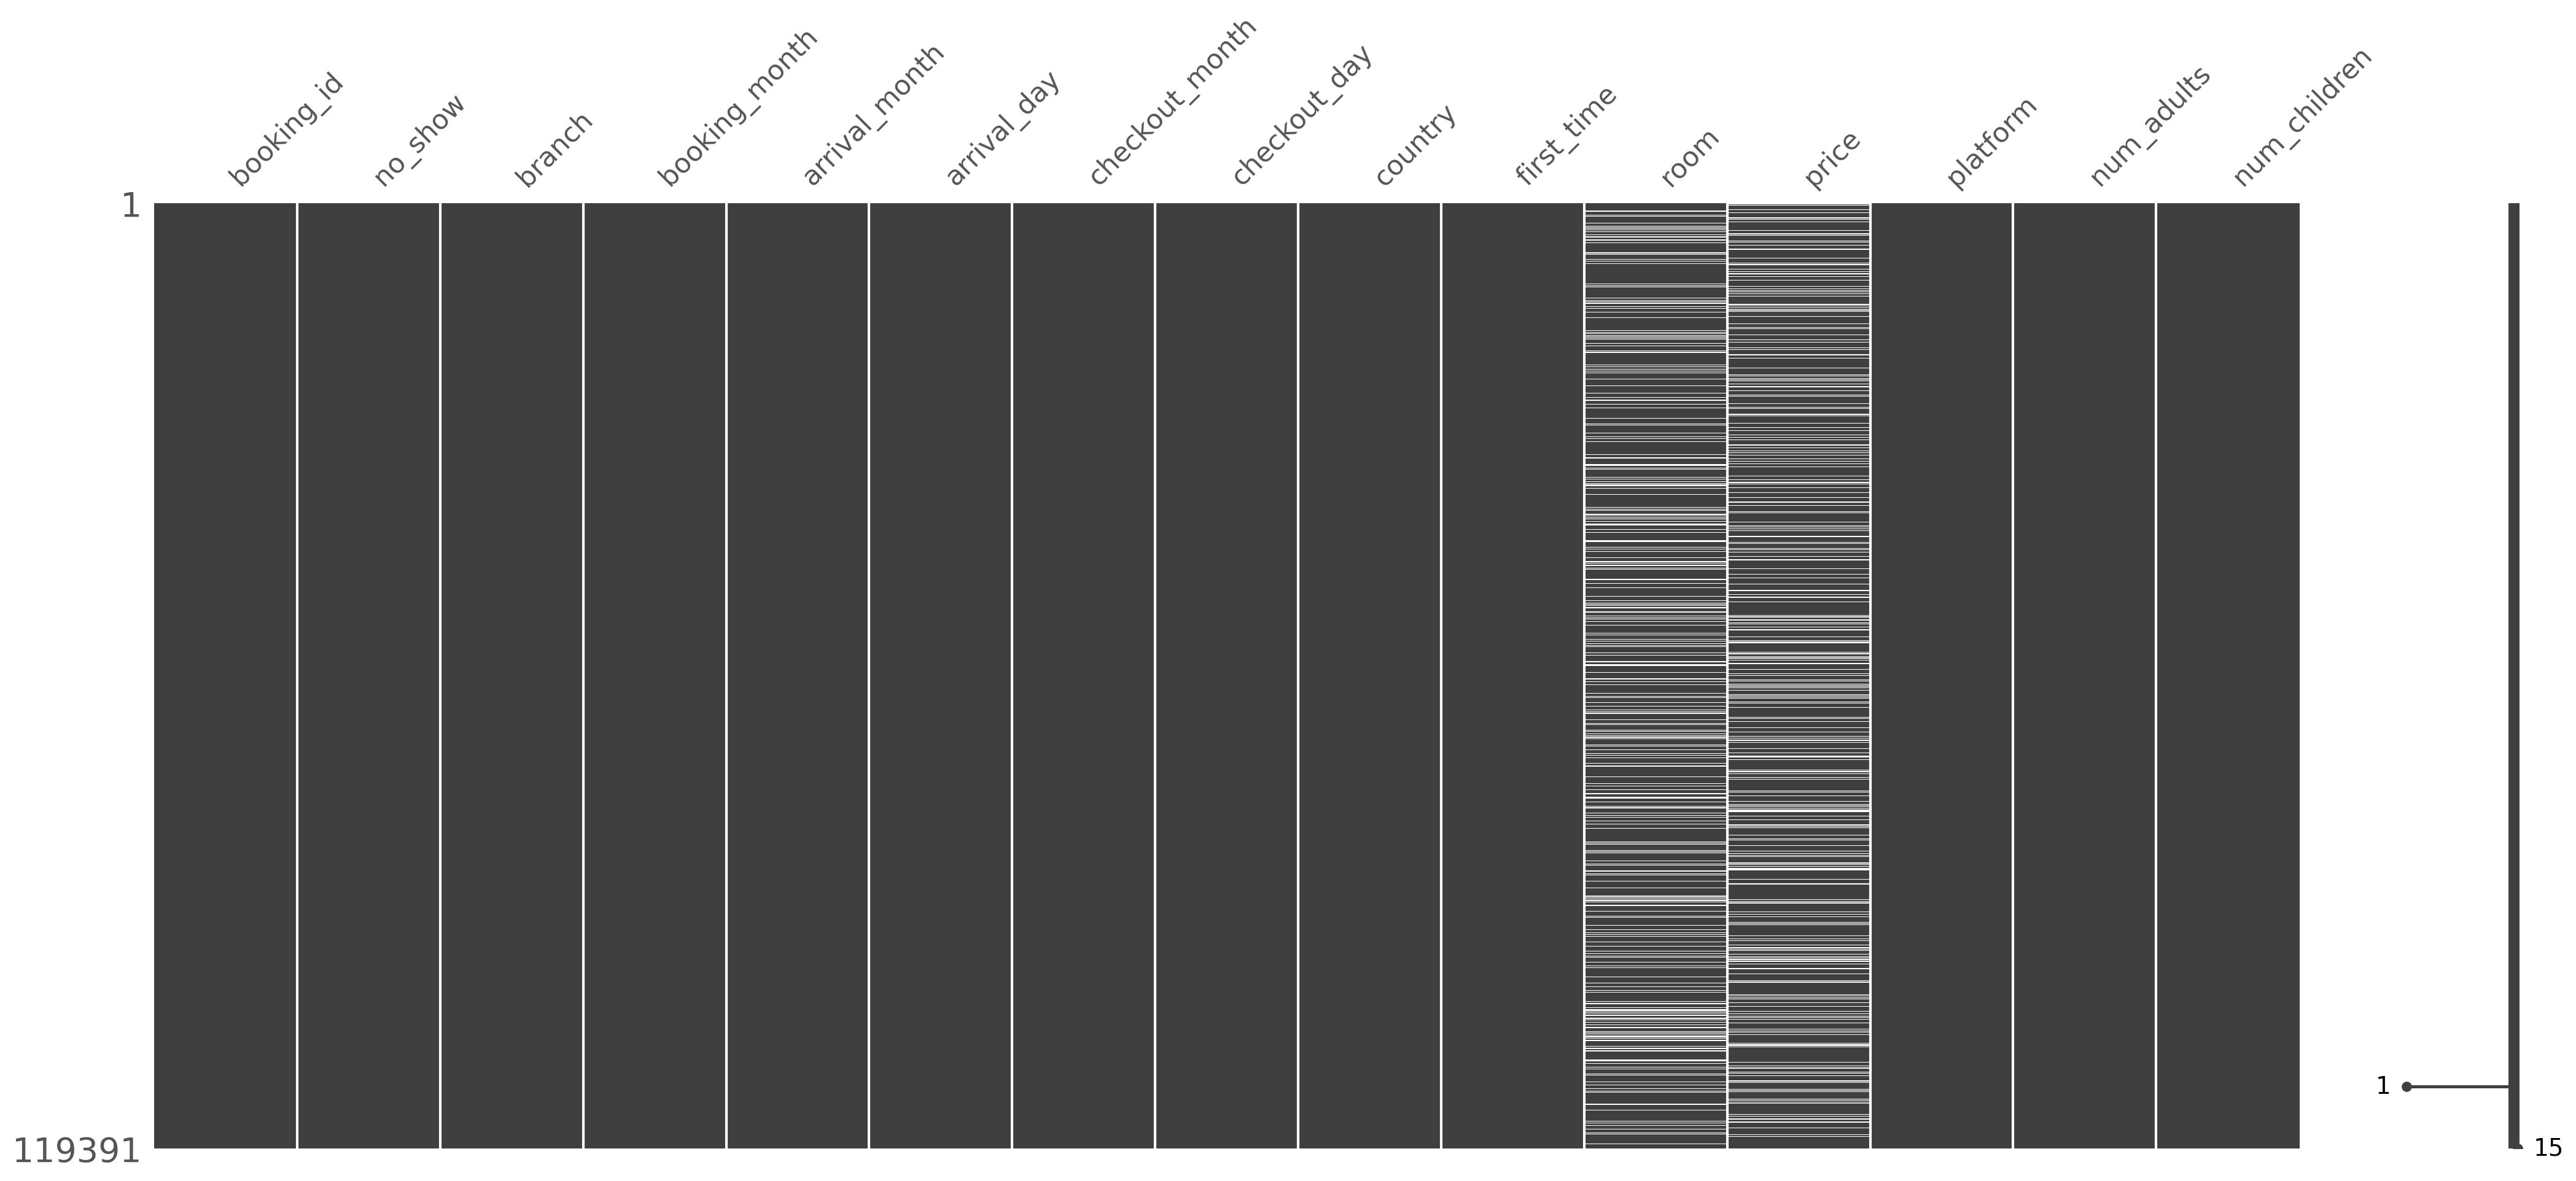

In [11]:
msno.matrix(df)  # Missing values are displayed as white lines in the matrix

**📊 Show count of missing values in DataFrame**

In [12]:
df.isnull().sum()

booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64

💡 **Missing Values**:

   - 12 features have 1 missing values each: `no_show`, `branch`, `booking_month`, `arrival_month`, `arrival_day`, `checkout_month`, `checkout_day`, `country`, `first_time`, `platform`, `num_adults`, `num_children` ➡️ Need to check if these are all from the same row or from different rows

   - `room` has 21,613 missing values

   - `price` has 24,882 missing values

---
### 🔎 **5.3. DataFrame Summary**

- Use `df.info()` to display a summary of the DataFrame, including column names, data types, and non-null counts.

- Provides an overview of the dataset's structure, helping to identify missing values and verify data types.

- Ensures all columns are correctly formatted and highlights potential issues that may require cleaning or preprocessing.

<br>

---

**📊 DataFrame Summary**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119391 non-null  int64  
 1   no_show         119390 non-null  float64
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  float64
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  float64
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  object 
 10  room            97778 non-null   object 
 11  price           94509 non-null   object 
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  object 
 14  num_children    119390 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 13.7+ MB


💡 **DataFrame Size**:

   - The DataFrame contains **119,391 rows** and **15 columns**, indicating a moderately sized dataset.

   - The DataFrame consumes **13.7+ MB** of memory, which is reasonable given its size.

💡 **Incorrect Data Types**:

   - The target variable `no_show` is currently as type float64, which is technically correct, but these column should be mapped to categorical values (i.e.1 = Yes and 0 = No) as type object for classification purposes.

   - `price` and `num_adults` are as type objects, but should be converted to float64 and int64 respectively instead

---
### 🔎 **5.4. DataFrame Statistics**

- Use `df.describe()` to generate summary statistics for numerical columns in the DataFrame.

- Provides insights into central tendencies (mean, median), variability (standard deviation), and ranges (min, max) of numerical features.

- Helps identify potential issues such as outliers, skewness, or unrealistic values in the data.

<br>

---

**📊 Summary Statistics**

In [14]:
# Display in normal notation instead of scientific
with pd.option_context('float_format', '{:f}'.format):
    # Include all columns in the summary statistics
    df.describe(include='all')

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
count,119391.000000,119390.000000,119390,119390,119390,119390.000000,119390,119390.000000,119390,119390,97778,94509,119390,119390,119390.000000
unique,NaN,NaN,2,12,88,NaN,12,NaN,7,2,4,61867,4,4,NaN
top,NaN,NaN,Changi,June,August,NaN,August,NaN,China,Yes,King,USD$ 585.23,Website,1,NaN
freq,NaN,NaN,79330,10324,13695,NaN,13836,NaN,48590,115580,70496,11,54234,62745,NaN
mean,59695.000000,0.370416,NaN,NaN,NaN,15.798241,NaN,14.250507,NaN,NaN,NaN,NaN,NaN,NaN,0.871229
std,34465.357332,0.482918,NaN,NaN,NaN,8.780829,NaN,11.063697,NaN,NaN,NaN,NaN,NaN,NaN,0.779796
min,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,-31.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,29847.500000,0.000000,NaN,NaN,NaN,8.000000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,59695.000000,0.000000,NaN,NaN,NaN,16.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,89542.500000,1.000000,NaN,NaN,NaN,23.000000,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


**💡 Check for Possible Duplicates for `booking_id`** 

   - If complete duplicates (all other values are identical), remove them.

   - If duplicates have different values, clarify with the data collector.

   - If clarification is not possible:
     - Remove entries with incomplete values.
     - Alternatively, retain the most recent entry (prioritizing "show" over "no-show").

**💡 Mean for `no_show` is 0.37**

   - Approximately 63% of customers show up (value = 0) and 37% do not show up (value = 1).

**💡 Invalid Values for `checkout_day`** 

   - The minimum value is -31, which is invalid as the day of the month cannot be negative. 
   
   - This could be an error during data collection.

   - Verify with the data collector if this is a mistake. If confirmed as an error, take the absolute value (abs(`checkout_day`)).

   - If clarification is not possible:
     - Count occurrences of negative values.
     - If the occurrences are minimal relative to the dataset size, consider removing these entries.

**💡 Invalid Data Types for `Price` and `num_adults`**

   - These columns need to be cleaned and converted to numerical formats for further analysis.
   
   - Investigate and resolve formatting inconsistencies before proceeding with statistical analysis or modeling.

---
### 🔎 **5.5. Analyze Missing Values**

Understanding missing values is critical to assess data quality and determine appropriate strategies for handling them, such as:

- **Removal**: Dropping rows or columns with excessive missing values.

- **Imputation**: Filling missing values using statistical methods (e.g., mean, median), predictive models or domain specific knowledge.

- **Flagging**: Create a binary indicator column to flag whether a value was originally missing. This approach retains information about the presence of missingness, which might be meaningful.

- **Synthetic Data Generation**: Generate synthetic data to fill in missing values. This is more advanced and typically used when the dataset is small or highly sensitive to missingness.

- **No Action**: If the proportion of missing values is negligible (e.g., <1%), it may be acceptable to leave them as-is, especially if the machine learning model can handle missing values (e.g., XGBoost, LightGBM)

Identifying patterns in missingness can also reveal underlying issues in data collection or preprocessing.

<br>

---

**📊 Use msno.matrix(df) to visualize the distribution of missing values across the DataFrame.**

<Axes: >

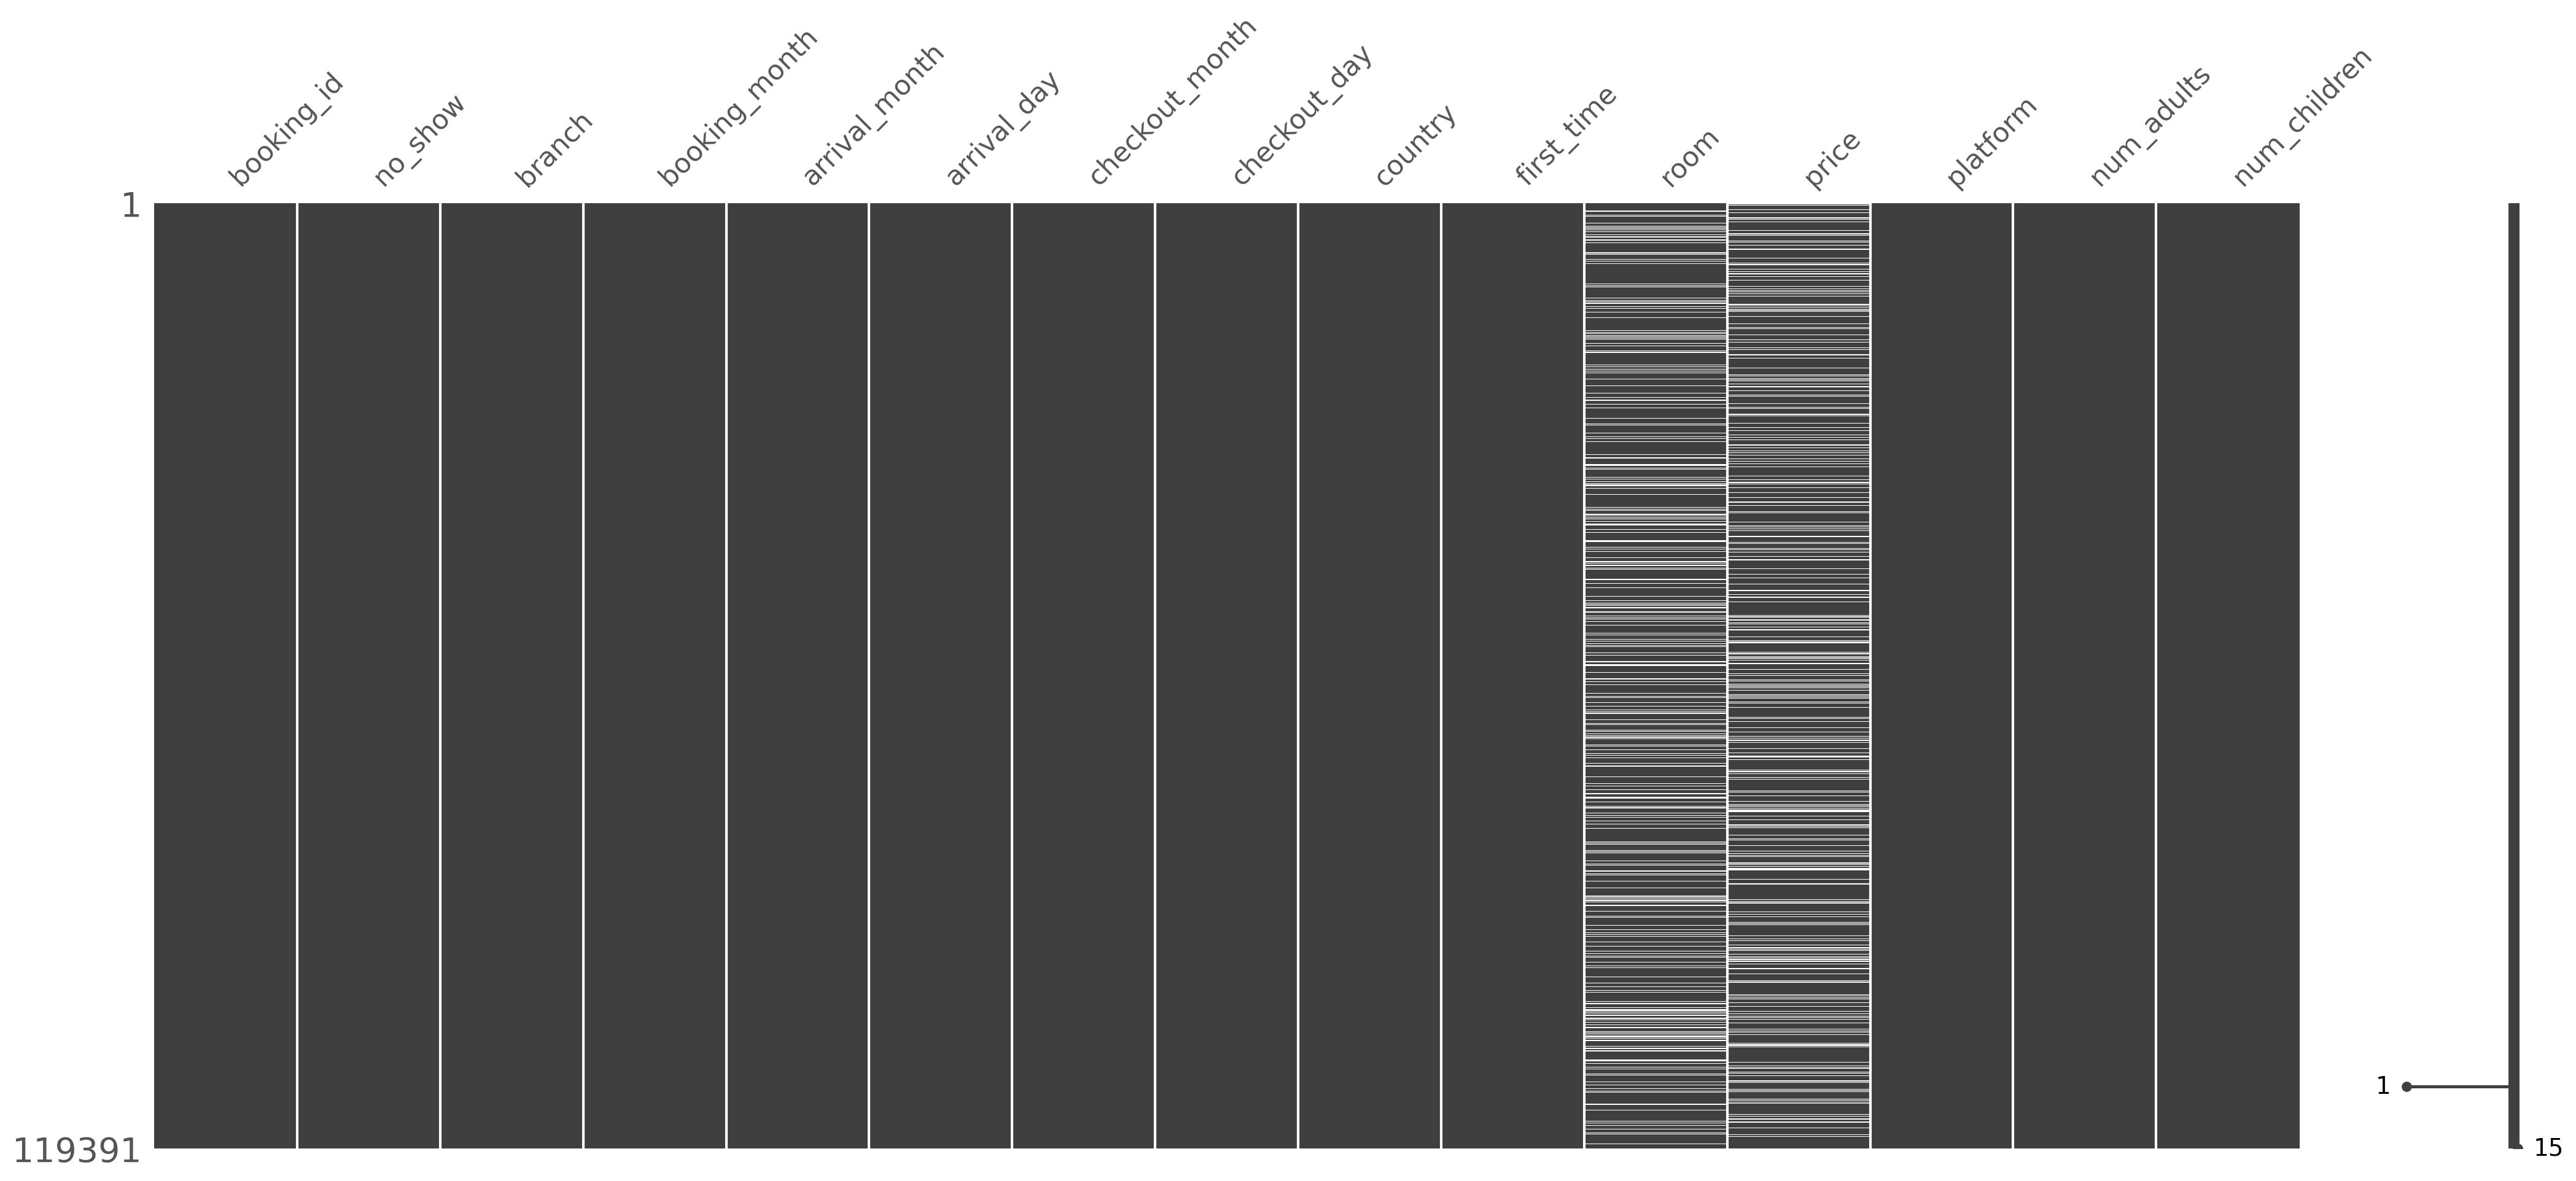

In [15]:
# Show distribution of missing values in DataFrame
msno.matrix(df)  # Missing values are displayed as white lines in the matrix

**📊 Calculate the total number of missing values per column**

- Using `df_cleaned.isnull().sum()`

- This helps quantify the extent of missing data for each feature

In [16]:
df.isnull().sum()

booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64

**💡 Check for Possible Duplicates for `booking_id`** 

   - If complete duplicates (all other values are identical), remove them.

   - If duplicates have different values, clarify with the data collector.

   - If clarification is not possible:
     - Remove entries with incomplete values.
     - Alternatively, retain the most recent entry (prioritizing "show" over "no-show").

---
---
# 🧼 **6. Data Cleaning**

Data cleaning is a critical step that ensures the dataset is accurate, consistent, and ready for meaningful EDA. Raw datasets often contain issues such as missing values, irrelevant features, incorrect data types, or inconsistencies that can hinder analysis and lead to misleading insights. By addressing these issues systematically, we prepare the dataset for thorough exploration and ensure that subsequent findings are reliable and actionable.

Minimal cleaning (e.g., handling missing values, correcting data types, addressing inconsistencies) will be performed during EDA to facilitate exploration. Advanced preprocessing, such as feature engineering and scaling, will be deferred to the machine learning pipeline.

In this section, we focus on identifying and resolving potential issues in the dataset to create a clean foundation for EDA. This process is iterative and evolves based on insights gained during the cleaning phase.

*(Additional data cleaning steps may be performed in subsequent sections as needed, denoted by the 🧼 emoji.)*

---

**⬜ Create a copy of the DataFrame for cleaning and analysis**

In [17]:
df_cleaned = df.copy()  
print("Previous Shape: ", df.shape)  
print("New Shape: ",df_cleaned.shape)  
df_cleaned.head(3)

Previous Shape:  (119391, 15)
New Shape:  (119391, 15)


,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0
1,86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.0
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0


---
### 🧼 **6.1. Check for Duplicates**

- Identify duplicate entries in the DataFrame.

- Verify the uniqueness of the `booking_id` column to ensure each booking has a unique identifier, as expected.

<br>

---

**📊 Check for duplicate rows in the DataFrame**

In [18]:
duplicate_rows = df_cleaned[df_cleaned.duplicated(keep=False)]
duplicate_rows

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children


**Count unique booking IDs in the original DataFrame**

In [19]:
unique_booking_ids = df_cleaned['booking_id'].nunique() 
unique_booking_ids

119391

**💡 No Duplicate Data Identified**

- Verified using `df.duplicated().sum()`: No fully duplicated rows were found in the dataset.

- Additionally, the `booking_id` column contains 119,391 unique values, which matches the total number of rows in the dataset. This confirms that each booking has a unique identifier and there are no duplicate entries based on booking ID.

---
### 🧼 **6.2. Remove Irrelevant Features**

To streamline the dataset and focus on meaningful attributes, certain features are removed based on logical reasoning and their relevance to predicting customer no-show behavior. This process simplifies the dataset, reduces noise, and ensures that subsequent analysis and modeling focus only on predictors that contribute to understanding no-show behavior.

**Criteria for Removal**

Features are evaluated against the following criteria:

- **Irrelevance**: Features that do not contribute to understanding or predicting no-show behavior (e.g., unique identifiers or unrelated metadata). Note that the criteria here is very strong, so we must be absolutely sure that such features will not have any impact (even if they may have impact), but we must be absolutely that such impact will not make sense. If we are not sure, best to leave it in first, study it first and then remove it thereafter. (TO REWORD ⚠️⚠️⚠️) 

- **Redundancy**: Features that provide duplicate information or are highly correlated with other variables in the dataset.

- **Lack of Predictive Power**: Features that, upon logical analysis, show little to no impact on the target variable.

**Features Removed**

1. `booking_id`:

   - Acts as a unique identifier for each booking record.
   - Does not provide any predictive value or meaningful insight into no-show behavior.

*(Additional features may be identified and removed during further analysis if they meet the above criteria.)*

<br>

---

**⬜ Drop irrelevant columns**

In [20]:
# Specify the cols to drop
to_drop = ['booking_id']

# Display the dataset's shape and a sample row before removal
print("🔍 Before Removal: ", df_cleaned.shape) 
df_cleaned.head(1)

# Drop the 'booking_id' column as it is irrelevant for analysis
df_cleaned = df_cleaned.drop(columns=to_drop)

# Verify that the column has been removed
print("✅ After Removal: ", df_cleaned.shape)
df_cleaned.head(1)

# Assert that none of the dropped columns are still in the DataFrame
# If still present, the assertion will fail and result in an error.
assert not any(col in to_drop for col in df_cleaned.columns)

🔍 Before Removal:  (119391, 15)


,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0


✅ After Removal:  (119391, 14)


,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0


---
### 🧼 **6.3. Validate Column Values**

- To ensure the integrity and reliability of the dataset, a thorough inspection of each column will be conducted to verify the correctness of values and their alignment with the expected data types. This includes checking for null values, inappropriate values, and inconsistencies in the data.

- By addressing inappropriate values, null values, and data type mismatches early, we minimize the risk of introducing bias or errors that could impact downstream analysis and modeling. This ensures that the dataset remains robust and ready for feature engineering and predictive modeling.


Removing missing values policy

Room and Price are essential attributes

- If the percentage of missing values is very high (e.g., >50%), it may be better to drop the column entirely.
- If the percentage is moderate (e.g., 10–50%), consider imputation or advanced techniques like predictive modeling.
- If the percentage is low (e.g., <10%), imputation is usually sufficient.


Changing data types policy

<br>

---

**🧙‍♂️🧙‍♂️🧙‍♂️ Initialize a function to analyse specific columns in a DataFrame**

- Check data type
- Count the number of unique values
- Display distribution (absolute counts and proportions)
- Identify and display rows with missing values

In [21]:
def analyse_column(df, column_name, show_distribution=True):
    """
    Analyse a specific column in the DataFrame:
    - Check data type.
    - Count the number of unique values.
    - Display distribution (absolute counts and proportions).
    - Identify and display rows with missing values.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to analyze.
        show_distribution (bool): Whether to display the distribution of values. Default is True.

    Returns:
        None
    """
    # Check the data type of the column
    print("🔢 Data Type:", df[column_name].dtype)

    # Count Unique Values
    unique_values_count = df[column_name].nunique()
    print(f"💎 Number of Unique Values: {unique_values_count}")

    # Show an example of the column's values
    print("📋 Example Values:")
    display(df[[column_name]].head())  # Display the first 5 rows of the column

    # Check the distribution of the column
    distribution = df[column_name].value_counts().rename_axis('Value').reset_index(name='Count')
    distribution['Proportion'] = distribution['Count'] / distribution['Count'].sum()
    if show_distribution:
        print("📊 Distribution:")
        display(distribution.style.format({
            'Count': '{:,}',  # Add thousand separators
            'Proportion': '{:.2%}'  # Format as percentage with 2 decimal places
        }))

    # Check for missing values
    missing_count = df[column_name].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100  # Calculate percentage of missing rows
    if missing_count == 0:
        print("✅ No missing values found.")
    else:
        print(f"⚠️ Rows with missing values (Total: {missing_count}, {missing_percentage:.2f}% of total rows):")
        missing_rows = df[df[column_name].isnull()]
        display(missing_rows)

    return None 

In [22]:
def remove_missing_rows(df, column_name):
    """
    Remove rows with missing values in the specified column and log details about the operation.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The column to check for missing values.

    Returns:
        None
    """
    # Log the initial shape
    print(f"📊 Shape Before Removal: {df.shape}")

    # Remove rows with missing values in the specified column
    df_new = df.dropna(subset=[column_name])

    # Log the final shape
    print(f"📊 Shape After Removal: {df_new.shape}")

    # Calculate the number of rows removed
    rows_removed = df.shape[0] - df_new.shape[0]
    print(f"🗑️ Rows Removed: {rows_removed}")

    # Confirm no missing values remain
    missing_after = df_new[column_name].isnull().sum()
    if missing_after == 0:
        print(f"🎉 No Missing Values Remain in Column '{column_name}'.")
    else:
        print(f"⚠️ Warning: Missing Values Still Exist in Column '{column_name}'.")

    return df_new

---

#### **🧼 6.3.1. Validate `no_show`**

- The target variable
- If the customer is a No-Show: 0 = Show, 1 = No-Show

<br>

---

**⬜ Analyse Data for `no_show`**

In [23]:
analyse_column(df=df_cleaned, column_name='no_show')

🔢 Data Type: float64
💎 Number of Unique Values: 2
📋 Example Values:


,no_show
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


📊 Distribution:


,Value,Count,Proportion
0,0.000000,"75,166",62.96%
1,1.000000,"44,224",37.04%


⚠️ Rows with missing values (Total: 1, 0.00% of total rows):


,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
111598,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,NaN


**💡 Analysis  for `no_show`**

- Only one row has missing values, and most other columns in this row are also incomplete.

- Ideally, confirm with the data collector if this is an error or if the missing data can be retrieved. However, if obtaining the data requires significant effort, it is reasonable to exclude this row, as it represents just one sample.

- For now, we will remove the row.

- Incorrect data type: should be Object, reflecting the binary nature of this as True / False

**⬜🧼 Remove missing rows for `no_show`**

In [24]:
df_cleaned = remove_missing_rows(df_cleaned, column_name='no_show')

📊 Shape Before Removal: (119391, 14)
📊 Shape After Removal: (119390, 14)
🗑️ Rows Removed: 1
🎉 No Missing Values Remain in Column 'no_show'.


**⬜🧼 Change data type  for `no_show`**

- The `category` dtype is specifically designed for columns with a fixed, limited set of unique values (categories).
- Internally, it encodes the categories as integers, which improves performance and reduces memory usage.

In [25]:
df_cleaned['no_show'] = df_cleaned['no_show'].astype('int64')  # Convert to int64 to remove decimals
df_cleaned['no_show'] = df_cleaned['no_show'].astype('category')  # Convert to categorical type for better memory efficiency and performance  

**⬜ Verify Data after changes  for `no_show`**

In [26]:
analyse_column(df=df_cleaned, column_name='no_show')

🔢 Data Type: category
💎 Number of Unique Values: 2
📋 Example Values:


,no_show
0,0
1,0
2,0
3,1
4,0


📊 Distribution:


,Value,Count,Proportion
0,0,"75,166",62.96%
1,1,"44,224",37.04%


✅ No missing values found.


**💡 Conclusion  for `no_show`**

- Data type: Int64 - appropriate
- Distribution: More Shows (0)

---

#### **🧼 6.3.2. Validate `branch`**

- Hotel branch

<br>

---

**⬜ Analyse Data**

In [27]:
analyse_column(df=df_cleaned, column_name='branch')

🔢 Data Type: object
💎 Number of Unique Values: 2
📋 Example Values:


,branch
0,Changi
1,Orchard
2,Changi
3,Orchard
4,Orchard


📊 Distribution:


,Value,Count,Proportion
0,Changi,"79,330",66.45%
1,Orchard,"40,060",33.55%


✅ No missing values found.


In [28]:
df_cleaned['branch'] = df_cleaned['branch'].astype('category')  # Convert to categorical type for better memory efficiency and performance.

**💡 Conclusion  for `branch`**

- Data type: object - appropriate
- Distribution: 

---

#### **🧼 6.3.3. Validate `booking_month`**

- Month the booking was made by the customer

<br>

---

**📊 Analyse Data**

In [29]:
analyse_column(df=df_cleaned, column_name='booking_month')

🔢 Data Type: object
💎 Number of Unique Values: 12
📋 Example Values:


,booking_month
0,November
1,August
2,March
3,September
4,March


📊 Distribution:


,Value,Count,Proportion
0,June,"10,324",8.65%
1,September,"10,315",8.64%
2,November,"10,280",8.61%
3,January,"10,214",8.56%
4,August,"10,134",8.49%
5,October,"10,068",8.43%
6,July,"9,993",8.37%
7,March,"9,754",8.17%
8,February,"9,588",8.03%
9,May,"9,588",8.03%


✅ No missing values found.


In [30]:
df_cleaned['booking_month'] = df_cleaned['booking_month'].astype('category')  # Convert to categorical type for better memory efficiency and performance.

In [31]:
analyse_column(df=df_cleaned, column_name='booking_month')

🔢 Data Type: category
💎 Number of Unique Values: 12
📋 Example Values:


,booking_month
0,November
1,August
2,March
3,September
4,March


📊 Distribution:


,Value,Count,Proportion
0,June,"10,324",8.65%
1,September,"10,315",8.64%
2,November,"10,280",8.61%
3,January,"10,214",8.56%
4,August,"10,134",8.49%
5,October,"10,068",8.43%
6,July,"9,993",8.37%
7,March,"9,754",8.17%
8,February,"9,588",8.03%
9,May,"9,588",8.03%


✅ No missing values found.


---

#### **🧼 6.3.4. Validate `arrival_month`**

- Month the customer plan to arrive at the hotel

<br>

---

**🔎🔎🔎 Perform initial analysis 🔎🔎🔎**

In [32]:
analyse_column(df=df_cleaned, column_name='arrival_month')

🔢 Data Type: object
💎 Number of Unique Values: 88
📋 Example Values:


,arrival_month
0,June
1,November
2,February
3,October
4,June


📊 Distribution:


,Value,Count,Proportion
0,August,"13,695",11.47%
1,July,"12,515",10.48%
2,May,"11,684",9.79%
3,October,"11,009",9.22%
4,April,"10,966",9.19%
5,June,"10,787",9.04%
6,September,"10,336",8.66%
7,March,"9,659",8.09%
8,February,"7,939",6.65%
9,November,"6,679",5.59%


✅ No missing values found.


**💡💡💡 Analysis 💡💡💡**

- Seems like the data have different capitalisation issues
- To feedback to data collection team to check if can rectify this error for future cases
- For now, to create a function to deal with these issues

**🧙‍♂️🧙‍♂️🧙‍♂️ Create function to standardize month names**

In [33]:
def standardize_month_names(df, column_name):
    """
    Standardize month names in the specified column by converting all variations to their proper form.
    Handles case insensitivity and matches all permutations.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column containing month names.

    Returns:
        pd.DataFrame: A DataFrame with standardized month names.
    """
    # Define a mapping from lowercase month names to their proper forms
    month_mapping = {
        'january': 'January',
        'february': 'February',
        'march': 'March',
        'april': 'April',
        'may': 'May',
        'june': 'June',
        'july': 'July',
        'august': 'August',
        'september': 'September',
        'october': 'October',
        'november': 'November',
        'december': 'December'
    }

    # Convert the column values to lowercase for case-insensitive comparison
    df[column_name] = df[column_name].str.lower()

    # Map the lowercase values to their proper forms using the dictionary
    df[column_name] = df[column_name].map(month_mapping).fillna(df[column_name])

    return df

In [34]:
# Standardize month names
df_cleaned = standardize_month_names(df_cleaned, 'arrival_month')

In [35]:
df_cleaned['arrival_month'] = df_cleaned['arrival_month'].astype('category')  # Convert to categorical type for better memory efficiency and performance.

In [36]:
analyse_column(df=df_cleaned, column_name='arrival_month')

🔢 Data Type: category
💎 Number of Unique Values: 12
📋 Example Values:


,arrival_month
0,June
1,November
2,February
3,October
4,June


📊 Distribution:


,Value,Count,Proportion
0,August,"13,877",11.62%
1,July,"12,661",10.60%
2,May,"11,791",9.88%
3,October,"11,160",9.35%
4,April,"11,089",9.29%
5,June,"10,939",9.16%
6,September,"10,508",8.80%
7,March,"9,794",8.20%
8,February,"8,068",6.76%
9,November,"6,794",5.69%


✅ No missing values found.


---

#### **🧼 6.3.5. Validate `arrival_day`**

- Day date the customer plan to arrive at the hotel

<br>

---

**🔎🔎🔎 Perform initial analysis 🔎🔎🔎**

In [37]:
analyse_column(df=df_cleaned, column_name='arrival_day')

🔢 Data Type: float64
💎 Number of Unique Values: 31
📋 Example Values:


,arrival_day
0,25.0
1,28.0
2,7.0
3,1.0
4,20.0


📊 Distribution:


,Value,Count,Proportion
0,17.000000,"4,406",3.69%
1,5.000000,"4,317",3.62%
2,15.000000,"4,196",3.51%
3,25.000000,"4,160",3.48%
4,26.000000,"4,147",3.47%
5,9.000000,"4,096",3.43%
6,12.000000,"4,087",3.42%
7,16.000000,"4,078",3.42%
8,2.000000,"4,055",3.40%
9,19.000000,"4,052",3.39%


✅ No missing values found.


In [38]:
df_cleaned['arrival_day'] = df_cleaned['arrival_day'].astype('int64')  # Convert to categorical type for better memory efficiency and performance.

In [39]:
analyse_column(df=df_cleaned, column_name='arrival_day')

🔢 Data Type: int64
💎 Number of Unique Values: 31
📋 Example Values:


,arrival_day
0,25
1,28
2,7
3,1
4,20


📊 Distribution:


,Value,Count,Proportion
0,17,"4,406",3.69%
1,5,"4,317",3.62%
2,15,"4,196",3.51%
3,25,"4,160",3.48%
4,26,"4,147",3.47%
5,9,"4,096",3.43%
6,12,"4,087",3.42%
7,16,"4,078",3.42%
8,2,"4,055",3.40%
9,19,"4,052",3.39%


✅ No missing values found.


---

#### **🧼 6.3.6. Validate `checkout_month`**

- Month the customer plan to checkout of the hotel

<br>

---

In [40]:
analyse_column(df=df_cleaned, column_name='checkout_month')

🔢 Data Type: object
💎 Number of Unique Values: 12
📋 Example Values:


,checkout_month
0,June
1,November
2,February
3,October
4,June


📊 Distribution:


,Value,Count,Proportion
0,August,"13,836",11.59%
1,July,"12,760",10.69%
2,May,"12,044",10.09%
3,October,"11,434",9.58%
4,April,"11,016",9.23%
5,June,"10,692",8.96%
6,September,"10,416",8.72%
7,March,"9,509",7.96%
8,February,"7,716",6.46%
9,November,"7,214",6.04%


✅ No missing values found.


In [41]:
df_cleaned['checkout_month'] = df_cleaned['checkout_month'].astype('category')  # Convert to categorical type for better memory efficiency and performance.

In [42]:
analyse_column(df=df_cleaned, column_name='checkout_month')

🔢 Data Type: category
💎 Number of Unique Values: 12
📋 Example Values:


,checkout_month
0,June
1,November
2,February
3,October
4,June


📊 Distribution:


,Value,Count,Proportion
0,August,"13,836",11.59%
1,July,"12,760",10.69%
2,May,"12,044",10.09%
3,October,"11,434",9.58%
4,April,"11,016",9.23%
5,June,"10,692",8.96%
6,September,"10,416",8.72%
7,March,"9,509",7.96%
8,February,"7,716",6.46%
9,November,"7,214",6.04%


✅ No missing values found.


---

#### **🧼 6.3.7. Validate `checkout_day`**

- Day date the customer plan to checkout of the hotel

<br>

---

In [43]:
analyse_column(df=df_cleaned, column_name='checkout_day')

🔢 Data Type: float64
💎 Number of Unique Values: 62
📋 Example Values:


,checkout_day
0,27.0
1,29.0
2,11.0
3,3.0
4,24.0


📊 Distribution:


,Value,Count,Proportion
0,11.000000,"4,458",3.73%
1,18.000000,"4,248",3.56%
2,20.000000,"4,207",3.52%
3,27.000000,"4,006",3.36%
4,4.000000,"3,972",3.33%
5,6.000000,"3,957",3.31%
6,17.000000,"3,943",3.30%
7,28.000000,"3,932",3.29%
8,1.000000,"3,892",3.26%
9,19.000000,"3,818",3.20%


✅ No missing values found.


**💡💡💡 Analysis 💡💡💡**

- Seems like the data have an issue with negative number days
- COnfirm with data collection team if it is just a negative sign issue, if so can just modulus it, if not, as all negative are less than 1% each, can choose to remove them
- To feedback to data collection team to check if can rectify this error for future cases
- For now, to create a function to get the absolute value for the negative numbers

In [44]:
def convert_negative_to_positive(df, column_name):
    """
    Convert negative values in the specified column to their absolute values.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to process.
    
    Returns:
        pd.DataFrame: A DataFrame with negative values converted to positive.
    """
    # Convert negative values to positive using abs()
    df[column_name] = df[column_name].apply(abs)
    
    return df

In [45]:
df_cleaned = convert_negative_to_positive(df_cleaned, 'checkout_day')

In [46]:
df_cleaned['checkout_day'] = df_cleaned['checkout_day'].astype('int64') 

In [47]:
analyse_column(df=df_cleaned, column_name='checkout_day')

🔢 Data Type: int64
💎 Number of Unique Values: 31
📋 Example Values:


,checkout_day
0,27
1,29
2,11
3,3
4,24


📊 Distribution:


,Value,Count,Proportion
0,11,"4,656",3.90%
1,18,"4,468",3.74%
2,20,"4,434",3.71%
3,27,"4,221",3.54%
4,4,"4,175",3.50%
5,6,"4,147",3.47%
6,17,"4,139",3.47%
7,28,"4,116",3.45%
8,1,"4,071",3.41%
9,25,"3,992",3.34%


✅ No missing values found.


---

#### **🧼 6.3.8. Validate `country`**

- Nationality of the customer

<br>

---

In [48]:
analyse_column(df=df_cleaned, column_name='country')

🔢 Data Type: object
💎 Number of Unique Values: 7
📋 Example Values:


,country
0,Singapore
1,Indonesia
2,India
3,China
4,Australia


📊 Distribution:


,Value,Count,Proportion
0,China,"48,590",40.70%
1,Indonesia,"25,812",21.62%
2,India,"15,790",13.23%
3,Australia,"12,129",10.16%
4,Japan,"9,391",7.87%
5,Singapore,"3,912",3.28%
6,Malaysia,"3,766",3.15%


✅ No missing values found.


In [49]:
df_cleaned['country'] = df_cleaned['country'].astype('category')  # Convert to categorical type for better memory efficiency and performance.

In [50]:
analyse_column(df=df_cleaned, column_name='country')

🔢 Data Type: category
💎 Number of Unique Values: 7
📋 Example Values:


,country
0,Singapore
1,Indonesia
2,India
3,China
4,Australia


📊 Distribution:


,Value,Count,Proportion
0,China,"48,590",40.70%
1,Indonesia,"25,812",21.62%
2,India,"15,790",13.23%
3,Australia,"12,129",10.16%
4,Japan,"9,391",7.87%
5,Singapore,"3,912",3.28%
6,Malaysia,"3,766",3.15%


✅ No missing values found.


---

#### **🧼 6.3.9. Validate `first_time`**

- If it is the first time customer staying in the hotel

<br>

---

In [51]:
analyse_column(df=df_cleaned, column_name='first_time')

🔢 Data Type: object
💎 Number of Unique Values: 2
📋 Example Values:


,first_time
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


📊 Distribution:


,Value,Count,Proportion
0,Yes,"115,580",96.81%
1,No,"3,810",3.19%


✅ No missing values found.


In [52]:
# Map "Yes" to 1 and "No" to 0
df_cleaned['first_time'] = df_cleaned['first_time'].map({'Yes': 1, 'No': 0})

In [53]:
df_cleaned['first_time'] = df_cleaned['first_time'].astype('int64')  # Convert to int64 to remove decimals
df_cleaned['first_time'] = df_cleaned['first_time'].astype('category')  # Convert to categorical type for better memory efficiency and performance  

In [54]:
analyse_column(df=df_cleaned, column_name='first_time')

🔢 Data Type: category
💎 Number of Unique Values: 2
📋 Example Values:


,first_time
0,1
1,1
2,1
3,1
4,1


📊 Distribution:


,Value,Count,Proportion
0,1,"115,580",96.81%
1,0,"3,810",3.19%


✅ No missing values found.


---

#### **🧼 6.3.10. Validate `room`**

- Room type booked by the customer

<br>

---

In [55]:
analyse_column(df=df_cleaned, column_name='room')

🔢 Data Type: object
💎 Number of Unique Values: 4
📋 Example Values:


,room
0,Single
1,King
2,Single
3,Single
4,Queen


📊 Distribution:


,Value,Count,Proportion
0,King,"70,496",72.10%
1,Single,"15,697",16.05%
2,Queen,"10,824",11.07%
3,President Suite,761,0.78%


⚠️ Rows with missing values (Total: 21612, 18.10% of total rows):


,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
5,0,Orchard,November,September,12,September,13,Indonesia,1,None,SGD$ 1499.61,Website,2,2.0
8,1,Changi,January,June,27,June,28,China,1,None,USD$ 658.75,Email,2,1.0
9,0,Orchard,October,March,22,March,24,China,1,None,USD$ 962.75,Website,1,1.0
17,0,Orchard,March,May,10,May,12,Indonesia,1,None,SGD$ 1309.13,Website,one,0.0
19,0,Orchard,March,March,30,March,31,China,1,None,USD$ 1056.7,Website,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119357,0,Orchard,August,October,12,October,13,Indonesia,1,None,USD$ 534.97,Email,1,1.0
119358,0,Orchard,December,February,10,February,12,China,1,None,SGD$ 1200.95,Website,2,0.0
119370,1,Changi,April,October,4,October,6,China,1,None,SGD$ 844.46,Agent,one,0.0
119378,0,Orchard,September,September,15,September,16,Australia,1,None,SGD$ 1331.2,Agent,2,0.0


**💡💡💡 Analysis 💡💡💡**

- To clarify with the data collector what is wrong with the data, is it an issue of not adding in something? or some other issue
- It's quite a lot so is not a one time thing (18% of dataset) --> to determine if leaving it in is a solution? Could it be a certain room type that displays this error?
- Investigate whether the missing values are systematic or random.
- Check if there’s a pattern (e.g., specific branches or booking platforms with higher missingness).

📊📊📊 Understand relationship with other missing values

The heatmap highlights correlations between missing values in different columns (e.g., if missing values in room correlate with missing values in other columns).

- The heatmap helps identify patterns in missing values across different columns.
- It provides a visual summary of which columns have missing values and their distribution.

- If certain columns show high correlation in missingness, it suggests that missing values in one column are likely related to missing values in another.
- This can help identify systematic issues in data collection or preprocessing.

<Axes: >

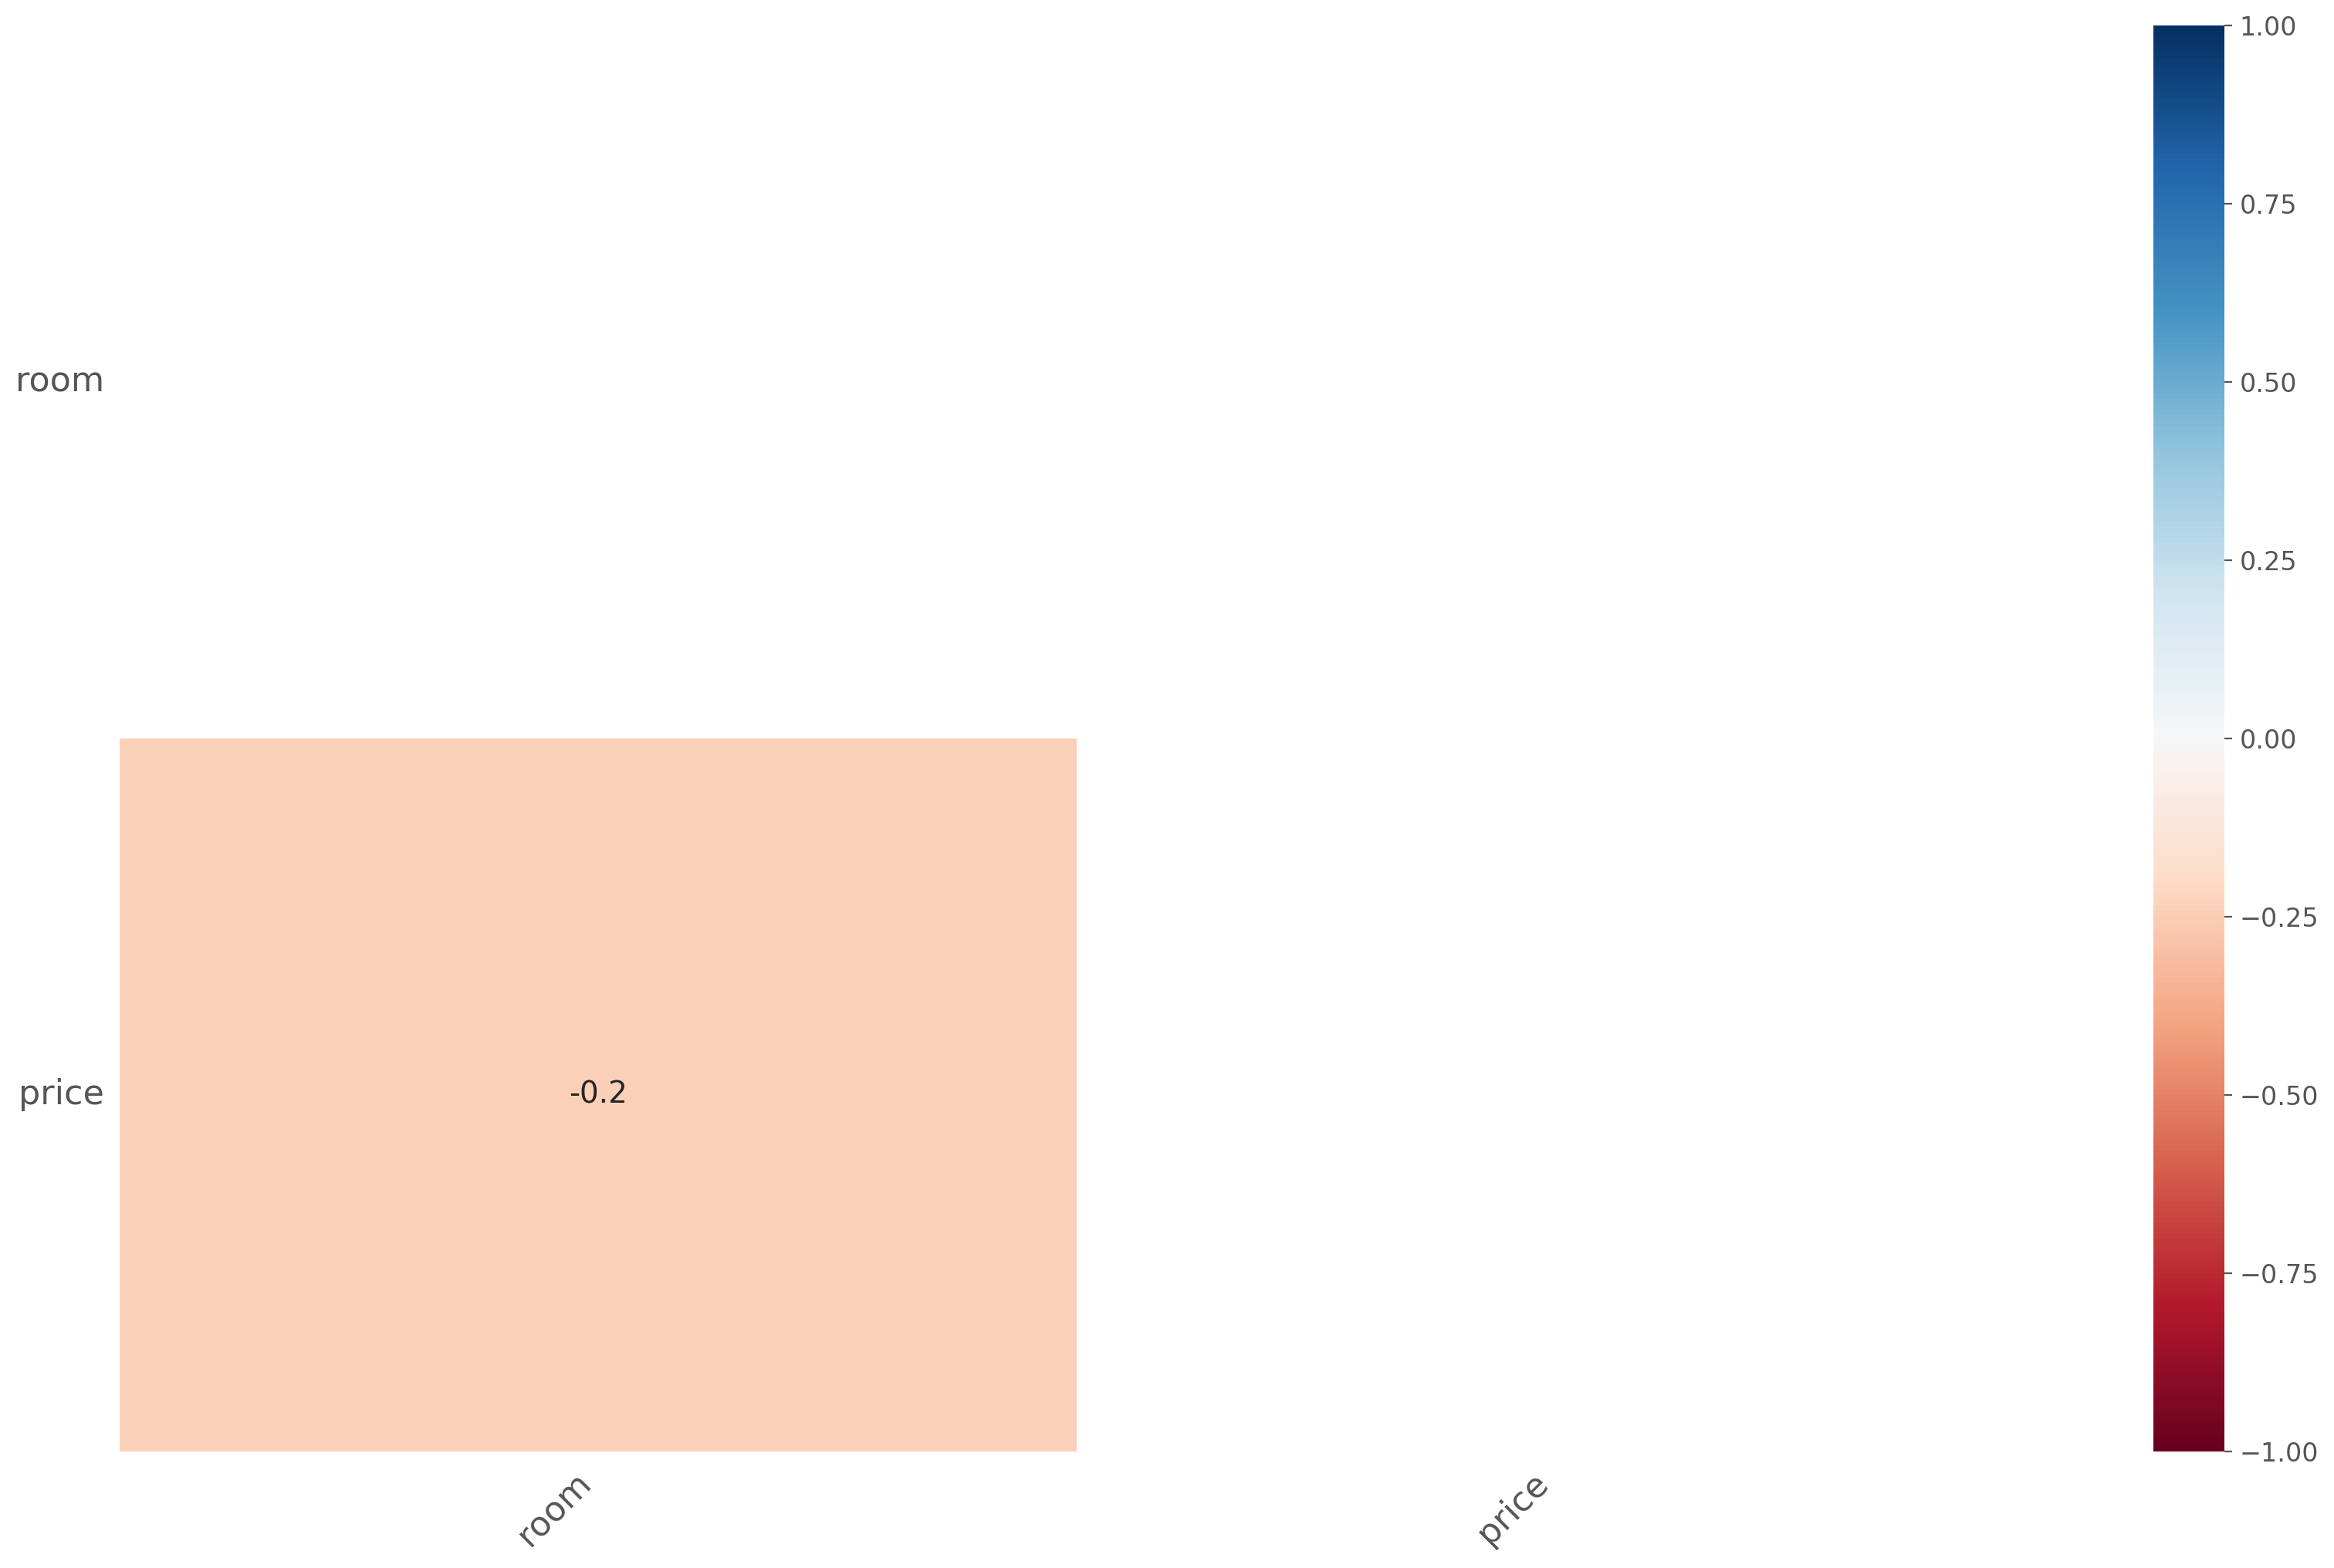

In [56]:
# Visualize correlation between missing values
msno.heatmap(df_cleaned)
plt.show()

💡 The correlation coefficient of -0.2 confirms that there is a weak negative correlation between `room` and `price`. While this correlation is statistically detectable, its practical significance is low, meaning these variables are largely independent.

📊📊📊 Understand relationship with other columns

In [57]:
def analyze_missing_by_group(df, group_column, target_column):
    """
    Analyze the proportion of missing values in the target column grouped by another column.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        group_column (str): The column to group by.
        target_column (str): The column to analyze for missing values.

    Returns:
        pd.DataFrame: A DataFrame summarizing missing proportions for each group.
    """
    # Calculate the proportion of missing values in the target column for each group
    missing_by_group = (
        df.groupby(group_column)[target_column]
        .apply(lambda x: x.isnull().mean())
        .reset_index(name='Missing_Proportion')
    )

    # Display the results
    print(f"📊 Missing Proportion by {group_column}:")
    display(missing_by_group.style.format({'Missing_Proportion': '{:.2%}'}))

In [58]:
# Example Usage
# External variables that the user can change
group_column = 'branch'  # Column to group by
target_column = 'room'          # Column to analyze for missing values

# Call the function
analyze_missing_by_group(df_cleaned, group_column, target_column)

📊 Missing Proportion by branch:


C:\Users\joeln\AppData\Local\Temp\ipykernel_47340\1361579986.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_column)[target_column]


,branch,Missing_Proportion
0,Changi,18.08%
1,Orchard,18.14%


**💡💡💡 Analysis 💡💡💡**

- Checked through all possible relevant group-by columns, the missing proportion is all the same, this means that this error is common

- If after confirming with data collector, that this is not another room, like double etc., and it is purely random, to remove

- For our case, we assume that it is purely random, as supported by the above analysis --> remove them

In [59]:
df_cleaned = remove_missing_rows(df_cleaned, column_name='room')

📊 Shape Before Removal: (119390, 14)
📊 Shape After Removal: (97778, 14)
🗑️ Rows Removed: 21612
🎉 No Missing Values Remain in Column 'room'.


In [60]:
df_cleaned['room'] = df_cleaned['room'].astype('category')  # Convert to categorical type for better memory efficiency and performance.

In [61]:
analyse_column(df=df_cleaned, column_name='room')

🔢 Data Type: category
💎 Number of Unique Values: 4
📋 Example Values:


,room
0,Single
1,King
2,Single
3,Single
4,Queen


📊 Distribution:


,Value,Count,Proportion
0,King,"70,496",72.10%
1,Single,"15,697",16.05%
2,Queen,"10,824",11.07%
3,President Suite,761,0.78%


✅ No missing values found.


---

#### **🧼 6.3.11. Validate `price`**

- Price of the room booked by the customer

<br>

---

In [62]:
analyse_column(df=df_cleaned, column_name='price', show_distribution=False)  # Show distribution to false as it does not make sense since price is a continuous variable

🔢 Data Type: object
💎 Number of Unique Values: 51628
📋 Example Values:


,price
0,SGD$ 492.98
1,SGD$ 1351.22
2,None
3,SGD$ 666.04
4,USD$ 665.37


⚠️ Rows with missing values (Total: 24881, 25.45% of total rows):


,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
2,0,Changi,March,February,7,February,11,India,1,Single,None,Agent,1,0.0
7,0,Changi,July,November,18,November,19,India,1,King,None,Email,2,1.0
15,0,Orchard,December,August,13,August,15,India,1,Queen,None,Phone,1,1.0
16,0,Changi,December,February,22,February,23,Indonesia,1,King,None,Website,2,2.0
18,0,Changi,June,July,30,July,31,Japan,1,King,None,Agent,two,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119364,0,Changi,April,September,4,September,5,Malaysia,1,King,None,Agent,1,2.0
119367,0,Changi,May,September,3,September,4,Japan,1,King,None,Website,1,2.0
119374,0,Changi,January,February,15,February,16,India,1,Single,None,Website,1,1.0
119382,0,Orchard,April,February,7,February,9,China,0,King,None,Website,1,2.0


In [63]:
# Example Usage
# External variables that the user can change
group_column = 'branch'  # Column to group by
target_column = 'price'          # Column to analyze for missing values

# Call the function
analyze_missing_by_group(df_cleaned, group_column, target_column)

📊 Missing Proportion by branch:


C:\Users\joeln\AppData\Local\Temp\ipykernel_47340\1361579986.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_column)[target_column]


,branch,Missing_Proportion
0,Changi,25.19%
1,Orchard,25.95%


In [64]:
df_cleaned = remove_missing_rows(df_cleaned, column_name='price')

📊 Shape Before Removal: (97778, 14)
📊 Shape After Removal: (72897, 14)
🗑️ Rows Removed: 24881
🎉 No Missing Values Remain in Column 'price'.


As the price is a continuous variable, unless we use another algorithm to predict the data, it is impossible to impute them, and given we have sufficient data, choose to remove them

- Also, to tell data collector to fix this, so that in the future will have sufficient data
- Your dataset has 16 attributes , which is a moderate number of features. With 70,000 rows, you have a good ratio of samples to features, reducing the risk of overfitting.
- As a rule of thumb, having at least 10–20 times as many samples as features is desirable. In your case:
70,000 rows / 16 features ≈ 4,375 samples per feature , which is excellent.

Type of Model
- Simple Models (e.g., Logistic Regression, Decision Trees):
These models typically require less data because they make strong assumptions about the data distribution.
- Complex Models (e.g., Neural Networks, Gradient Boosting Machines):
These models can benefit from larger datasets to fully leverage their capacity to learn complex patterns. However, 70,000 rows should still be sufficient for most practical applications.

- < 1,000 rows
Risk of overfitting; suitable only for very simple problems or small feature sets.
- 1,000–10,000 rows
Good for small to medium-sized problems with moderate feature sets.
- 10,000–100,000 rows
Ideal for most structured/tabular datasets; sufficient for complex models.
- 100,000 rows
Suitable for large-scale problems, deep learning, or high-dimensional data.


Neural networks may be overkill due to < 100,000 data and also probably wont have much non-linear relationships

Deal with different values and convert to float


In [65]:
import pandas as pd

# Define the exchange rate (example: 1 USD = 1.35 SGD)
exchange_rate = 1.35

def clean_and_convert_price(df, column_name, exchange_rate):
    """
    Clean the price column by removing currency prefixes, converting USD to SGD,
    and handling missing values. Optionally, add a new column indicating the original currency.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to clean.
        exchange_rate (float): The exchange rate to convert USD to SGD.

    Returns:
        pd.DataFrame: A DataFrame with the cleaned price column in SGD and an optional 'currency_type' column.
    """
    # Step 1: Add a new column to track the original currency type
    df['currency_type'] = df[column_name].str.extract(r'^(\w+)\$', expand=False).fillna('SGD').astype('category')

    # Step 2: Remove currency prefixes (e.g., "SGD$" or "USD$")
    df[column_name] = df[column_name].str.replace(r'^\w+\$', '', regex=True)

    # Step 3: Convert the cleaned price column to numeric
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Step 4: Convert USD to SGD
    df[column_name] = df.apply(
        lambda row: row[column_name] * exchange_rate if row['currency_type'] == 'USD' else row[column_name],
        axis=1
    )

    # Step 5: Handle missing values (e.g., replace with 0 or median)
    df[column_name] = df[column_name].fillna(0)  # Replace missing values with 0

    # Step 6: Reorder columns to place 'currency_type' before 'price'
    cols = list(df.columns)
    column_index = cols.index(column_name)
    cols.insert(column_index, 'currency_type')  # Insert 'currency_type' before 'price'

    # Step 7: Remove duplicate columns (if any)
    cols = list(dict.fromkeys(cols))  # Remove duplicates while preserving order
    df = df[cols]

    return df

# Apply the function to clean and convert the 'price' column
df_cleaned = clean_and_convert_price(df_cleaned, 'price', exchange_rate)

# Display the cleaned DataFrame
print("Cleaned Price Column:")
display(df_cleaned)

Cleaned Price Column:


,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,currency_type,price,platform,num_adults,num_children
0,0,Changi,November,June,25,June,27,Singapore,1,Single,SGD,492.9800,Website,1,0.0
1,0,Orchard,August,November,28,November,29,Indonesia,1,King,SGD,1351.2200,Website,2,0.0
3,1,Orchard,September,October,1,October,3,China,1,Single,SGD,666.0400,Website,1,0.0
4,0,Orchard,March,June,20,June,24,Australia,1,Queen,USD,898.2495,Website,1,0.0
6,0,Orchard,November,October,15,October,16,Australia,1,King,SGD,1375.4400,Website,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,Changi,April,June,11,June,12,China,1,King,USD,817.9785,Agent,1,0.0
119386,0,Changi,September,April,3,April,5,China,1,King,USD,826.4430,Website,1,1.0
119387,0,Orchard,March,December,30,January,3,China,1,King,USD,1405.7415,Email,2,0.0
119388,1,Changi,September,March,31,April,1,Indonesia,1,King,USD,865.9845,Email,1,2.0


In [66]:
analyse_column(df=df_cleaned, column_name='price', show_distribution=False)  # Show distribution to false as it does not make sense since price is a continuous variable

🔢 Data Type: float64
💎 Number of Unique Values: 51390
📋 Example Values:


,price
0,492.9800
1,1351.2200
3,666.0400
4,898.2495
6,1375.4400


✅ No missing values found.


---

#### **🧼 6.3.12. Validate `platform`**

- Platform used to book the room by the customer

<br>

---

In [67]:
analyse_column(df=df_cleaned, column_name='platform')

🔢 Data Type: object
💎 Number of Unique Values: 4
📋 Example Values:


,platform
0,Website
1,Website
3,Website
4,Website
6,Website


📊 Distribution:


,Value,Count,Proportion
0,Website,"33,178",45.51%
1,Email,"19,793",27.15%
2,Agent,"13,324",18.28%
3,Phone,"6,602",9.06%


✅ No missing values found.


In [68]:
df_cleaned['platform'] = df_cleaned['platform'].astype('category')  # Convert to categorical type for better memory efficiency and performance.

In [69]:
analyse_column(df=df_cleaned, column_name='platform')

🔢 Data Type: category
💎 Number of Unique Values: 4
📋 Example Values:


,platform
0,Website
1,Website
3,Website
4,Website
6,Website


📊 Distribution:


,Value,Count,Proportion
0,Website,"33,178",45.51%
1,Email,"19,793",27.15%
2,Agent,"13,324",18.28%
3,Phone,"6,602",9.06%


✅ No missing values found.


---

#### **🧼 6.3.13. Validate `num_adults`**

- Number of adults staying

<br>

---

In [70]:
analyse_column(df=df_cleaned, column_name='num_adults')

🔢 Data Type: object
💎 Number of Unique Values: 4
📋 Example Values:


,num_adults
0,1
1,2
3,1
4,1
6,1


📊 Distribution:


,Value,Count,Proportion
0,1,"38,251",52.47%
1,2,"27,696",37.99%
2,one,"3,823",5.24%
3,two,"3,127",4.29%


✅ No missing values found.


In [71]:
# Do not create function for this as it is a simple mapping and probably wont be used again

mapping = {
    "one": 1,
    "two": 2,
    # Add more mappings if necessary
}

# Apply the mapping and convert to integer
df_cleaned['num_adults'] = df_cleaned['num_adults'].replace(mapping).astype('int64').astype('category')

In [72]:
analyse_column(df=df_cleaned, column_name='num_adults')

🔢 Data Type: category
💎 Number of Unique Values: 2
📋 Example Values:


,num_adults
0,1
1,2
3,1
4,1
6,1


📊 Distribution:


,Value,Count,Proportion
0,1,"42,074",57.72%
1,2,"30,823",42.28%


✅ No missing values found.


---

#### **🧼 6.3.14. Validate `num_children`**

- Number of children staying

<br>

---

In [73]:
analyse_column(df=df_cleaned, column_name='num_children')

🔢 Data Type: float64
💎 Number of Unique Values: 4
📋 Example Values:


,num_children
0,0.0
1,0.0
3,0.0
4,0.0
6,1.0


📊 Distribution:


,Value,Count,Proportion
0,1.000000,"27,797",38.13%
1,0.000000,"27,281",37.42%
2,2.000000,"17,673",24.24%
3,3.000000,146,0.20%


✅ No missing values found.


In [74]:
df_cleaned['num_children'] = df_cleaned['num_children'].astype('int64')  # Convert to int64 to remove decimals
df_cleaned['num_children'] = df_cleaned['num_children'].astype('category')  # Convert to category

In [75]:
analyse_column(df=df_cleaned, column_name='num_children')

🔢 Data Type: category
💎 Number of Unique Values: 4
📋 Example Values:


,num_children
0,0
1,0
3,0
4,0
6,1


📊 Distribution:


,Value,Count,Proportion
0,1,"27,797",38.13%
1,0,"27,281",37.42%
2,2,"17,673",24.24%
3,3,146,0.20%


✅ No missing values found.


---
### 🧼 **6.4. Review Cleaned Data**

- To

<br>

---

In [76]:
df_cleaned.head()

,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,currency_type,price,platform,num_adults,num_children
0,0,Changi,November,June,25,June,27,Singapore,1,Single,SGD,492.9800,Website,1,0
1,0,Orchard,August,November,28,November,29,Indonesia,1,King,SGD,1351.2200,Website,2,0
3,1,Orchard,September,October,1,October,3,China,1,Single,SGD,666.0400,Website,1,0
4,0,Orchard,March,June,20,June,24,Australia,1,Queen,USD,898.2495,Website,1,0
6,0,Orchard,November,October,15,October,16,Australia,1,King,SGD,1375.4400,Website,1,1


In [77]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72897 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   no_show         72897 non-null  category
 1   branch          72897 non-null  category
 2   booking_month   72897 non-null  category
 3   arrival_month   72897 non-null  category
 4   arrival_day     72897 non-null  int64   
 5   checkout_month  72897 non-null  category
 6   checkout_day    72897 non-null  int64   
 7   country         72897 non-null  category
 8   first_time      72897 non-null  category
 9   room            72897 non-null  category
 10  currency_type   72897 non-null  category
 11  price           72897 non-null  float64 
 12  platform        72897 non-null  category
 13  num_adults      72897 non-null  category
 14  num_children    72897 non-null  category
dtypes: category(12), float64(1), int64(2)
memory usage: 3.1 MB


In [78]:
# Display in normal notation instead of scientific
with pd.option_context('float_format', '{:f}'.format):
    df_cleaned.describe()

,arrival_day,checkout_day,price
count,72897.000000,72897.000000,72897.000000
mean,15.763680,15.755655,942.000178
std,8.782228,8.767554,263.691018
min,1.000000,1.000000,394.213500
25%,8.000000,8.000000,818.262000
50%,16.000000,16.000000,905.760000
75%,23.000000,23.000000,997.950000
max,31.000000,31.000000,2099.960000


Since you are comparing the memory usage of two DataFrames (df_original and df_cleaned) and likely want an accurate measurement , you should use deep=True. This ensures that the memory usage reflects the actual size of the data, including object-type columns like strings.

- If your dataset contains object-type columns (e.g., branch, room, country), using deep=False could significantly underestimate the memory usage.
- Using deep=True ensures that your comparison of memory usage between df_original and df_cleaned is reliable and meaningful.

In [79]:
# Define function
def compare_dataframes(df_original, df_cleaned):
    """
    Compare two DataFrames to determine the number of rows/columns dropped/added and changes in data size.

    Parameters:
        df_original (pd.DataFrame): The original DataFrame.
        df_cleaned (pd.DataFrame): The cleaned DataFrame.

    Returns:
        None
    """
    # Step 1: Compare Row Counts
    rows_before = df_original.shape[0]
    rows_after = df_cleaned.shape[0]
    rows_dropped = rows_before - rows_after

    # Step 2: Compare Column Counts
    cols_before = df_original.shape[1]
    cols_after = df_cleaned.shape[1]
    dropped_columns = set(df_original.columns) - set(df_cleaned.columns)
    added_columns = set(df_cleaned.columns) - set(df_original.columns)

    # Step 3: Compare Data Size
    size_before = df_original.memory_usage(deep=True).sum() / (1024 * 1024)  # Convert to MB
    size_after = df_cleaned.memory_usage(deep=True).sum() / (1024 * 1024)    # Convert to MB
    size_reduction = size_before - size_after

    # Step 4: Display Results
    print("📚 Comparison Between DataFrames:\n")
    print(f"📘 Rows Before: {rows_before:,}")
    print(f"📘 Rows After: {rows_after:,}")
    print(f"📘 Dropped Rows: {rows_dropped:,} ({rows_dropped / rows_before:.2%} of total rows)\n")

    print(f"📙 Columns Before: {cols_before}")
    print(f"📙 Columns After: {cols_after}")
    if dropped_columns:
        print(f"📙 Dropped Columns: {', '.join(dropped_columns)}")
    else:
        print("📙 No columns were dropped.")
    if added_columns:
        print(f"📙 Added Columns: {', '.join(added_columns)}")
    else:
        print("📙 No columns were added.")
    print()

    print(f"📗 Data Size Before: {size_before:.2f} MB")
    print(f"📗 Data Size After: {size_after:.2f} MB")
    print(f"📗 Size Reduction: {size_reduction:.2f} MB ({size_reduction / size_before:.2%} reduction)")

# Compare
compare_dataframes(df, df_cleaned)

📚 Comparison Between DataFrames:

📘 Rows Before: 119,391
📘 Rows After: 72,897
📘 Dropped Rows: 46,494 (38.94% of total rows)

📙 Columns Before: 15
📙 Columns After: 15
📙 Dropped Columns: booking_id
📙 Added Columns: currency_type

📗 Data Size Before: 65.31 MB
📗 Data Size After: 3.06 MB
📗 Size Reduction: 62.25 MB (95.31% reduction)


💡 A lot of rows dropped --> Valuable information lost?

- Less data usage, faster training times
- A lot size reduced due to converting to more efficient data types (i.e. categories and int)

---
---
# 📈 **7. Univariate Exploration**

This section focuses on analyzing individual variables in the dataset to understand their distributions, central tendencies, and variability. By exploring each feature independently, we gain insights into patterns, identify potential outliers, and assess data quality. This step is crucial for building an understanding of the dataset's characteristics before progressing to more complex multivariate analyses or modeling. 



**🧙‍♂️ Non-Graphical Analysis Function**

The `analyse_column_non_graphical` function performs a detailed non-graphical EDA on a specific column of a DataFrame. This function is designed to provide key insights into the data without visualizations, making it ideal for quick summaries and statistical understanding of individual columns before diving into graphical analysis or feature engineering.

**🔢 Data Type Inspection**: Identifies the data type of the column (e.g., categorical or numerical).

**💎 Unique Value Count**: Displays the number of unique values in the column.

For Categorical Columns:

- **📋 Unique Categories**: Lists all unique categories.

- **📊 Data Distribution**: Provides value counts and proportions for each category.

For Numerical Columns:

- **📊 Summary Statistics**: Generates summary statistics (e.g., mean, median, standard deviation).

- **📈 Distribution Shape**: Calculates skewness and kurtosis to understand the shape of the distribution.

In [80]:
def analyse_column_non_graphical(df, column_name):
    """
    Perform non-graphical analysis on a specific column:
    - Data type of the column.
    - Number of unique values.
    - For categorical columns:
      * List of unique categories.
      * Value counts and proportions for each category.
    - For numerical columns:
      * Summary statistics (e.g., mean, median, standard deviation).
      * Skewness and kurtosis to describe the shape of the distribution.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to analyze.

    Returns:
        None: Results are printed and displayed interactively.
    """
    print(f"... Analysing Column: '{column_name}'\n")
    print("🔢 Data Type:", df[column_name].dtype)
    print(f"💎 Number of Unique Values: {df[column_name].nunique()}")

    if df[column_name].dtype in ['object', 'category']:
        # Categorical column analysis
        value_counts = df[column_name].value_counts(normalize=True).to_frame(name='Proportion')
        value_counts['Count'] = df[column_name].value_counts()
        print("📋 List of Unique Categories:", df[column_name].unique().tolist())
        print("📊 Data Distribution:")
        display(value_counts.style.format({
            'Count': '{:,}',  # Add thousand separators
            'Proportion': '{:.2%}'  # Format as percentage with 2 decimal places
        }))
    else:
        # Numerical column analysis
        summary_stats = df[column_name].describe().to_frame().T
        skewness = df[column_name].skew()
        kurtosis = df[column_name].kurtosis()
        print("📊 Summary Statistics:")
        display(summary_stats.style.format('{:.2f}'))
        print(f"📈 Skewness: {skewness:.2f} (Ref: Positive = Right-skewed, Negative = Left-skewed)")
        print(f"📈 Kurtosis: {kurtosis:.2f} (Ref: High = Heavy tails, Low = Light tails)")

**🧙‍♂️ Graphical Analysis Function**

The analyse_column_graphical function performs a detailed graphical exploratory data analysis (EDA) on a specific column of a DataFrame. This function is designed to provide visual insights into the distribution, patterns, and anomalies in the data, making it ideal for understanding the characteristics of individual columns in a more intuitive and interpretable way.

- Categorical Columns :
  - Countplot : Displays the frequency of each category using a bar chart, providing a clear view of the distribution of categorical data.
  - Pie Chart : Visualizes the proportion of each category as a percentage of the whole, offering a quick understanding of relative frequencies.
  
- Numerical Columns :
  - Histogram with KDE : Shows the distribution of numerical data with bins and overlays a Kernel Density Estimate (KDE) curve to highlight the probability density function.
  - Boxplot : Illustrates the spread, central tendency (median), quartiles, and potential outliers in the data.
  - Violin Plot : Combines a boxplot with a KDE plot to display both the distribution shape and density of the data at different values.
  - QQ Plot : Compares the quantiles of the data against a theoretical normal distribution to assess normality and identify deviations.

This function is particularly useful for visually exploring the data during the EDA process and complements non-graphical analysis by providing intuitive visual representations of key statistical properties.

In [81]:
def analyse_column_graphical(df, column_name, bins=30):
    """
    Perform univariate analysis on a specific column:
    - Countplot and Pie Chart for categorical columns.
    - Histogram, Boxplot, Violin Plot, and QQ Plot for numerical columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to analyze.
        bins (int): Number of bins for the histogram (default: 30).

    Returns:
        None
    """
    # Categorical Column Analysis
    if df[column_name].dtype in ['object', 'category']:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})
        fig.suptitle(f"Analysis of '{column_name}'", fontsize=14, fontweight='bold')

        # Countplot
        sns.countplot(data=df, x=column_name, ax=axes[0])
        axes[0].set_title("Countplot", fontsize=14, fontweight='bold')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].set_xlabel("") 
        axes[0].set_ylabel("") 

        # Pie Chart
        value_counts = df[column_name].value_counts()
        wedges, texts = axes[1].pie(value_counts, labels=None, startangle=90, colors=sns.color_palette('tab20c'))
        axes[1].legend(  # Add a legend with percentages
            wedges,
            [f"{label} ({value / value_counts.sum() * 100:.1f}%)" for label, value in zip(value_counts.index, value_counts)],
            title="Categories",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1),
            fontsize=12
        )
        axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
        axes[1].set_ylabel("") 

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    # Numerical Column Analysis
    else:
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle(f"Analysis of '{column_name}'", fontsize=18, fontweight='bold')

        # 1. Histogram with KDE
        sns.histplot(data=df, x=column_name, kde=True, bins=bins, color='teal', ax=axes[0, 0])
        axes[0, 0].set_title("Histogram with KDE", fontsize=14, fontweight='bold')

        # 2. Boxplot
        sns.boxplot(data=df, y=column_name, color='lightcoral', ax=axes[0, 1])
        axes[0, 1].set_title("Boxplot", fontsize=14, fontweight='bold')

        # 3. Violin Plot
        sns.violinplot(data=df, y=column_name, color='cornflowerblue', ax=axes[1, 0])
        axes[1, 0].set_title("Violin Plot", fontsize=14, fontweight='bold')

        # 4. QQ Plot
        sm.qqplot(df[column_name].dropna(), line='s', ax=axes[1, 1], markerfacecolor='gold', markeredgecolor='black')
        axes[1, 1].set_title("QQ Plot", fontsize=14, fontweight='bold')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

---
### 📈 **7.1. Explore `no_show`**

- Id

<br>

---

In [82]:
analyse_column_non_graphical(df_cleaned, 'no_show')

... Analysing Column: 'no_show'

🔢 Data Type: category
💎 Number of Unique Values: 2
📋 List of Unique Categories: [0, 1]
📊 Data Distribution:


,Proportion,Count
no_show,,
0,62.93%,"45,871"
1,37.07%,"27,026"


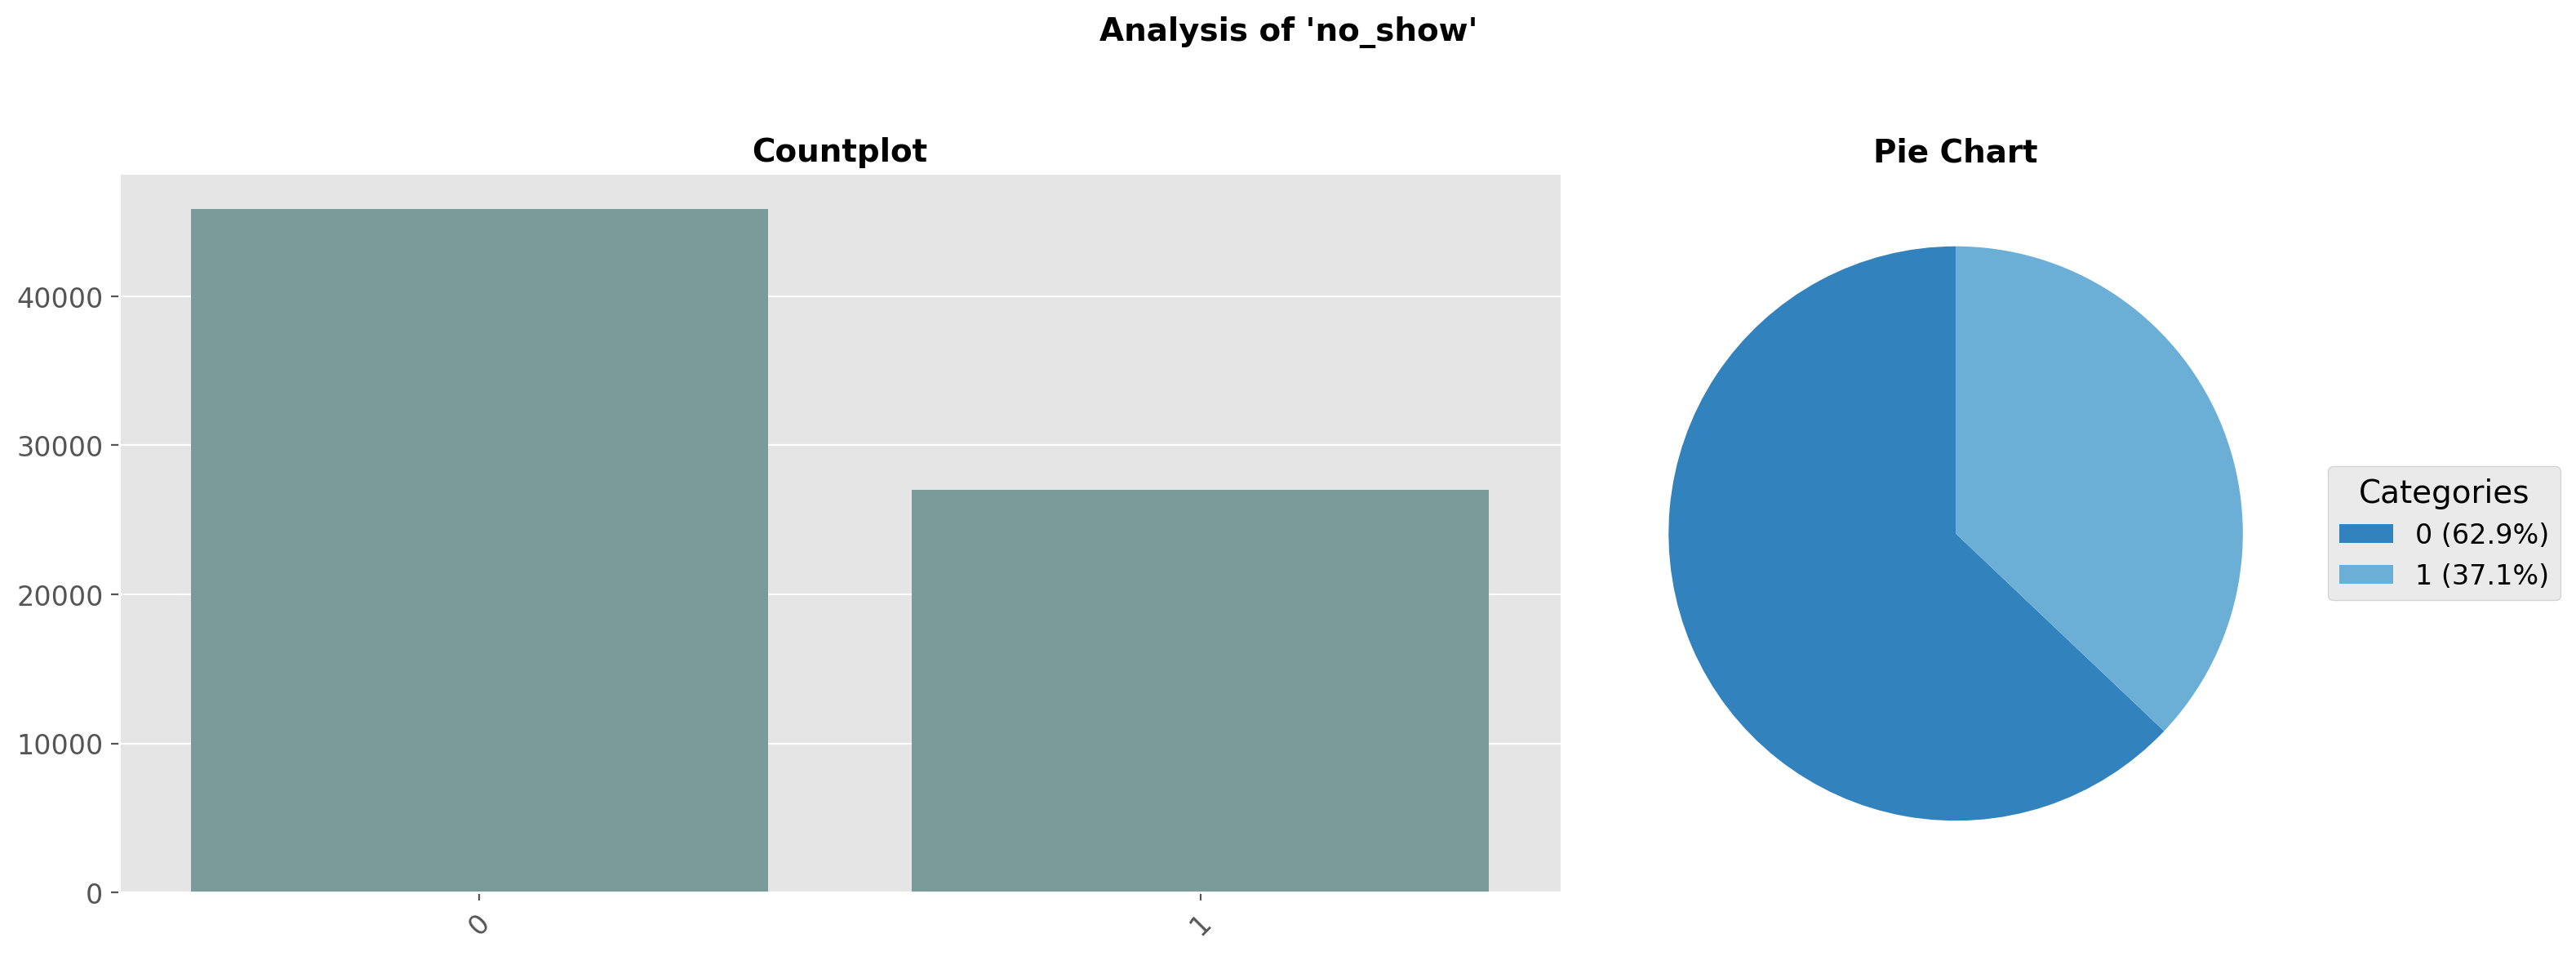

In [83]:
analyse_column_graphical(df_cleaned, 'no_show')

**💡 Class Imbalance**

- The target variable `no_show` exhibits a class imbalance, with 63% of customers showing up (0 = Show) and 37% being no-shows (1 = No-Show). While the imbalance is moderate rather than severe, it must still be carefully managed during modeling to ensure accurate predictions and avoid bias toward the majority class.

- To address this imbalance, we will adopt a combination of robust evaluation metrics and ensemble methods, which are particularly well-suited for this dataset. Below is a detailed explanation of the chosen approach, along with reasons for not selecting other potential solutions.

**💡 Model Selection:**

- We will prioritize ensemble methods such as Random Forest , Gradient Boosting (e.g., XGBoost, LightGBM) , or Balanced Random Forest. These methods:

  - Naturally handle class imbalance better than single models.

  - Can incorporate techniques like class weighting internally, without requiring explicit resampling.

  - Are computationally efficient and scalable, making them suitable for the large dataset provided.

**💡 Evaluation Metrics:**

Instead of relying solely on accuracy (which can be misleading in imbalanced datasets), we will focus on more robust metrics that will provide a comprehensive understanding of model performance, especially for the minority class (`No-Show`), which is crucial for reducing expenses incurred due to no-shows: -

  - Precision : Measures the proportion of correctly predicted no-shows out of all predicted no-shows. This is critical for minimizing false positives (e.g., incorrectly predicting a customer as a no-show).

  - Recall (Sensitivity) : Measures the proportion of correctly predicted no-shows out of all actual no-shows. This ensures that we capture as many true no-shows as possible.

  - F1-Score : The harmonic mean of Precision and Recall, providing a balanced measure of both.

  - AUC-ROC : Evaluates the model's ability to distinguish between classes across all thresholds.

  - PR Curve (Precision-Recall Curve) : Particularly useful for imbalanced datasets, as it focuses on the performance of the minority class (no-shows).

**💡Reasons for not choosing other solutions:**

   -  SMOTE (Synthetic Minority Over-sampling Technique)
      - The dataset is already very large, and generating synthetic samples would significantly increase computational costs.
      - SMOTE may introduce noise if the minority class (No-Show) has overlapping characteristics with the majority class (Show), potentially degrading model performance.
      - Given the moderate imbalance (37% vs. 63%), SMOTE is unnecessary and may overcomplicate the solution.

   - Upsampling
      - Upsampling the minority class by duplicating existing samples would artificially inflate its representation, leading to overfitting.
      - For a large dataset like this, upsampling is computationally expensive and unlikely to yield significant improvements over ensemble methods.

   - Downsampling
      - Downsampling the majority class (Show) would discard valuable information, potentially reducing the model's ability to generalize.

   - Cost-sensitive Learning
      - While cost-sensitive learning is effective, not all algorithms natively support it. Implementing it manually can be complex and time-consuming.
      - Ensemble methods like XGBoost and LightGBM inherently support class weighting, making them a more streamlined and efficient choice.
    

---
### 📈 **7.2. Explore `branch`**

- Id

<br>

---

In [84]:
analyse_column_non_graphical(df_cleaned, 'branch')

... Analysing Column: 'branch'

🔢 Data Type: category
💎 Number of Unique Values: 2
📋 List of Unique Categories: ['Changi', 'Orchard']
📊 Data Distribution:


,Proportion,Count
branch,,
Changi,66.69%,"48,615"
Orchard,33.31%,"24,282"


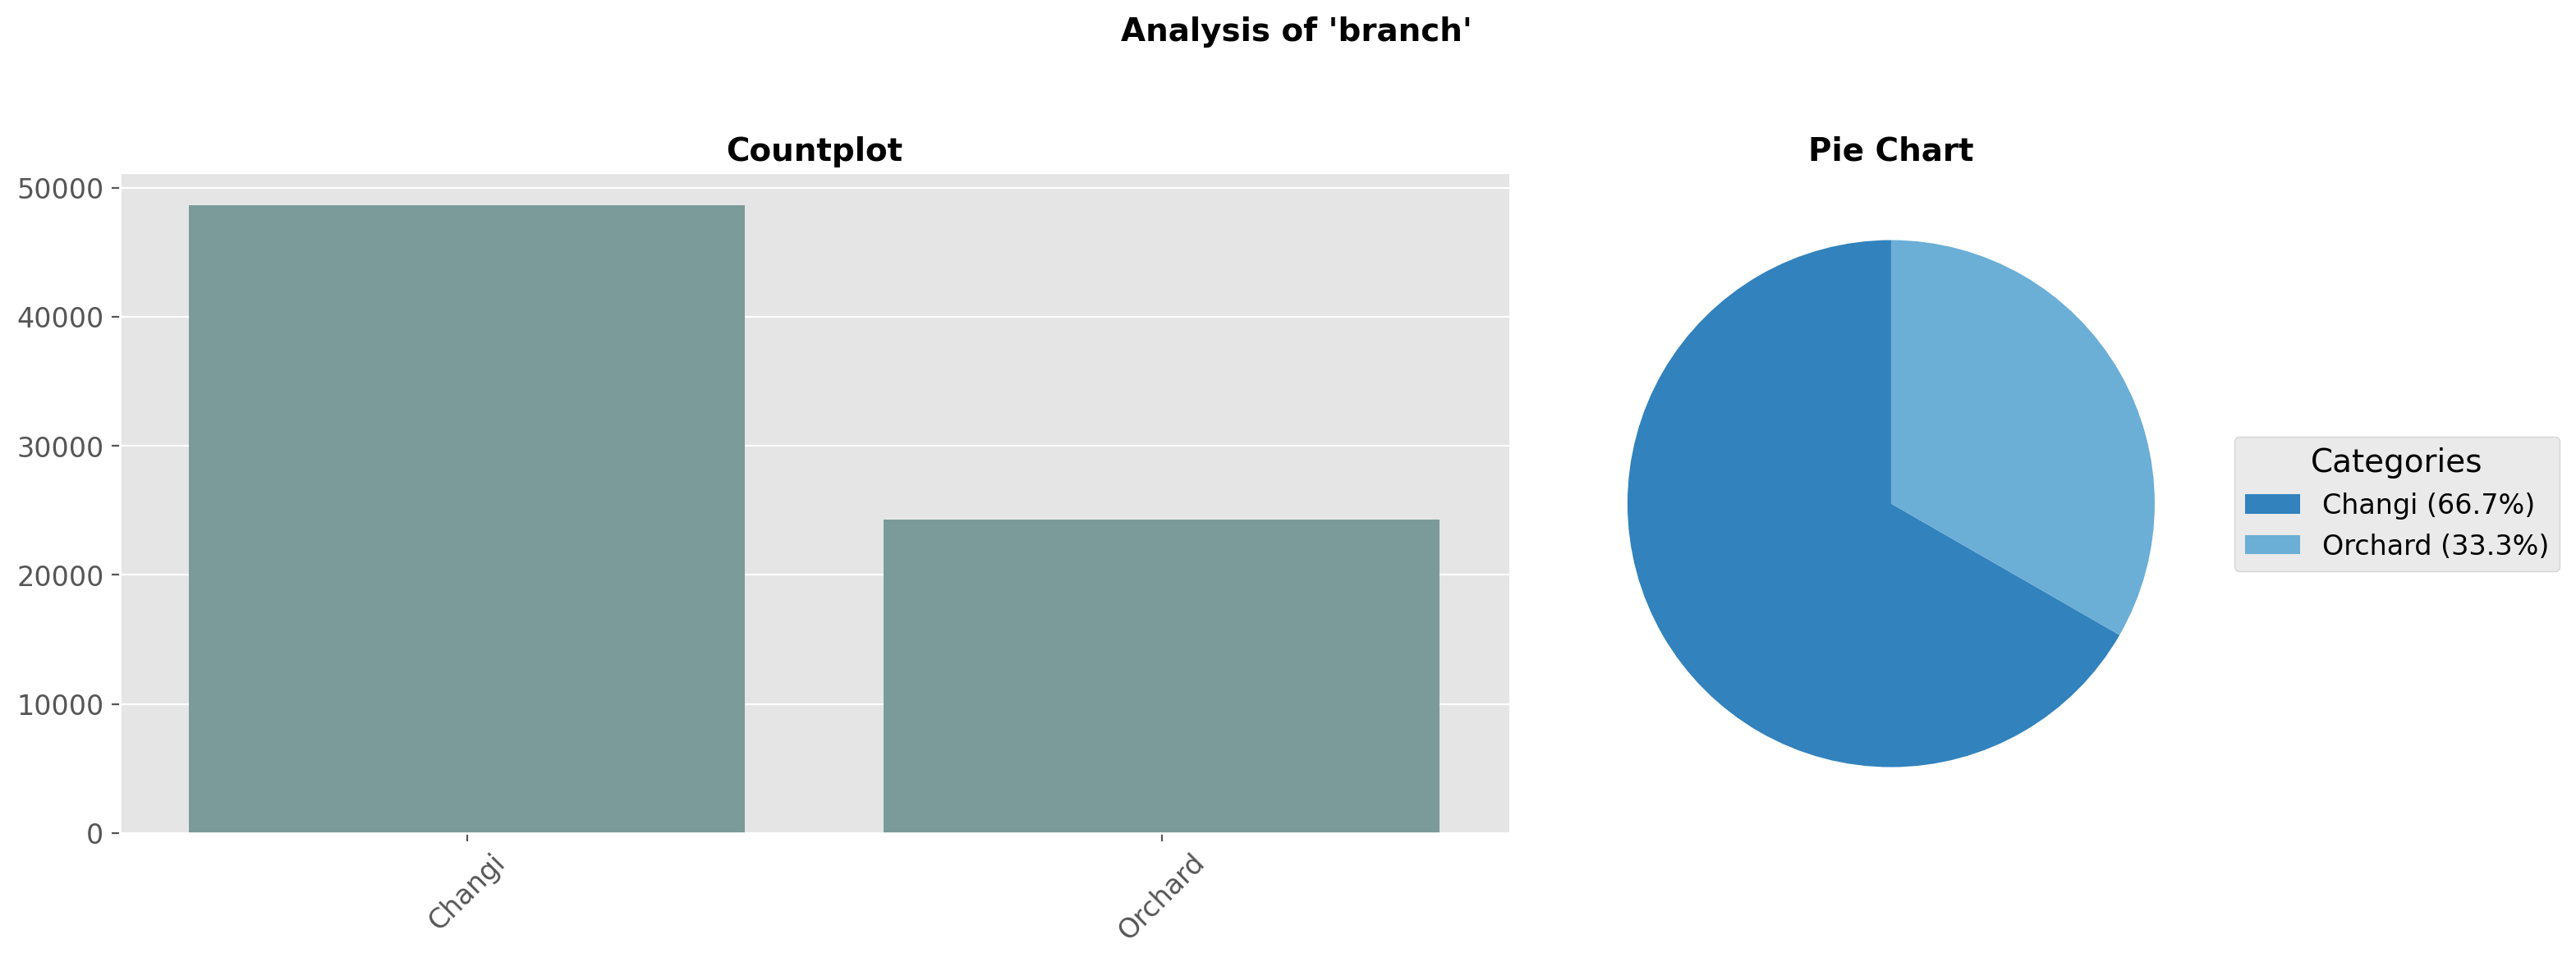

In [85]:
analyse_column_graphical(df_cleaned, 'branch')

---
### 📈 **7.3. Explore `booking_month`**

- Id

<br>

---

In [86]:
analyse_column_non_graphical(df_cleaned, 'booking_month')

... Analysing Column: 'booking_month'

🔢 Data Type: category
💎 Number of Unique Values: 12
📋 List of Unique Categories: ['November', 'August', 'September', 'March', 'October', 'June', 'July', 'April', 'May', 'February', 'January', 'December']
📊 Data Distribution:


,Proportion,Count
booking_month,,
June,8.77%,"6,394"
September,8.65%,"6,302"
November,8.61%,"6,275"
January,8.57%,"6,248"
August,8.47%,"6,175"
October,8.38%,"6,108"
July,8.38%,"6,106"
March,8.14%,"5,937"
February,8.07%,"5,880"


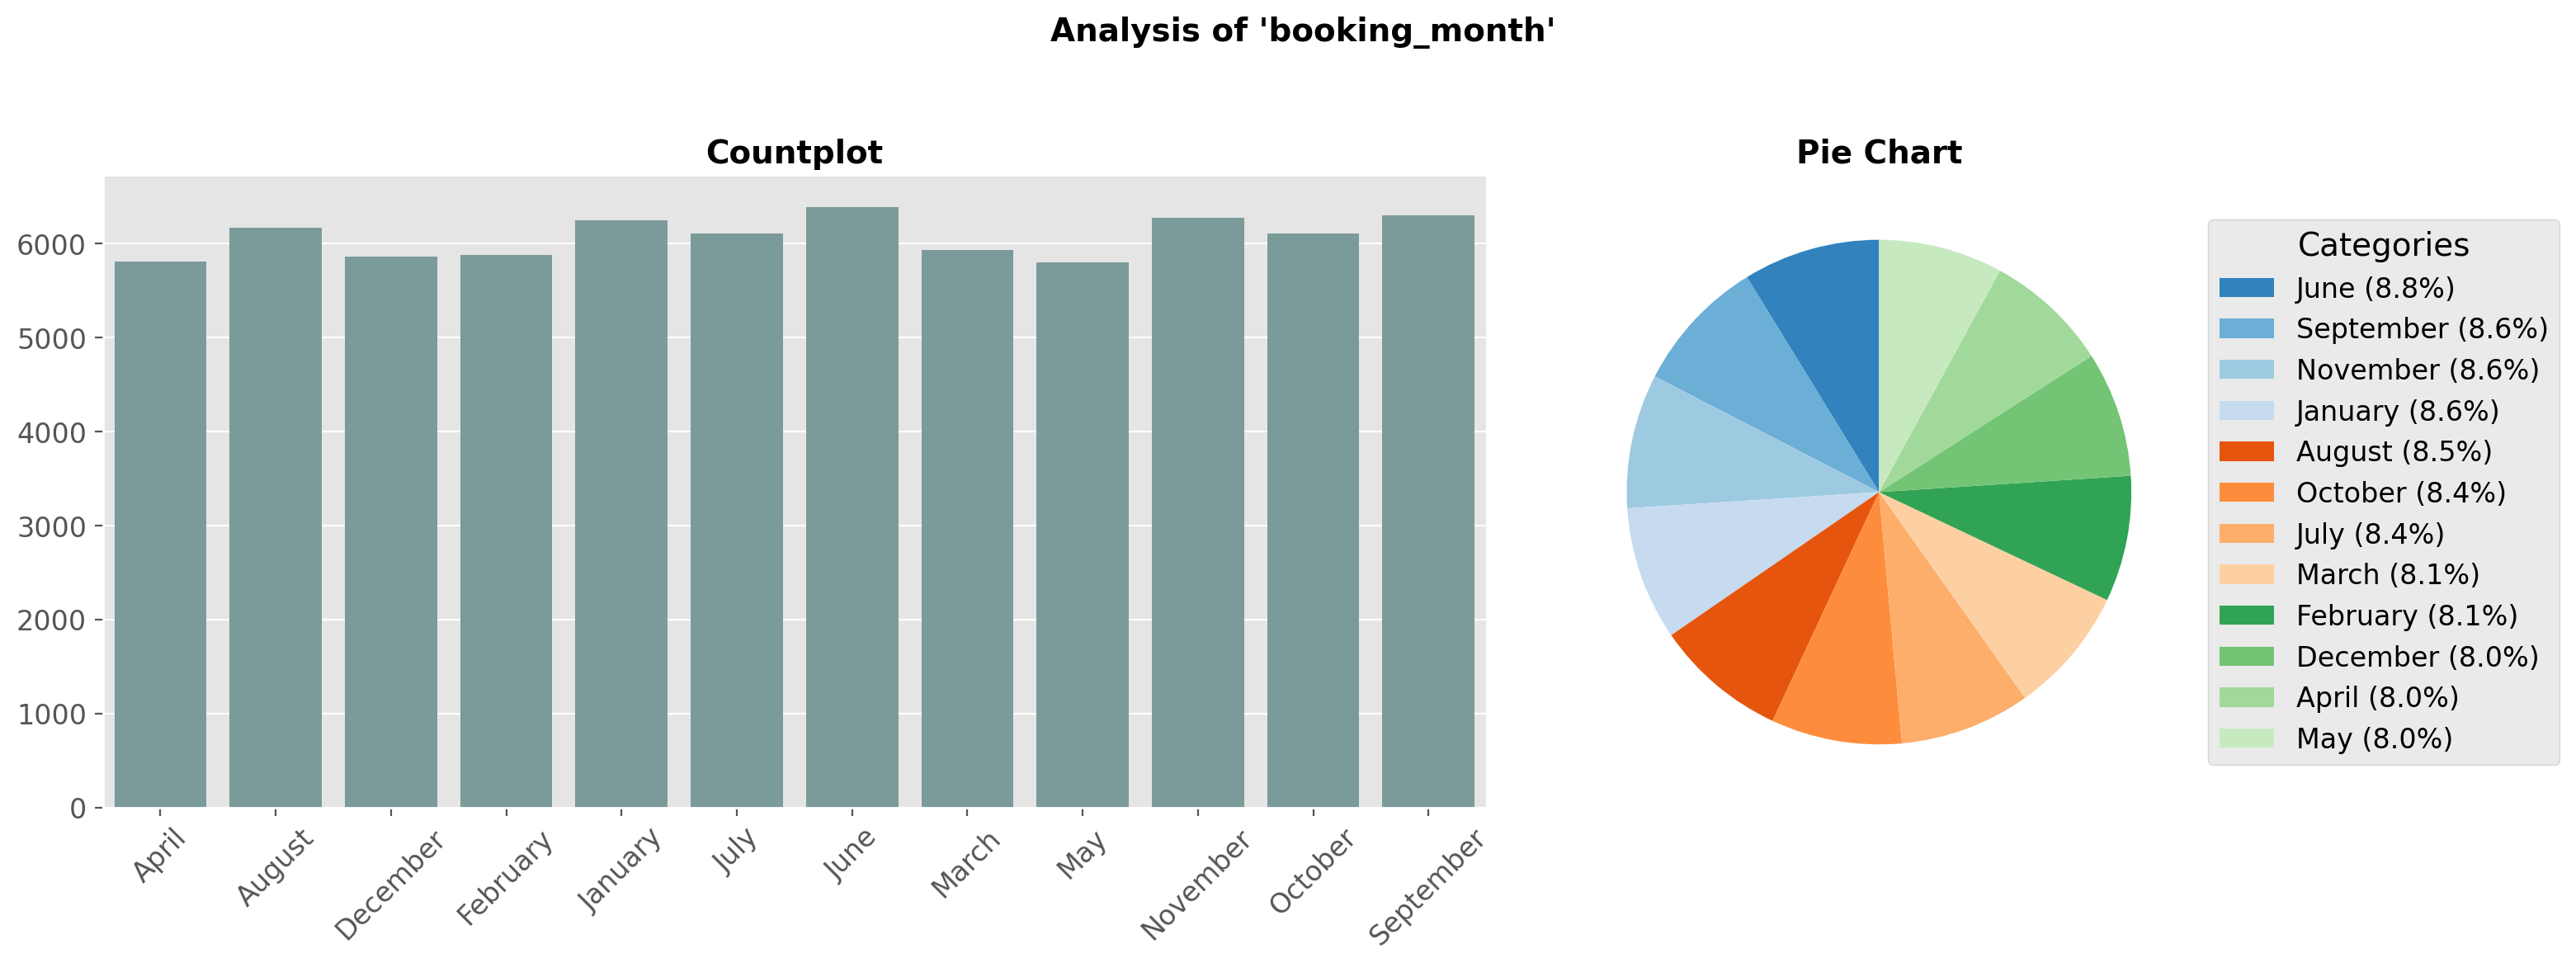

In [87]:
analyse_column_graphical(df_cleaned, 'booking_month')

---
### 📈 **7.4. Explore `arrival_month`**

- Id

<br>

---

In [88]:
analyse_column_non_graphical(df_cleaned, 'arrival_month')

... Analysing Column: 'arrival_month'

🔢 Data Type: category
💎 Number of Unique Values: 12
📋 List of Unique Categories: ['June', 'November', 'October', 'March', 'May', 'August', 'July', 'January', 'April', 'September', 'February', 'December']
📊 Data Distribution:


,Proportion,Count
arrival_month,,
August,11.66%,"8,501"
July,10.59%,"7,721"
May,9.83%,"7,165"
April,9.31%,"6,788"
October,9.27%,"6,758"
June,9.15%,"6,667"
September,8.90%,"6,485"
March,8.10%,"5,903"
February,6.75%,"4,923"


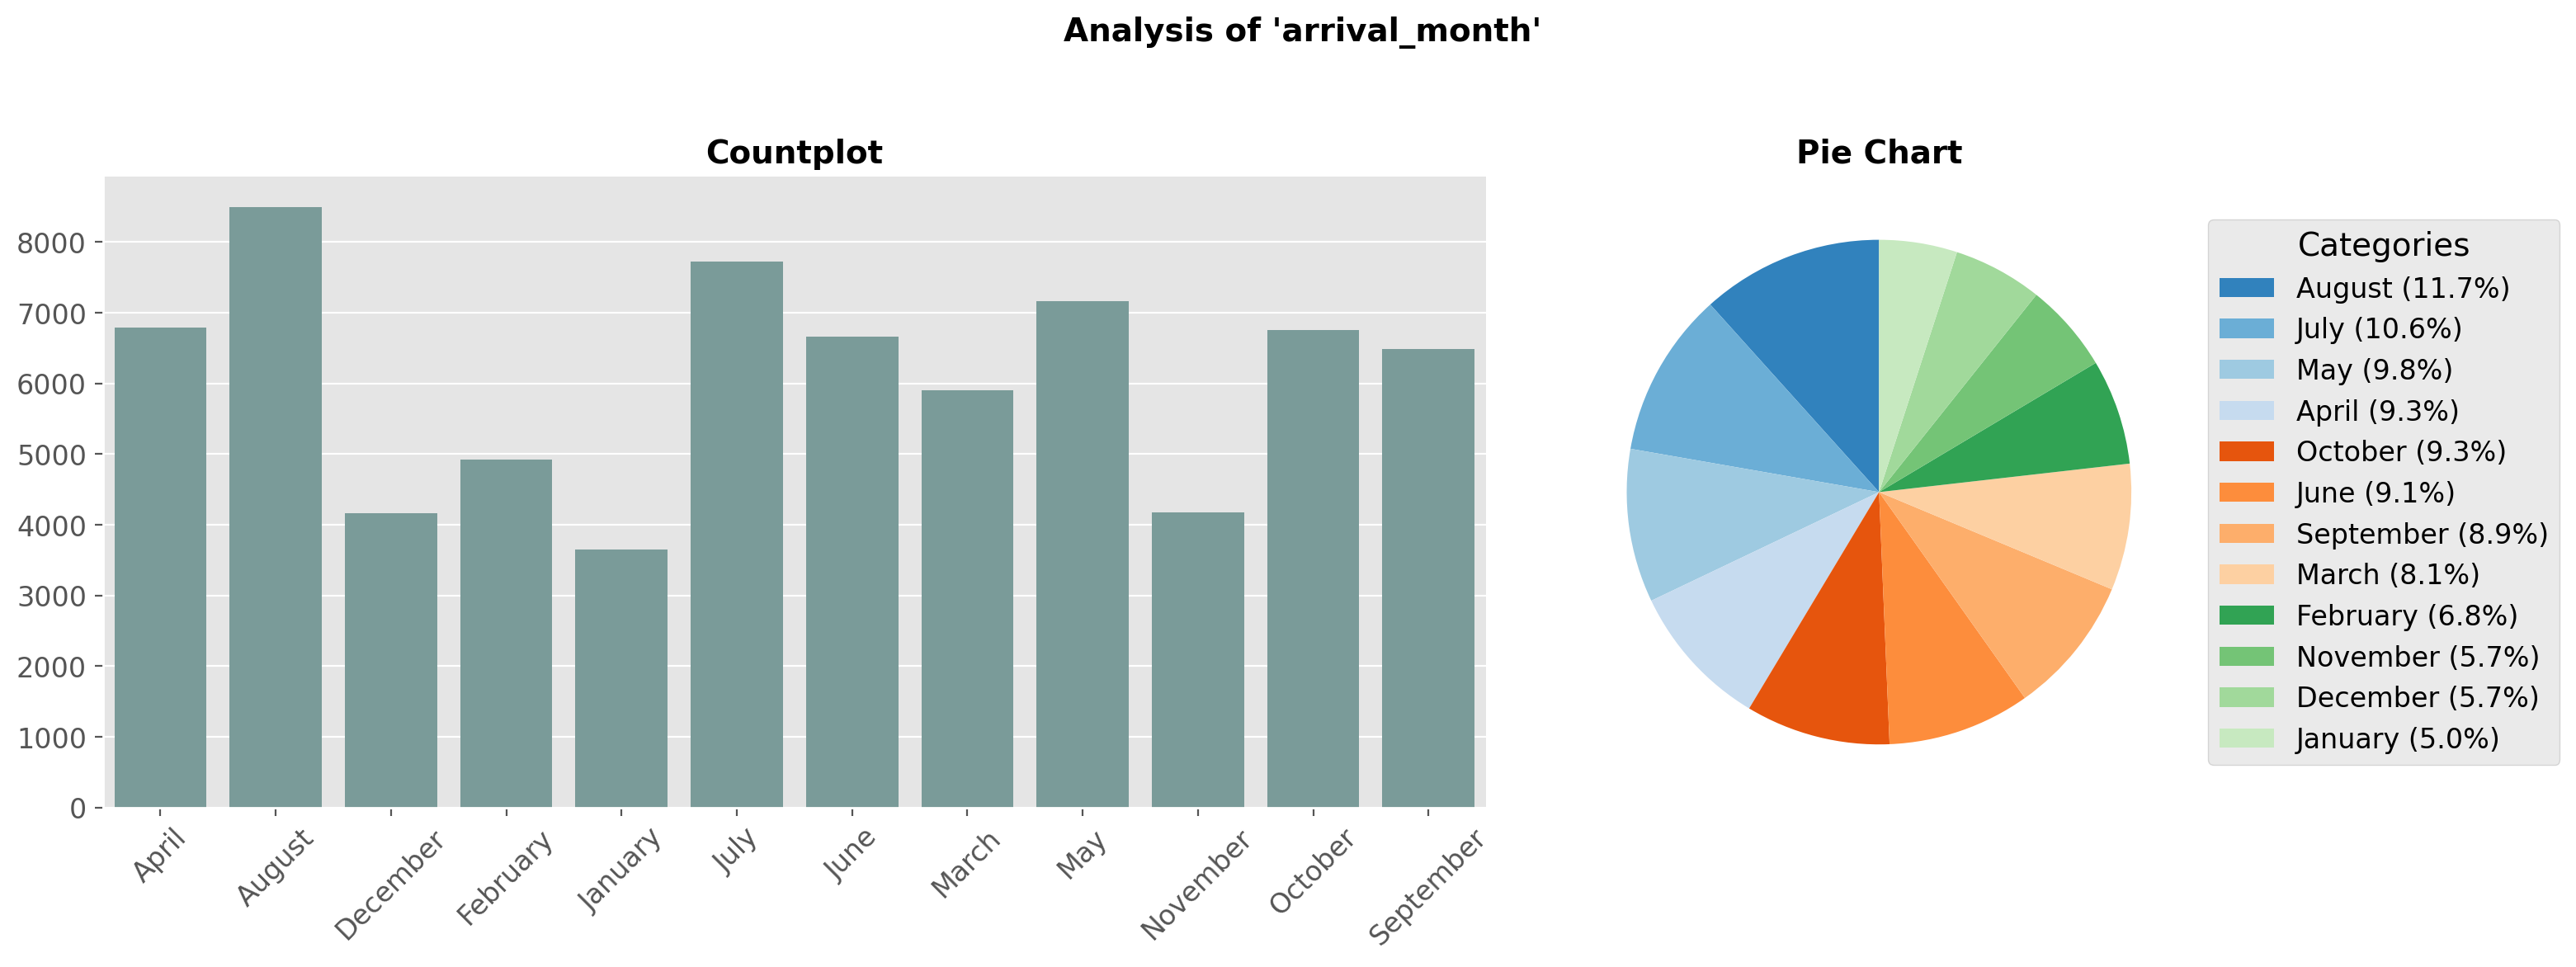

In [89]:
analyse_column_graphical(df_cleaned, 'arrival_month')

---
### 📈 **7.5. Explore `arrival_day`**

- Id

<br>

---

In [90]:
analyse_column_non_graphical(df_cleaned, 'arrival_day')

... Analysing Column: 'arrival_day'

🔢 Data Type: int64
💎 Number of Unique Values: 31
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
arrival_day,72897.00,15.76,8.78,1.00,8.00,16.00,23.00,31.00


📈 Skewness: 0.00 (Ref: Positive = Right-skewed, Negative = Left-skewed)
📈 Kurtosis: -1.18 (Ref: High = Heavy tails, Low = Light tails)


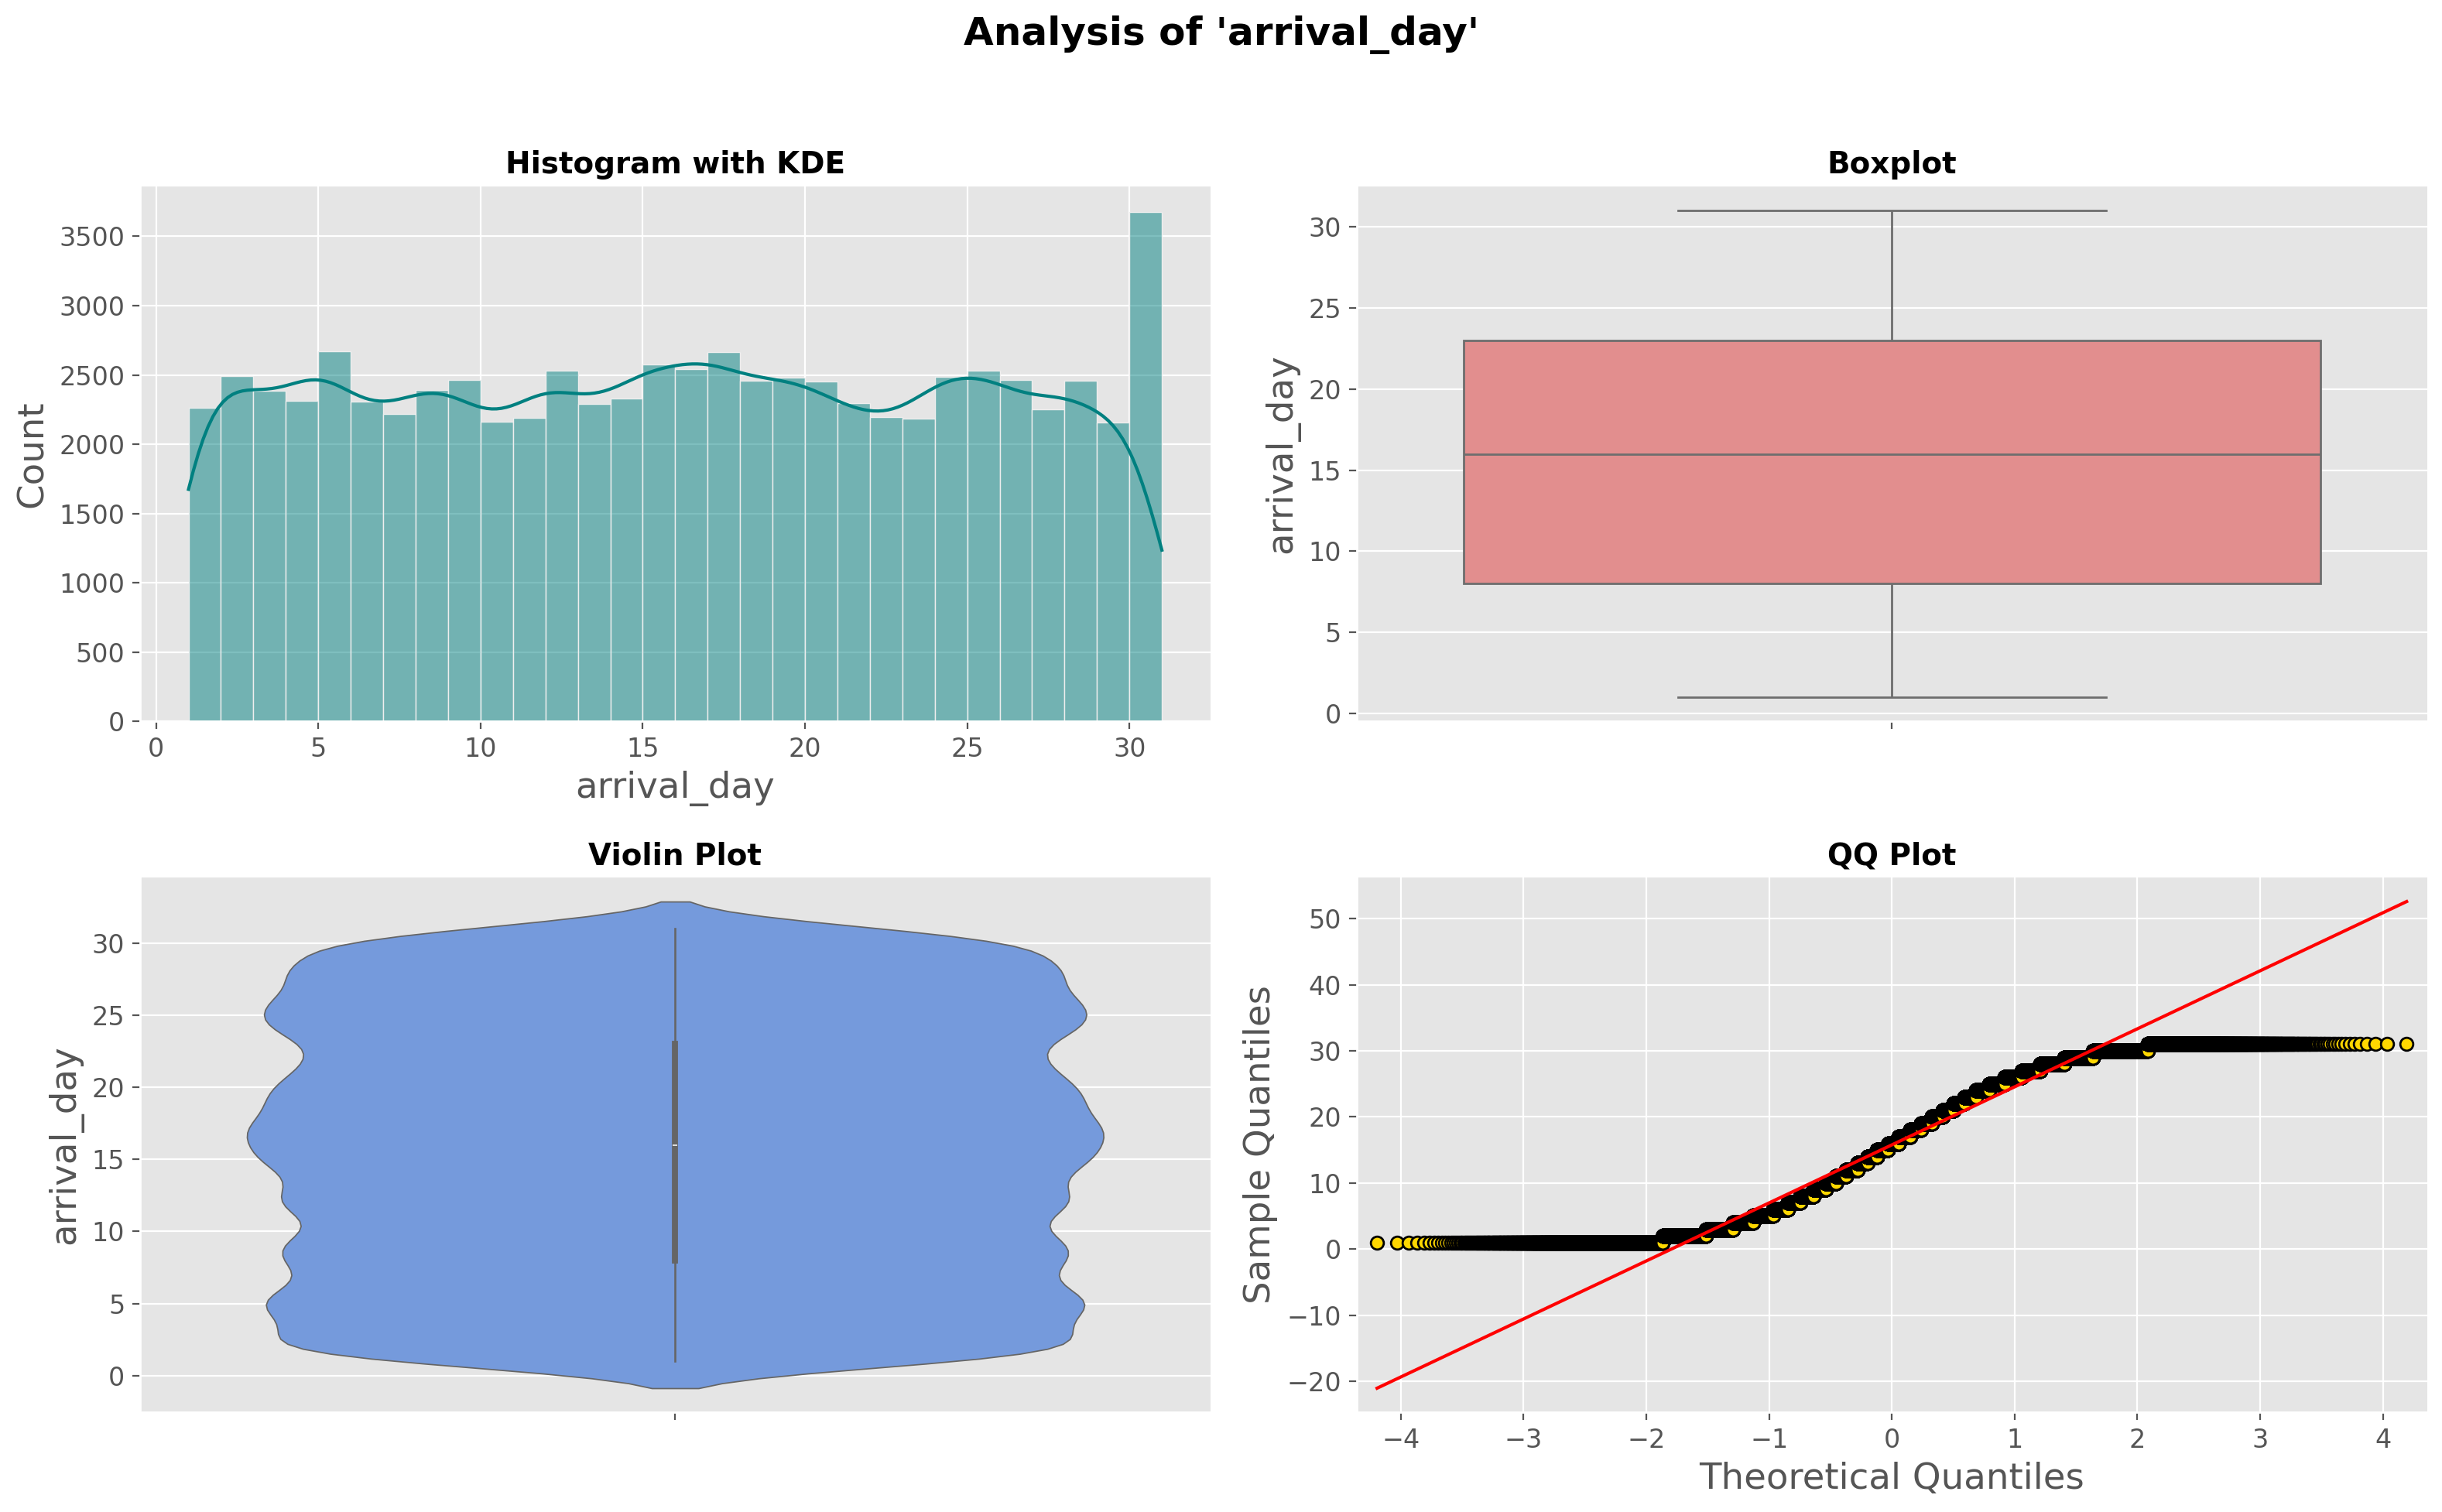

In [91]:
analyse_column_graphical(df_cleaned, 'arrival_day')

---
### 📈 **7.6. Explore `checkout_month`**

- Id

<br>

---

In [92]:
analyse_column_non_graphical(df_cleaned, 'checkout_month')

... Analysing Column: 'checkout_month'

🔢 Data Type: category
💎 Number of Unique Values: 12
📋 List of Unique Categories: ['June', 'November', 'October', 'March', 'May', 'August', 'July', 'January', 'April', 'September', 'February', 'December']
📊 Data Distribution:


,Proportion,Count
checkout_month,,
August,11.63%,"8,476"
July,10.69%,"7,793"
May,10.04%,"7,321"
October,9.52%,"6,939"
April,9.27%,"6,758"
June,8.95%,"6,525"
September,8.78%,"6,401"
March,7.82%,"5,702"
February,6.48%,"4,726"


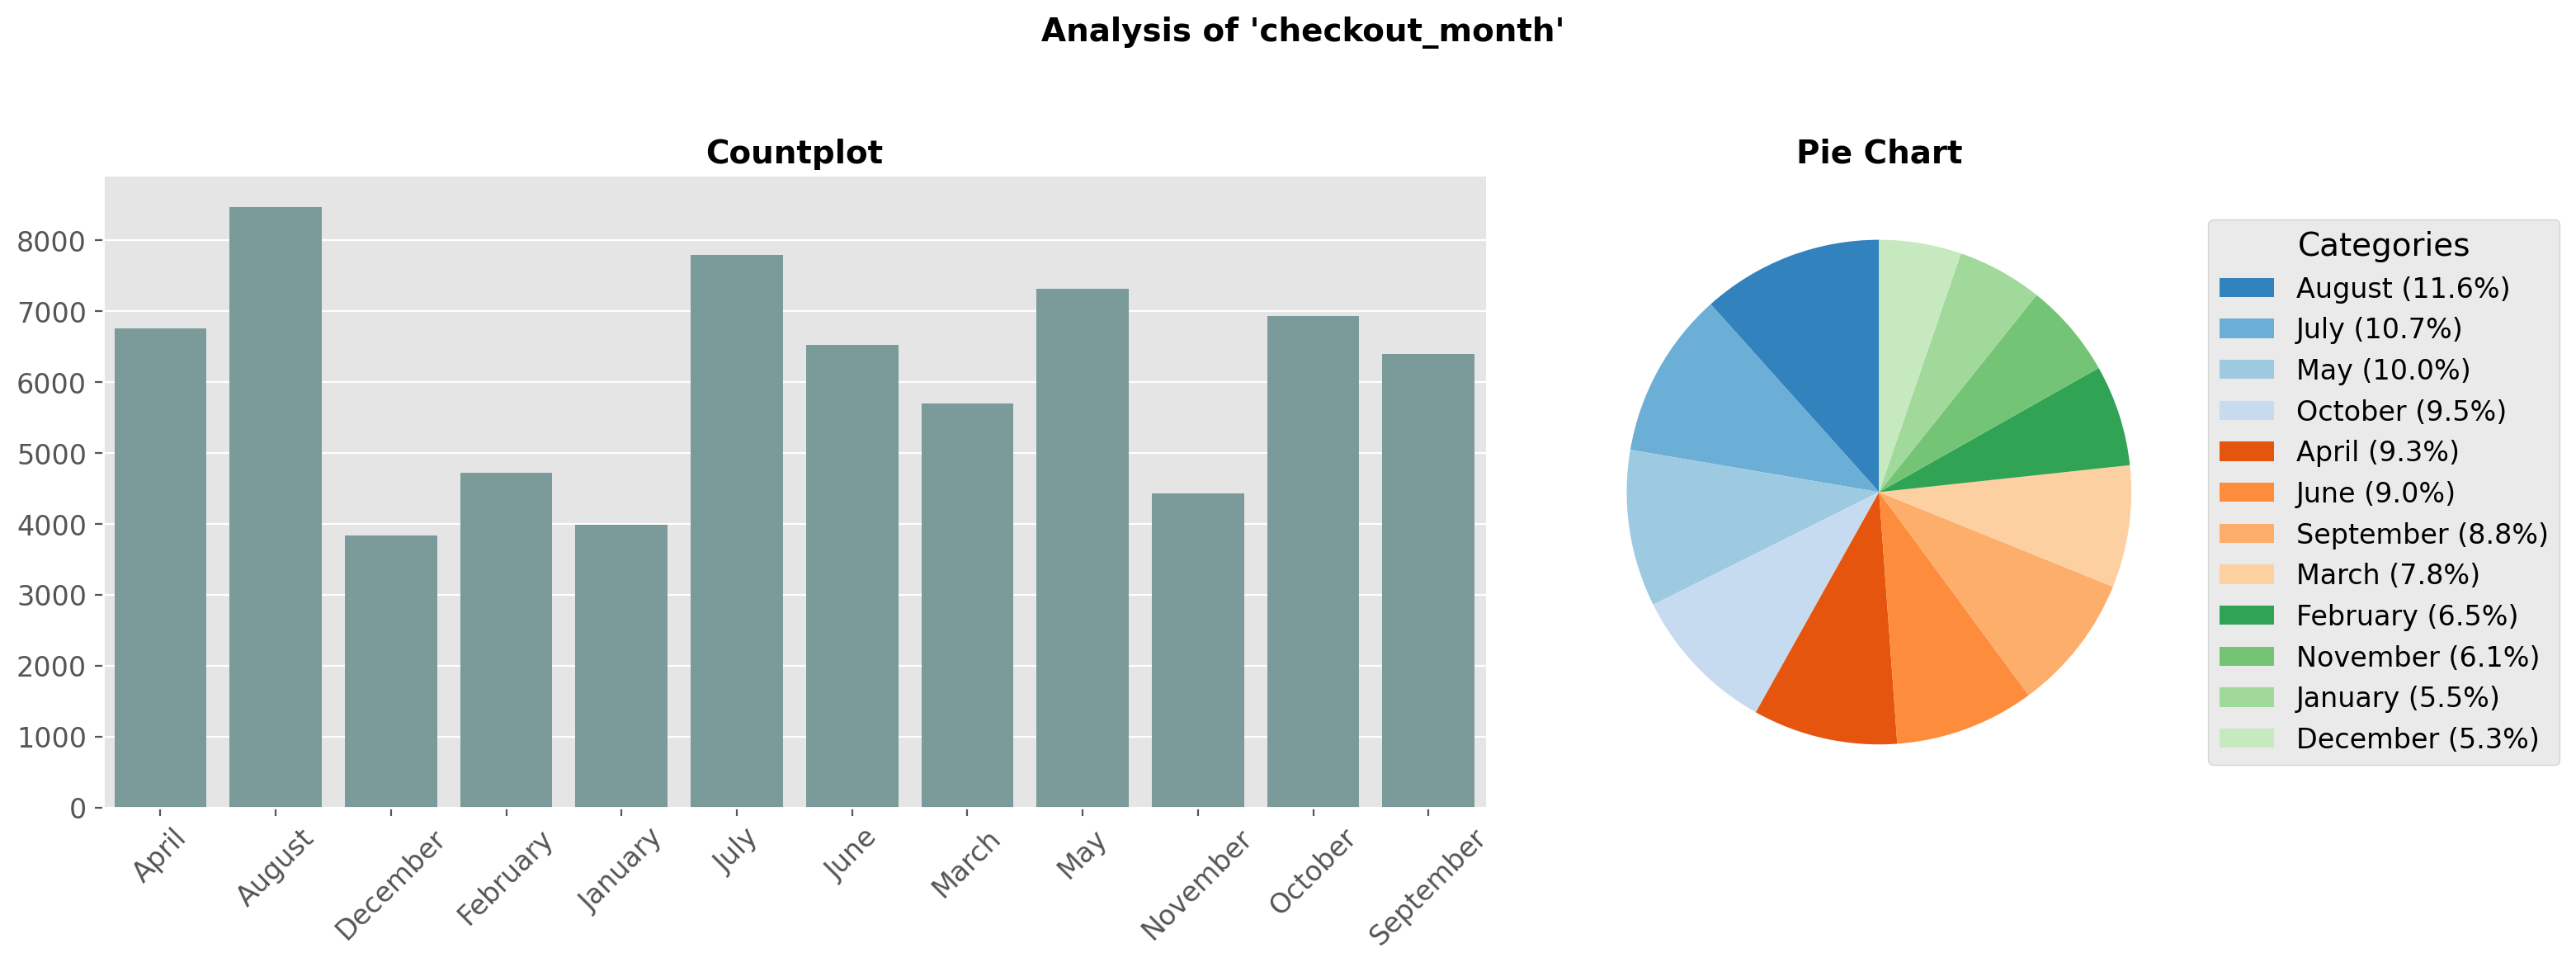

In [93]:
analyse_column_graphical(df_cleaned, 'checkout_month')

---
### 📈 **7.7. Explore `checkout_day`**

- Id

<br>

---

In [94]:
analyse_column_non_graphical(df_cleaned, 'checkout_day')

... Analysing Column: 'checkout_day'

🔢 Data Type: int64
💎 Number of Unique Values: 31
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
checkout_day,72897.00,15.76,8.77,1.00,8.00,16.00,23.00,31.00


📈 Skewness: -0.01 (Ref: Positive = Right-skewed, Negative = Left-skewed)
📈 Kurtosis: -1.19 (Ref: High = Heavy tails, Low = Light tails)


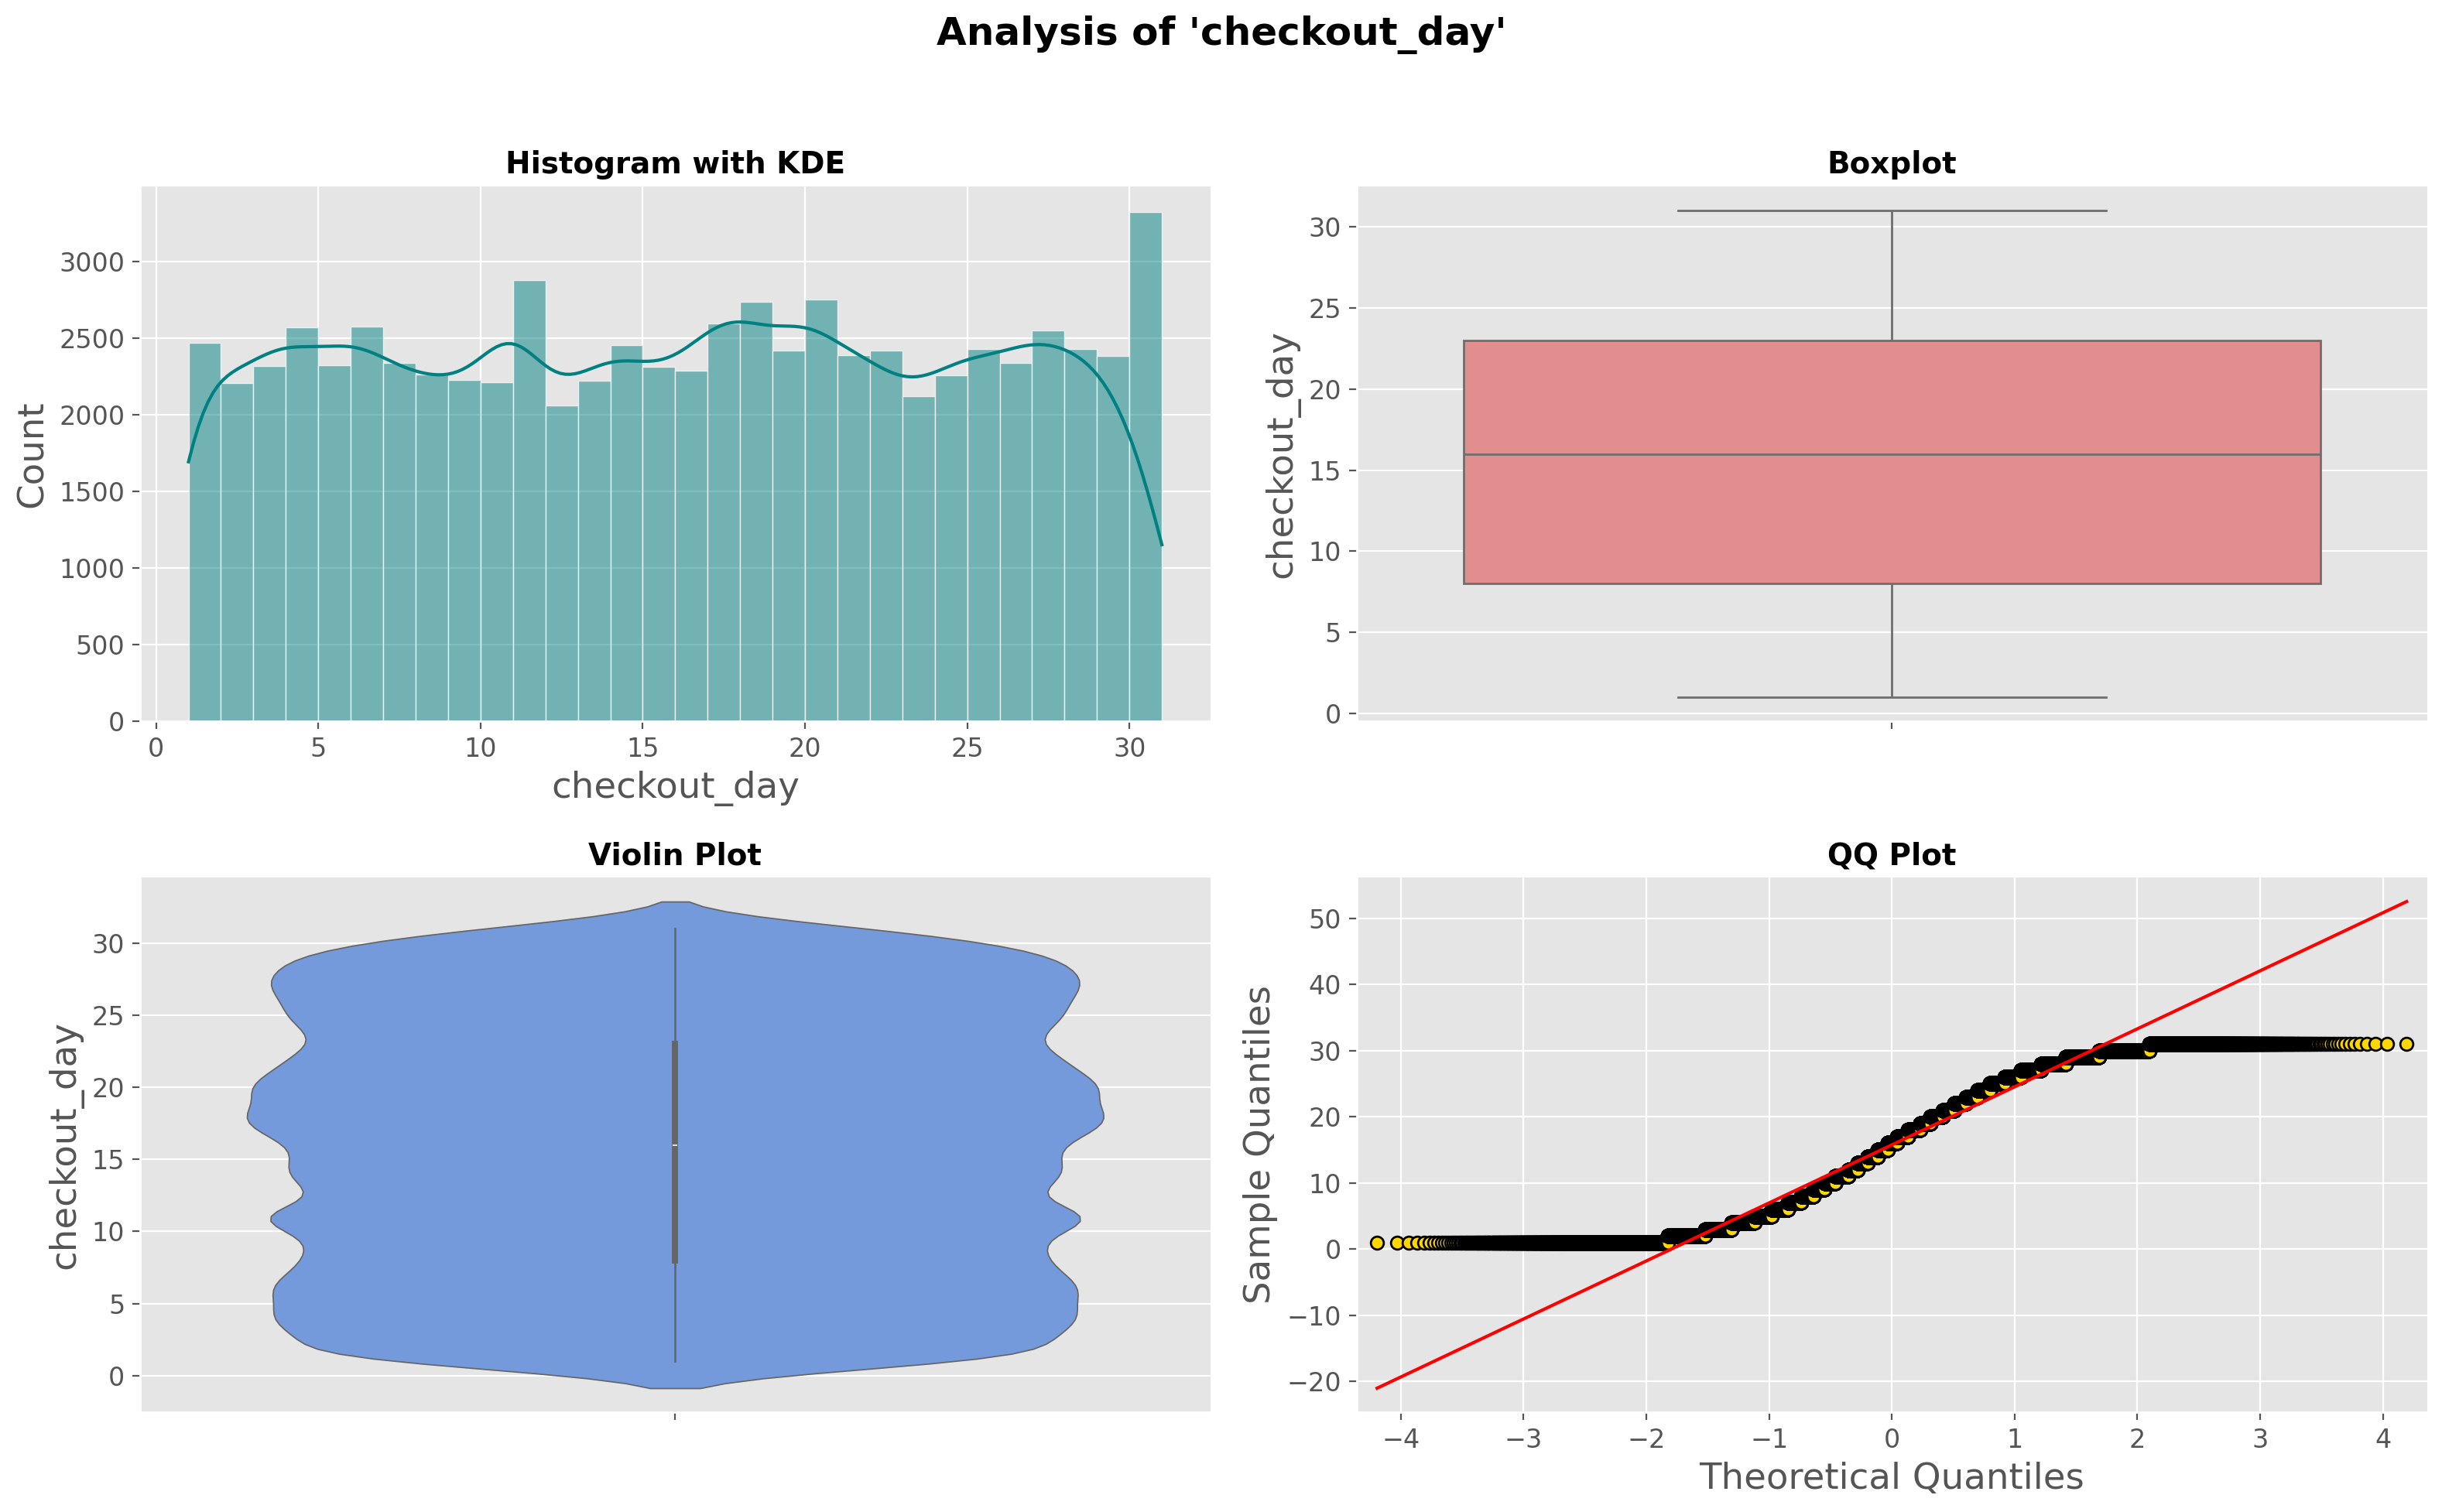

In [95]:
analyse_column_graphical(df_cleaned, 'checkout_day')

---
### 📈 **7.8. Explore `country`**

- Id

<br>

---

In [96]:
analyse_column_non_graphical(df_cleaned, 'country')

... Analysing Column: 'country'

🔢 Data Type: category
💎 Number of Unique Values: 7
📋 List of Unique Categories: ['Singapore', 'Indonesia', 'China', 'Australia', 'Japan', 'India', 'Malaysia']
📊 Data Distribution:


,Proportion,Count
country,,
China,40.82%,"29,755"
Indonesia,21.64%,"15,775"
India,13.19%,"9,617"
Australia,10.15%,"7,399"
Japan,7.82%,"5,700"
Singapore,3.21%,"2,337"
Malaysia,3.17%,"2,314"


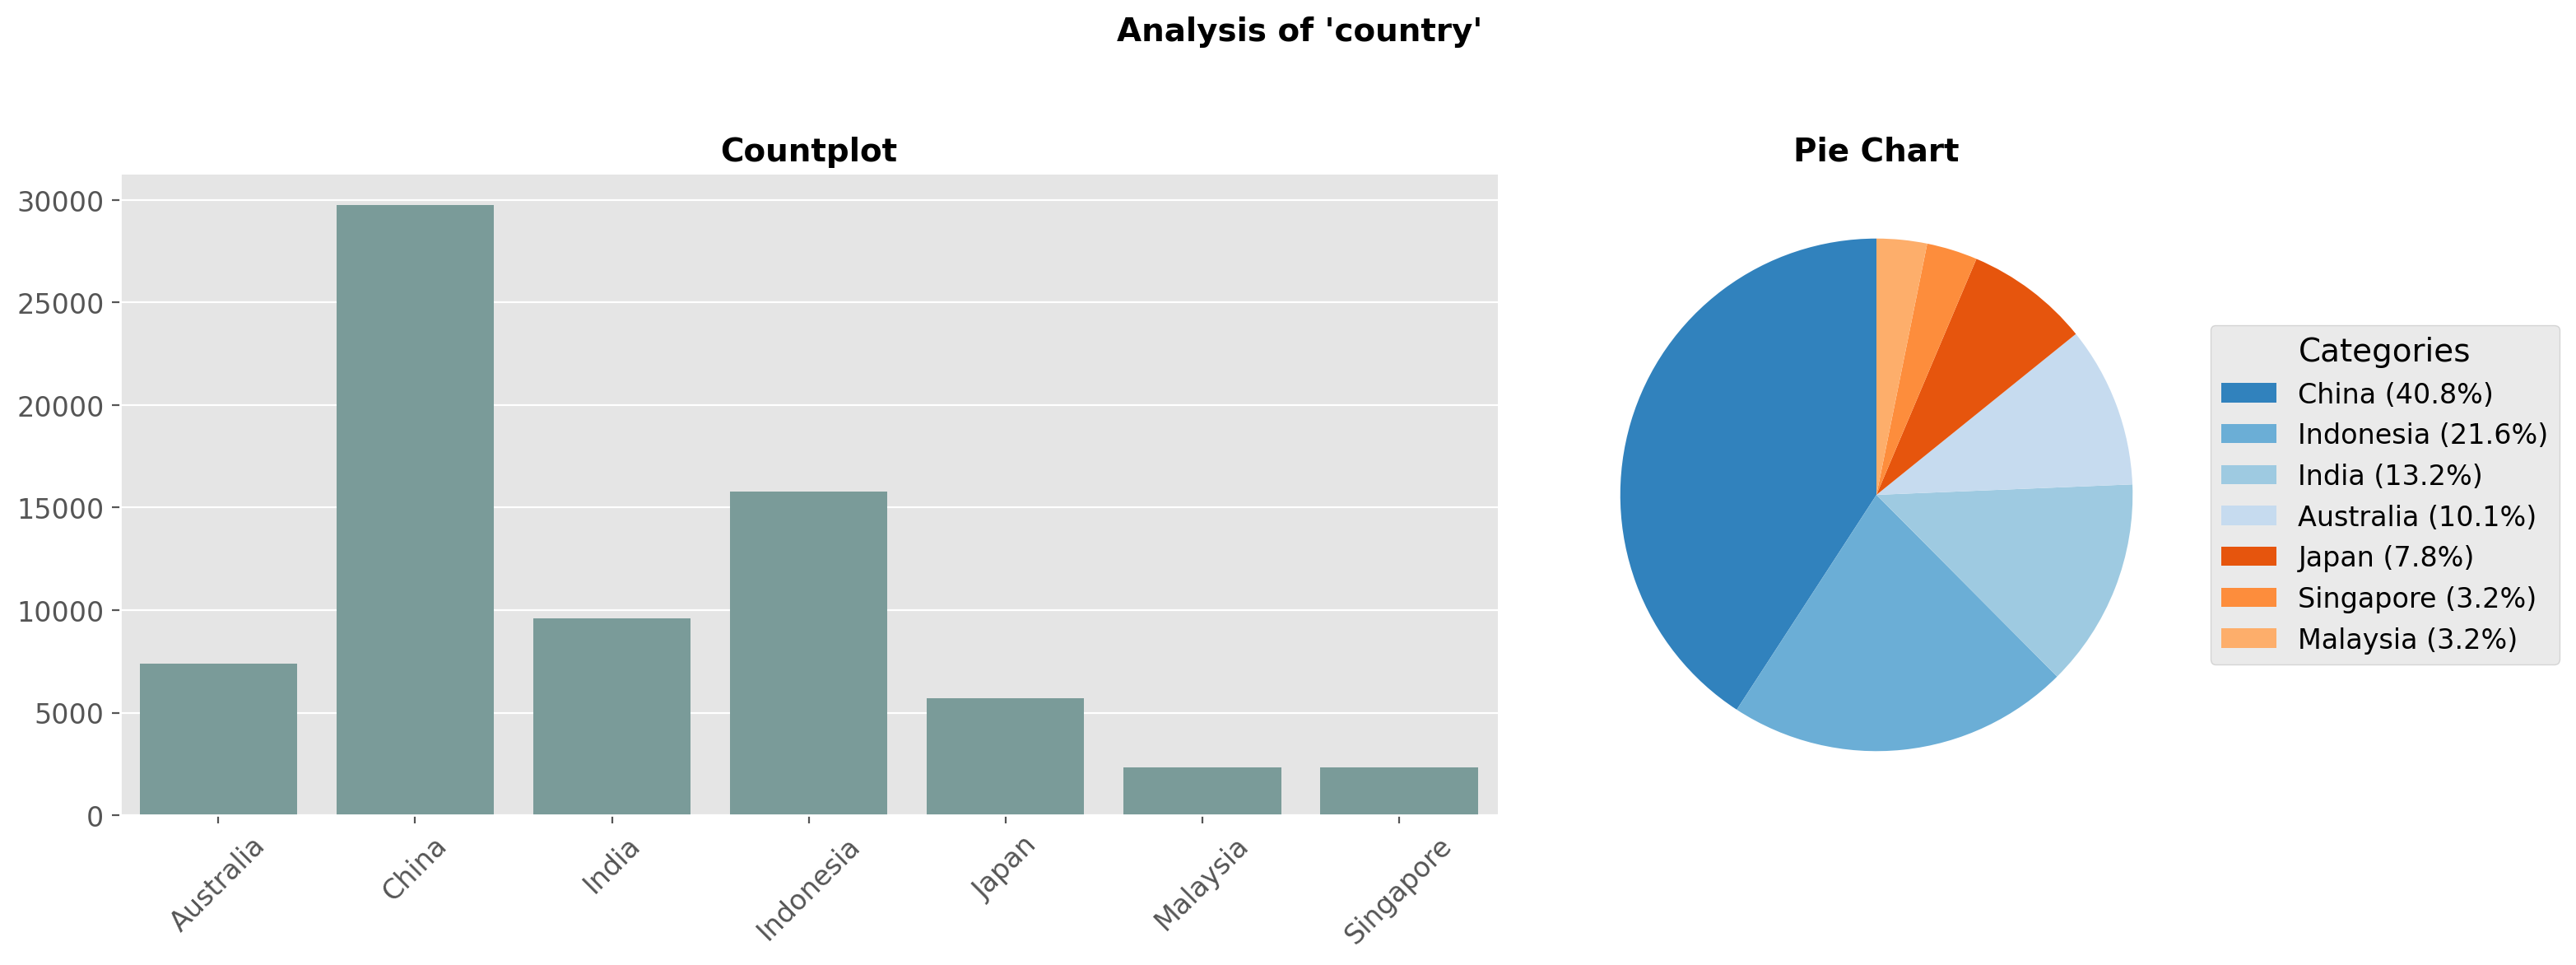

In [97]:
analyse_column_graphical(df_cleaned, 'country')

---
### 📈 **7.9. Explore `first_time`**

- Id

<br>

---

In [98]:
analyse_column_non_graphical(df_cleaned, 'first_time')

... Analysing Column: 'first_time'

🔢 Data Type: category
💎 Number of Unique Values: 2
📋 List of Unique Categories: [1, 0]
📊 Data Distribution:


,Proportion,Count
first_time,,
1,96.81%,"70,574"
0,3.19%,"2,323"


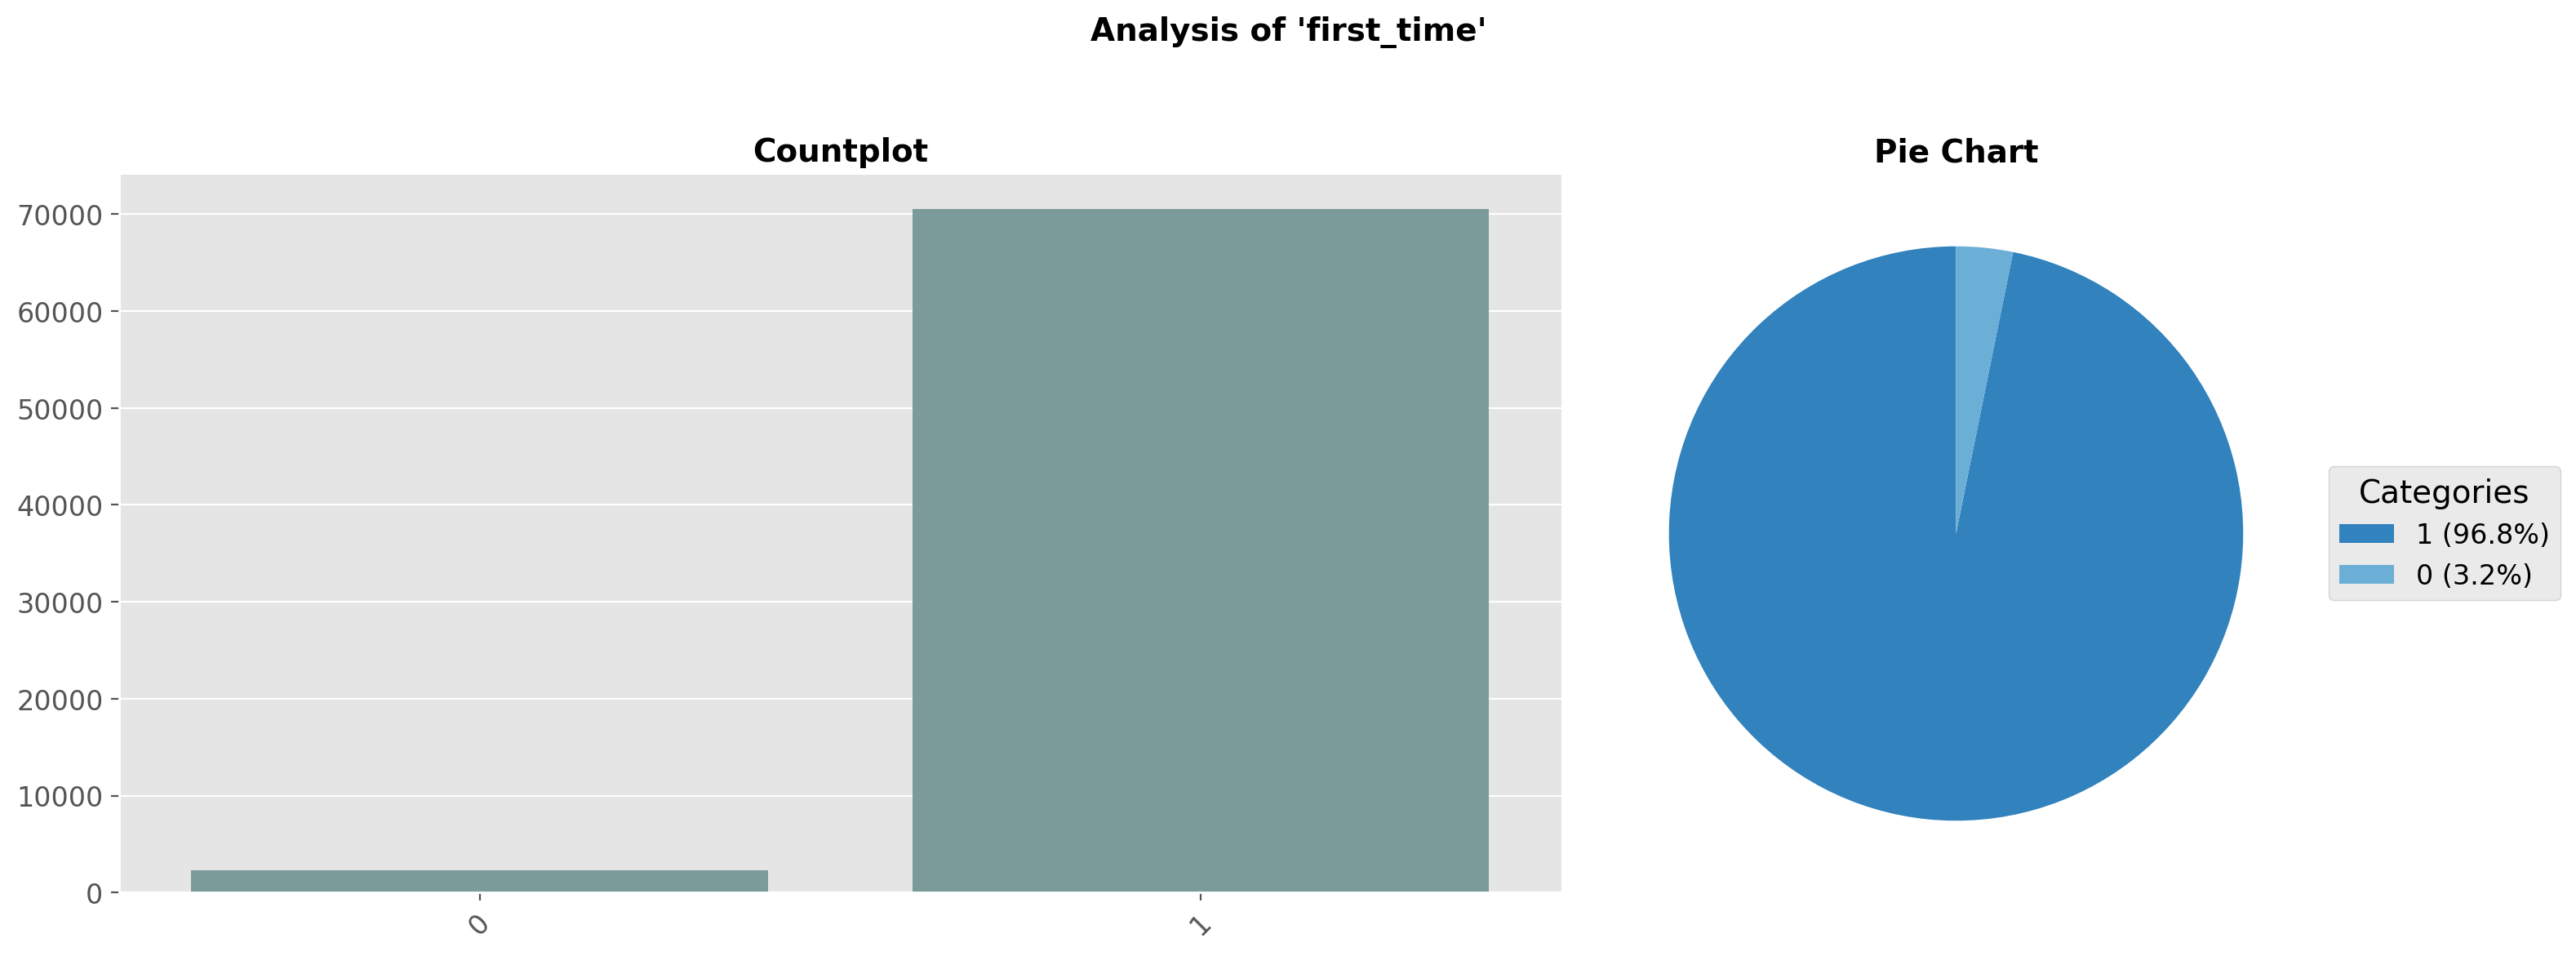

In [99]:
analyse_column_graphical(df_cleaned, 'first_time')

---
### 📈 **7.10. Explore `room`**

- Id

<br>

---

In [100]:
analyse_column_non_graphical(df_cleaned, 'room')

... Analysing Column: 'room'

🔢 Data Type: category
💎 Number of Unique Values: 4
📋 List of Unique Categories: ['Single', 'King', 'Queen', 'President Suite']
📊 Data Distribution:


,Proportion,Count
room,,
King,72.13%,"52,578"
Single,16.09%,"11,726"
Queen,11.03%,"8,041"
President Suite,0.76%,552


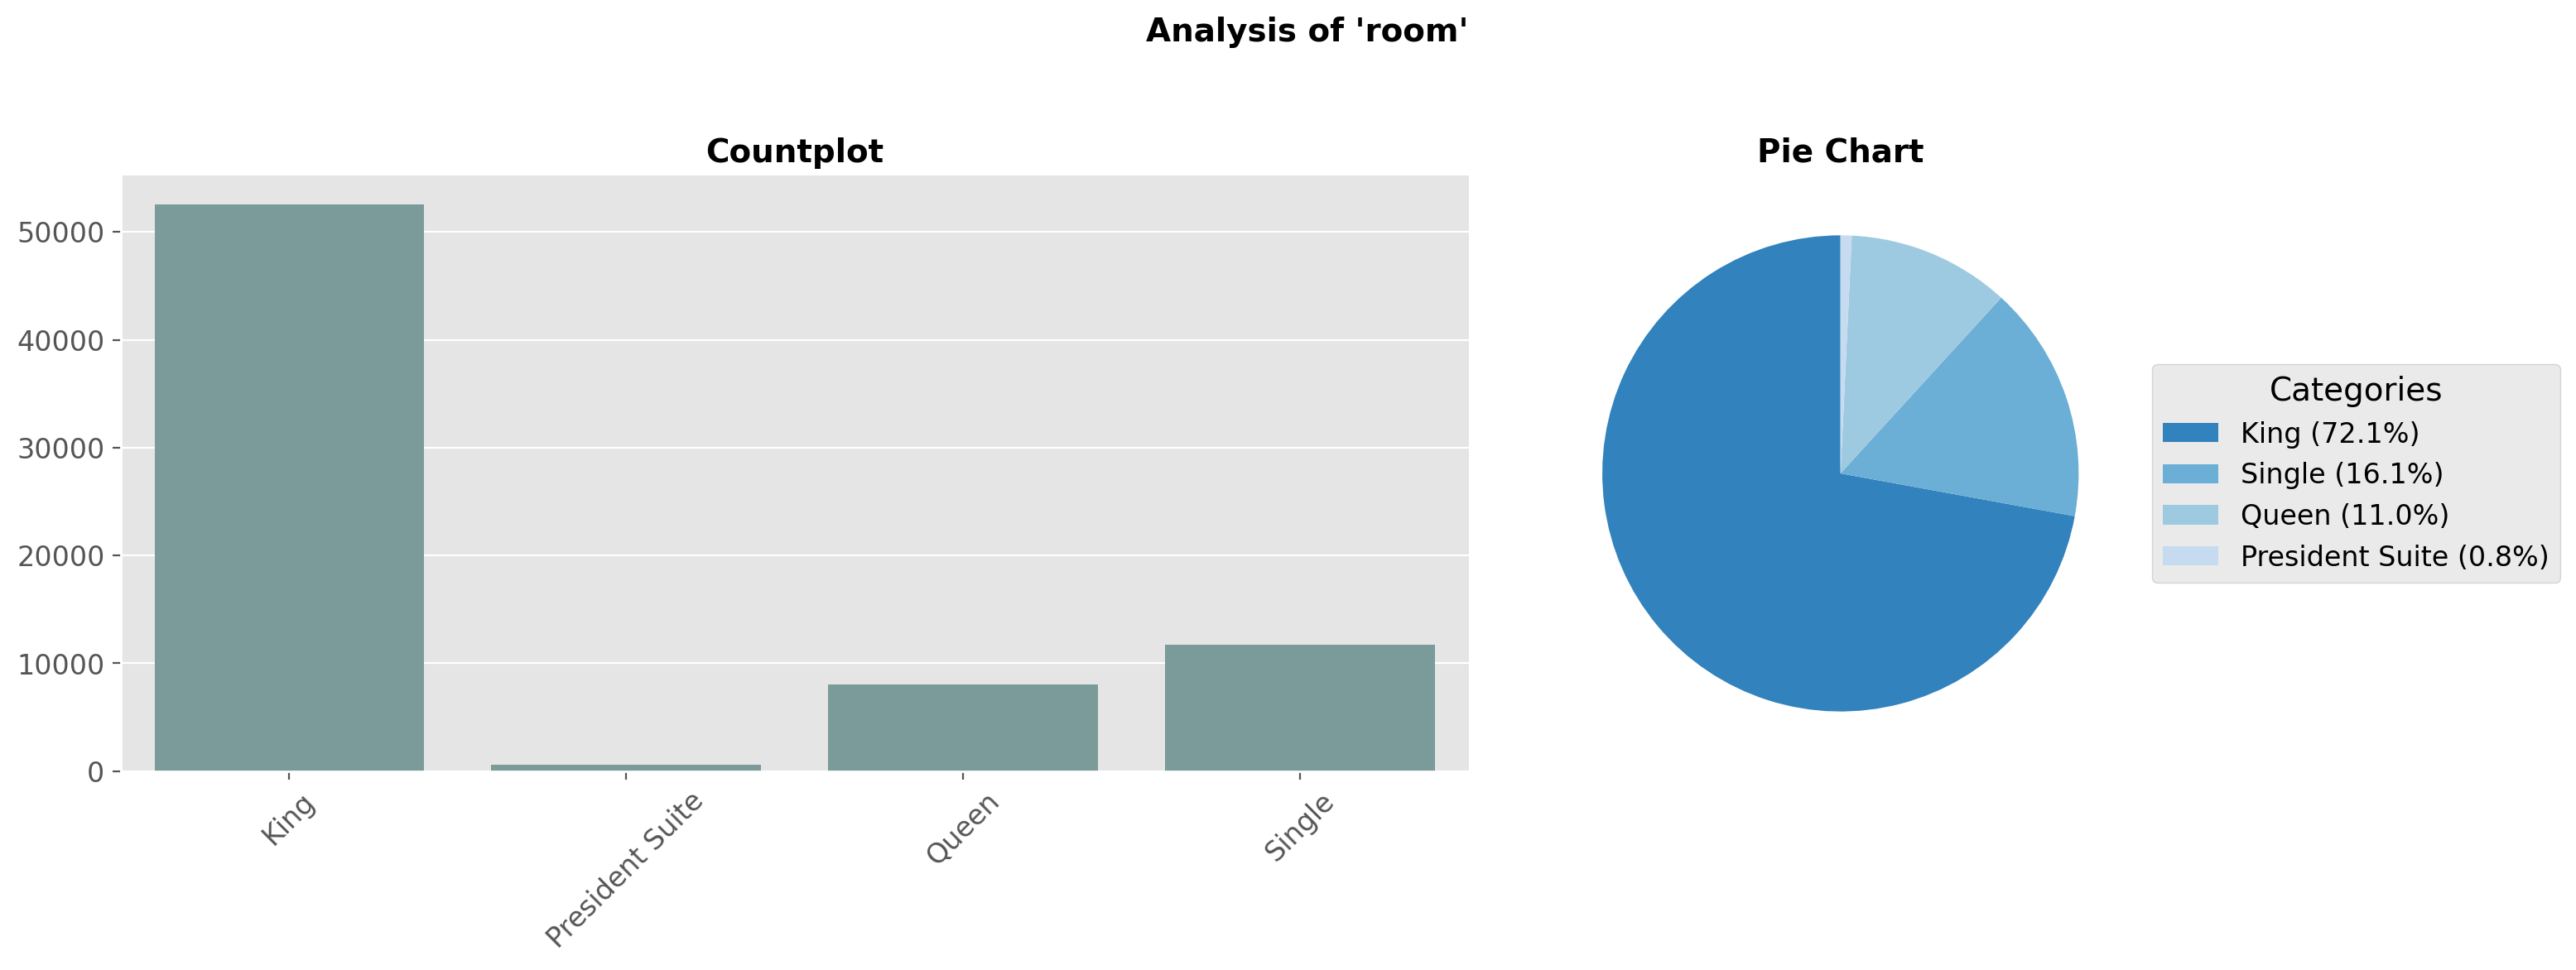

In [101]:
analyse_column_graphical(df_cleaned, 'room')

---
### 📈 **7.11. Explore `currency_type`**

- Id

<br>

---

In [102]:
analyse_column_non_graphical(df_cleaned, 'currency_type')

... Analysing Column: 'currency_type'

🔢 Data Type: category
💎 Number of Unique Values: 2
📋 List of Unique Categories: ['SGD', 'USD']
📊 Data Distribution:


,Proportion,Count
currency_type,,
USD,50.04%,"36,480"
SGD,49.96%,"36,417"


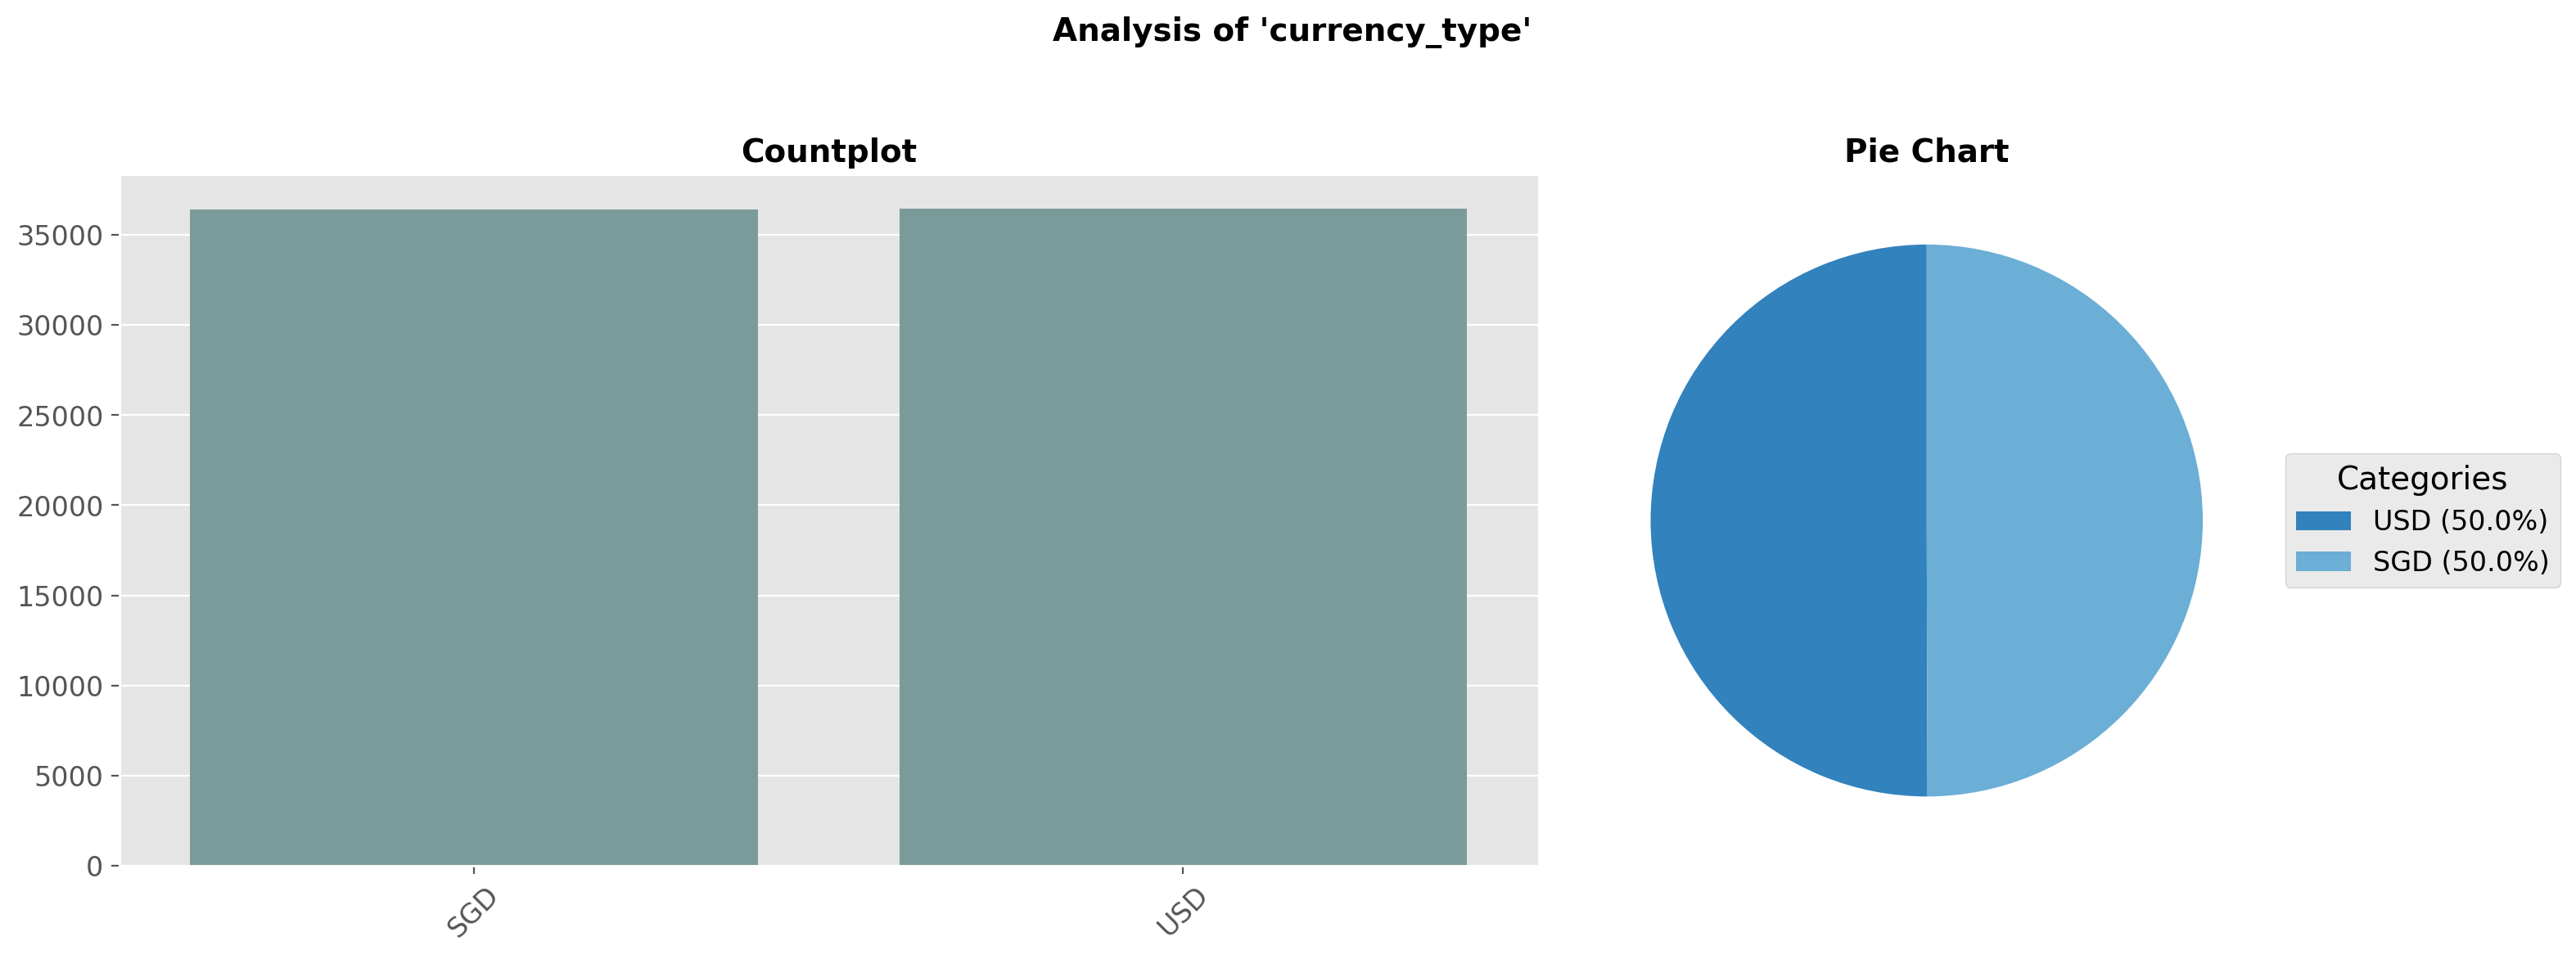

In [103]:
analyse_column_graphical(df_cleaned, 'currency_type')

---
### 📈 **7.12. Explore `price`**

- Id

<br>

---

In [104]:
analyse_column_non_graphical(df_cleaned, 'price')

... Analysing Column: 'price'

🔢 Data Type: float64
💎 Number of Unique Values: 51390
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
price,72897.00,942.00,263.69,394.21,818.26,905.76,997.95,2099.96


📈 Skewness: 0.59 (Ref: Positive = Right-skewed, Negative = Left-skewed)
📈 Kurtosis: 0.87 (Ref: High = Heavy tails, Low = Light tails)


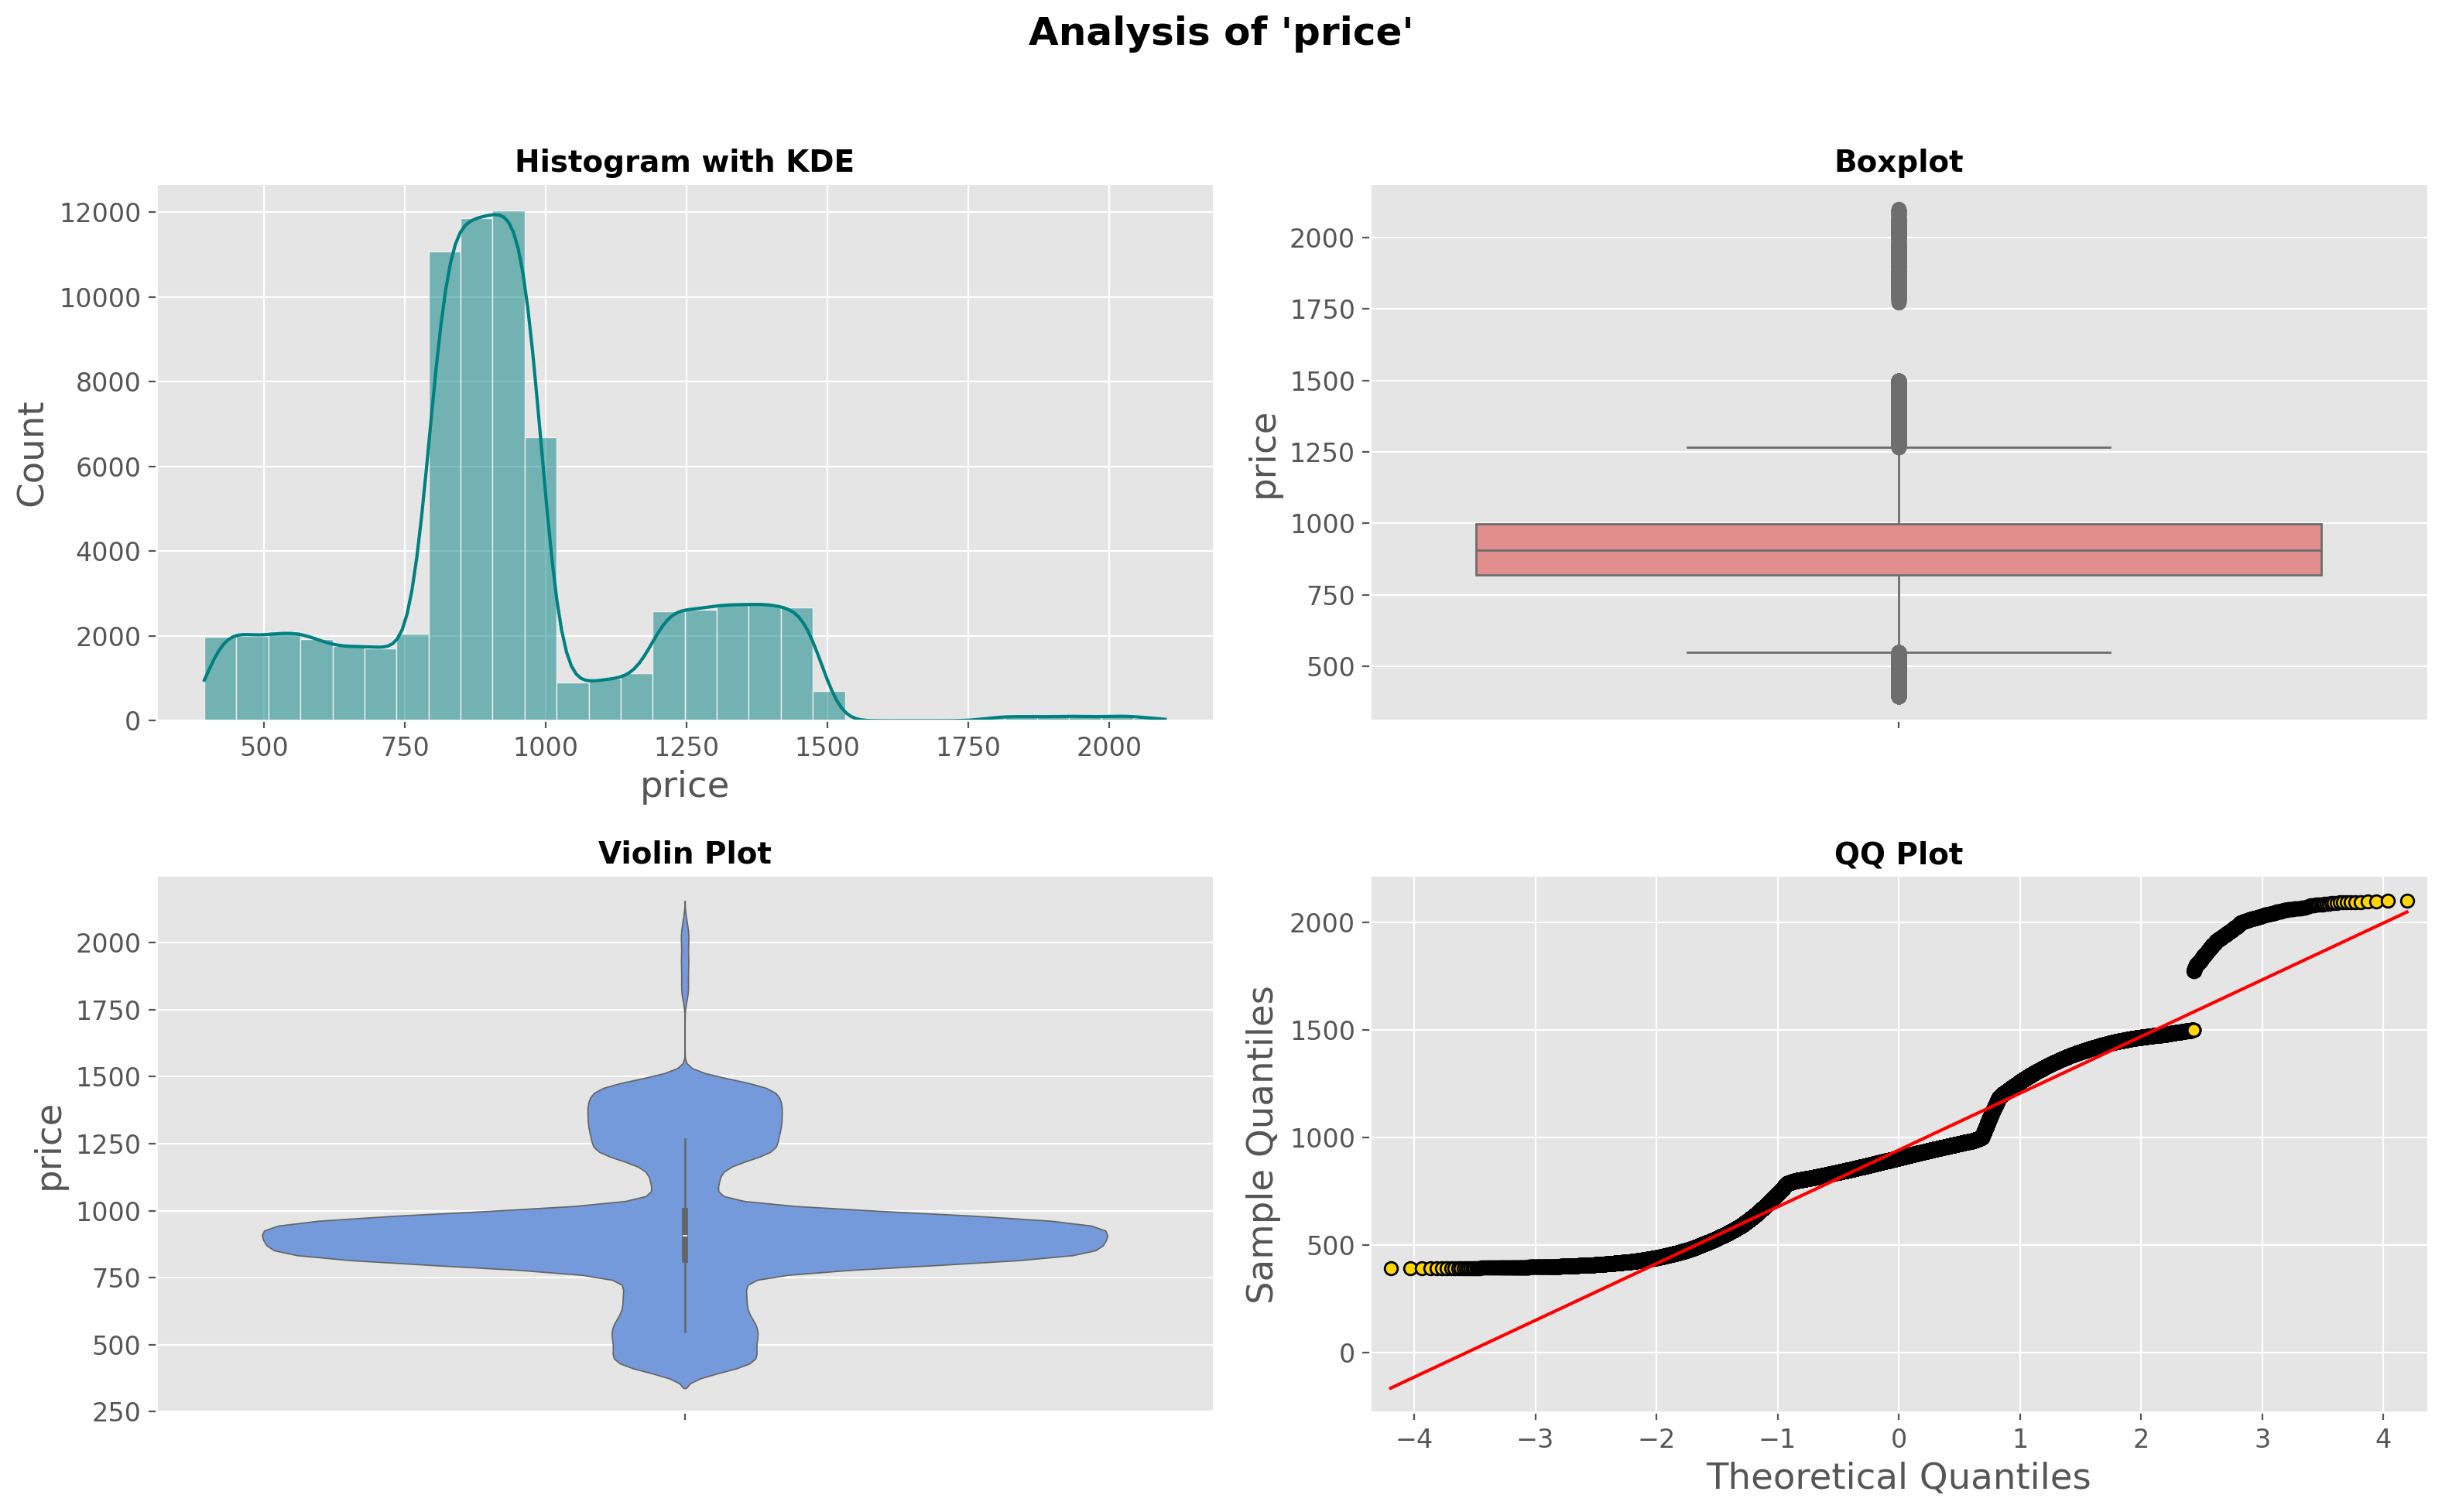

In [105]:
analyse_column_graphical(df_cleaned, 'price', bins=30)

---
### 📈 **7.13. Explore `platform`**

- Id

<br>

---

In [106]:
analyse_column_non_graphical(df_cleaned, 'platform')

... Analysing Column: 'platform'

🔢 Data Type: category
💎 Number of Unique Values: 4
📋 List of Unique Categories: ['Website', 'Email', 'Agent', 'Phone']
📊 Data Distribution:


,Proportion,Count
platform,,
Website,45.51%,"33,178"
Email,27.15%,"19,793"
Agent,18.28%,"13,324"
Phone,9.06%,"6,602"


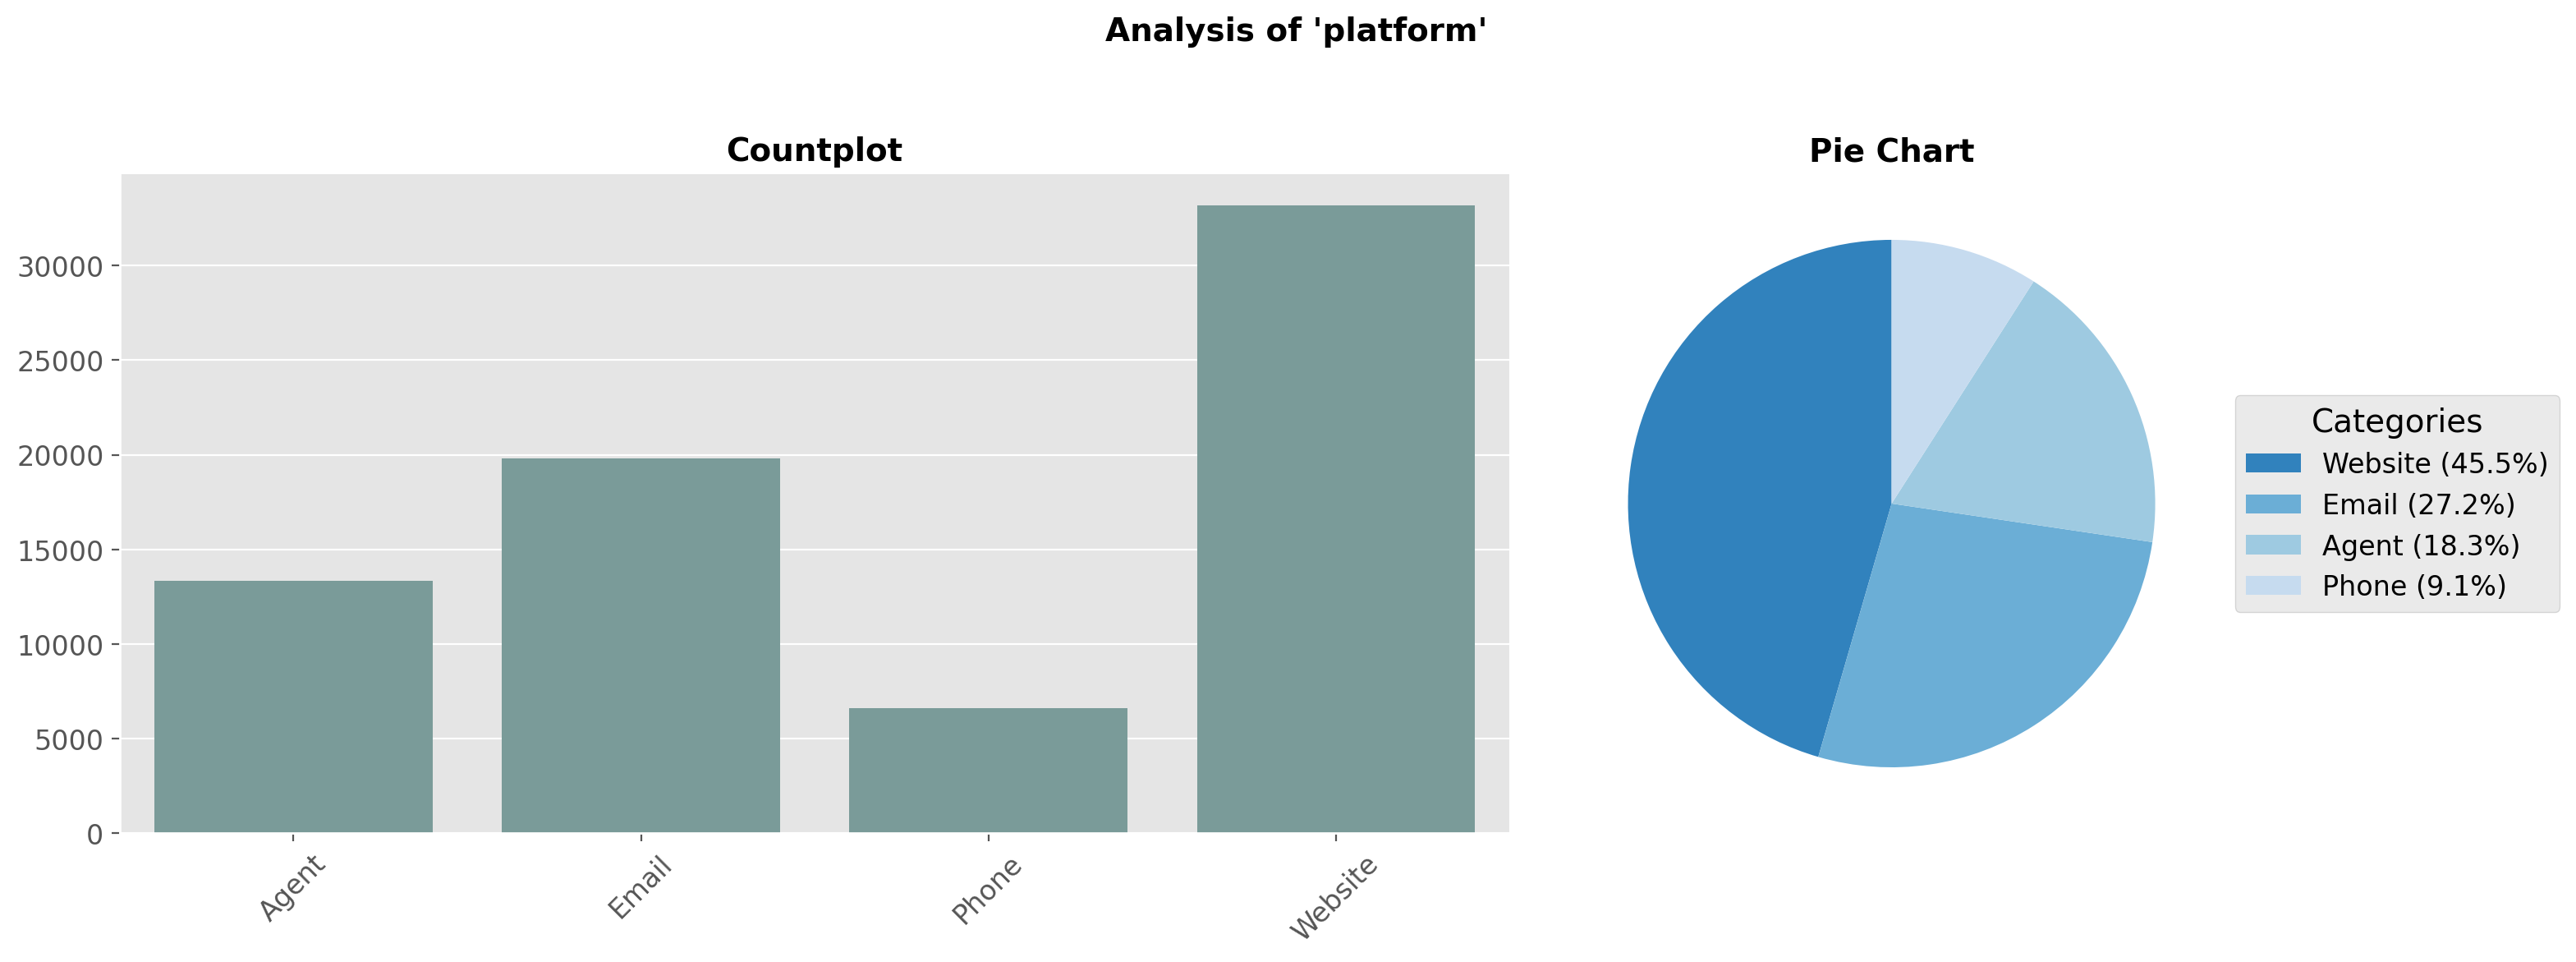

In [107]:
analyse_column_graphical(df_cleaned, 'platform')

---
### 📈 **7.14. Explore `num_adults`**

- Id

<br>

---

In [108]:
analyse_column_non_graphical(df_cleaned, 'num_adults')

... Analysing Column: 'num_adults'

🔢 Data Type: category
💎 Number of Unique Values: 2
📋 List of Unique Categories: [1, 2]
📊 Data Distribution:


,Proportion,Count
num_adults,,
1,57.72%,"42,074"
2,42.28%,"30,823"


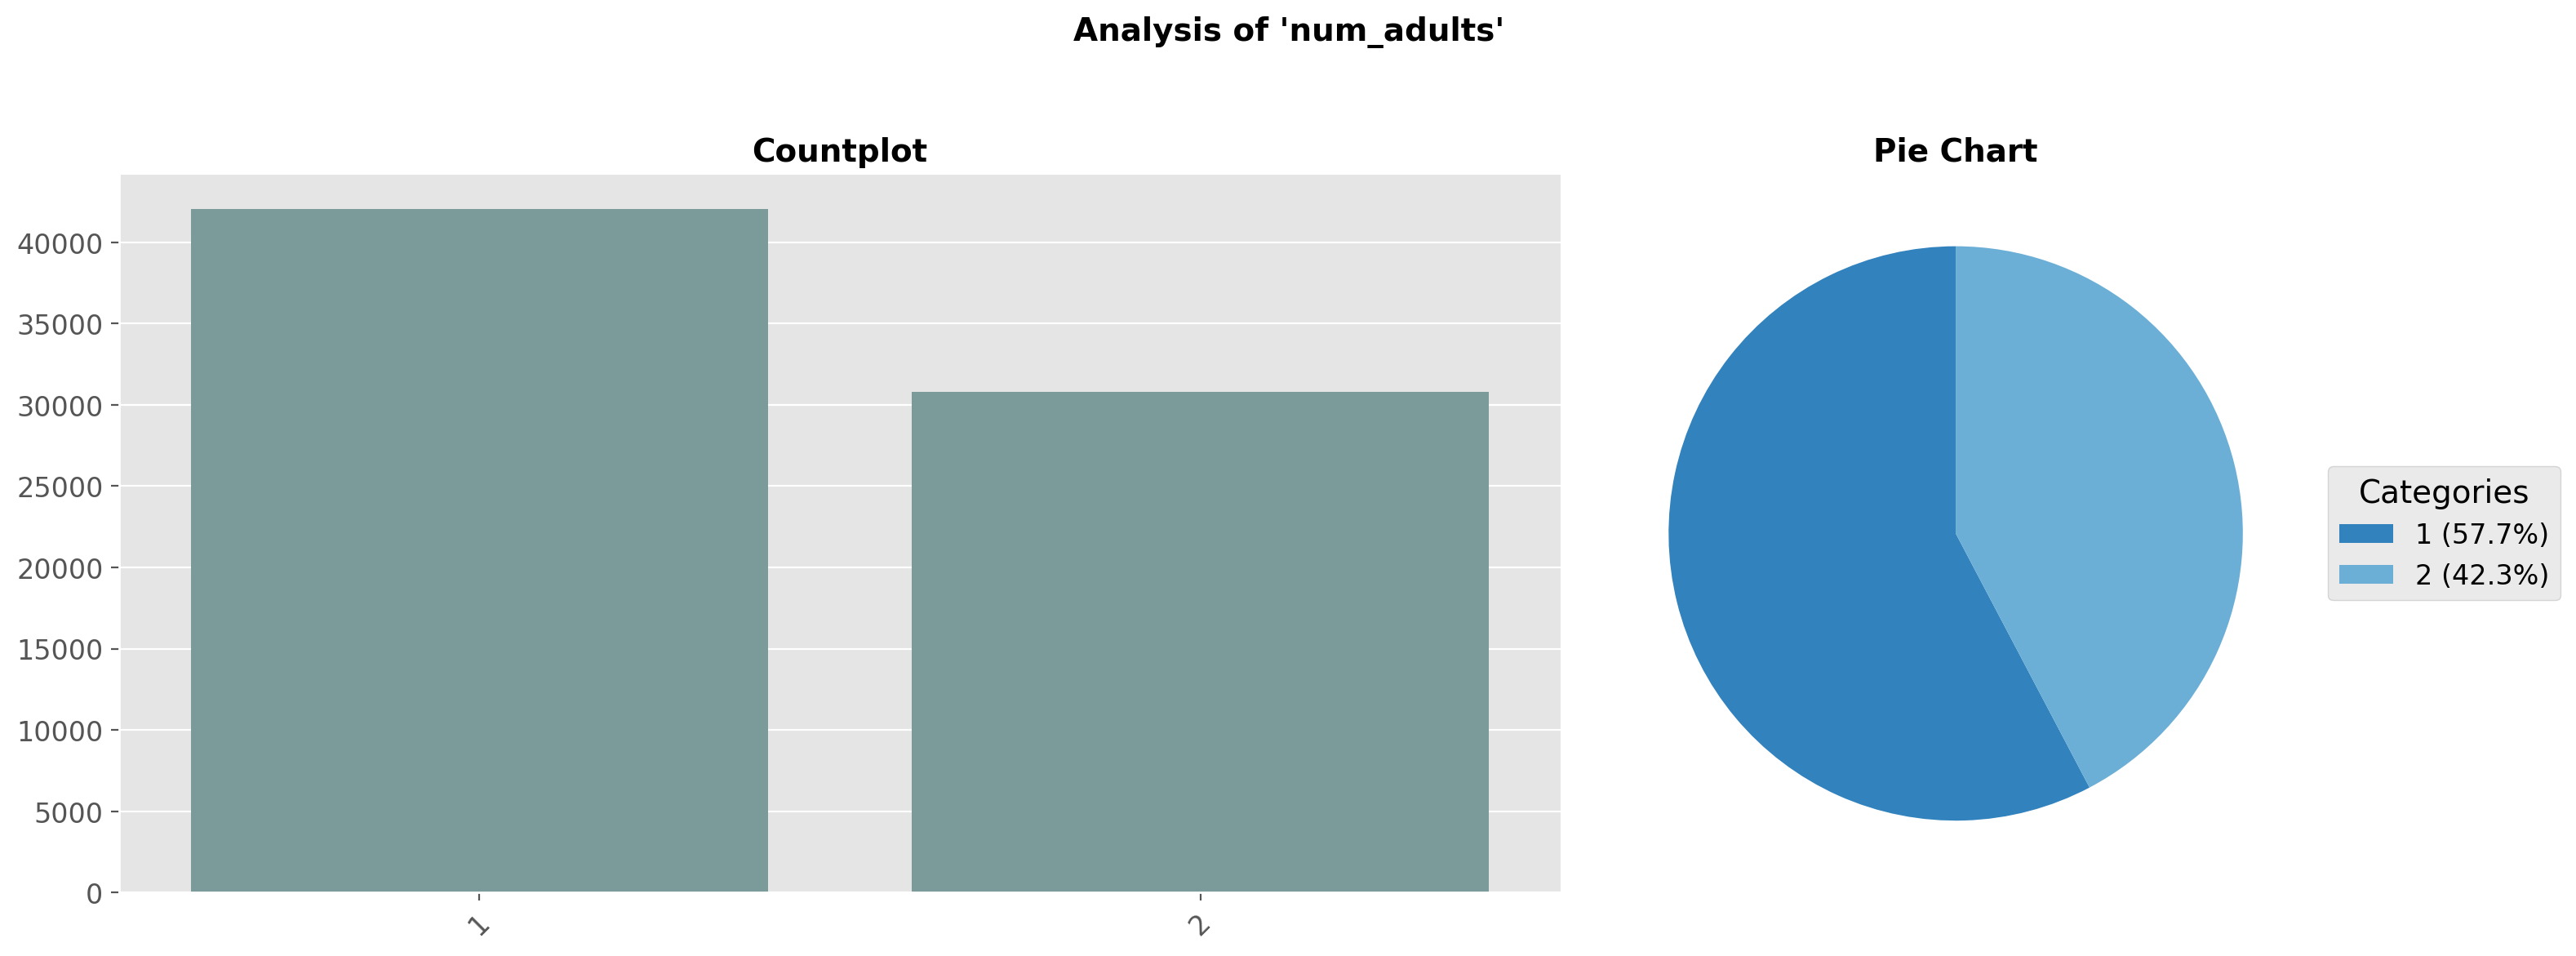

In [109]:
analyse_column_graphical(df_cleaned, 'num_adults')

---
### 📈 **7.15. Explore `num_children`**
---

**📊 Non-Graphical Analysis**

In [110]:
analyse_column_non_graphical(df_cleaned, 'num_children')

... Analysing Column: 'num_children'

🔢 Data Type: category
💎 Number of Unique Values: 4
📋 List of Unique Categories: [0, 1, 2, 3]
📊 Data Distribution:


,Proportion,Count
num_children,,
1,38.13%,"27,797"
0,37.42%,"27,281"
2,24.24%,"17,673"
3,0.20%,146


**📊 Graphical Analysis**

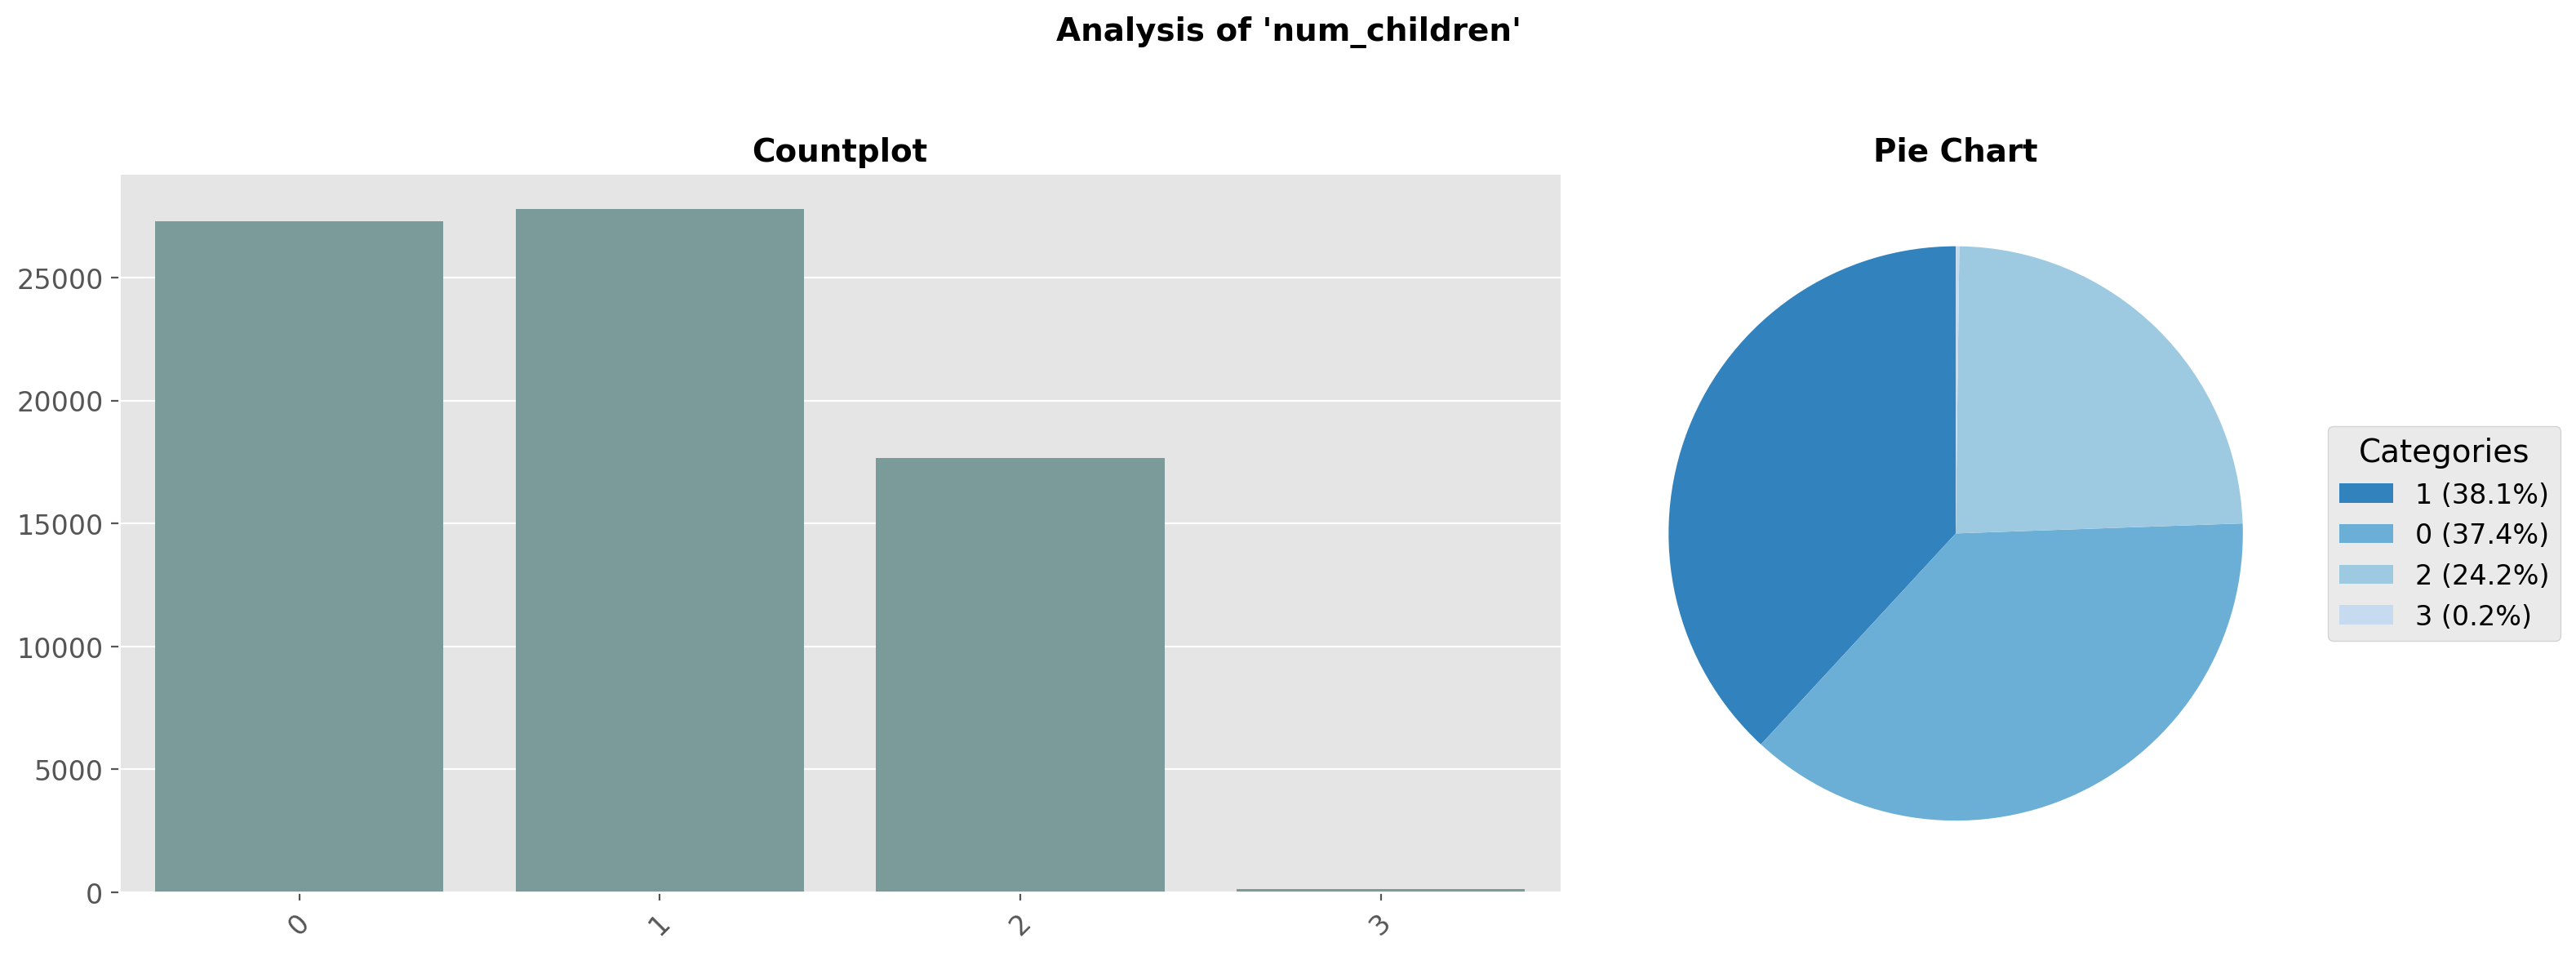

In [111]:
analyse_column_graphical(df_cleaned, 'num_children')

**💡 Insights**

- asd 
- asd a

---
---
# 📊 **8. Bivariate Exploration**

---
---
# ♻️ **9. Multivariate Exploration**

---
---
# 🚀 **10. Conclusion & Next Steps**

- General cleaning (Carried out above for better exploration, need to replicate in the e2e pipeline)
- Preprocessing steps (To be added to the pipeline)
- 